In [1]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX


In [2]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
print(sys.path)

['', '/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/usr/local/Cellar/python/3.6.4_3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/site-packages/IPython/extensions', '/Users/bdrawert/.ipython', '/Users/bdrawert/Desktop/research/GillesPy2']


In [3]:
import math
import gillespy2
from gillespy2.basic_tau_hybrid_solver import BasicTauHybridSolver

Unable to use Cython optimized SSA:
Error:No module named 'pyximport'


In [4]:

class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0)
            V = gillespy2.Species(name='V', initial_value=0, deterministic=True)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
            rate_rule1 = gillespy2.RateRule(V, "sin(t)")
            self.add_parameter([rate1, rate2])
            self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,300,1001))

In [5]:
model = SimpleHybridModel()

Adding rate rule  <gillespy2.gillespy2.RateRule object at 0x10f7c2fd0>  to  Simple_Hybrid_Model


In [6]:
%time results = model.run(solver=BasicTauHybridSolver(), show_labels=True, debug=True)

t =  300.0
increment =  0.30000000000001137
Setting Random number  -2.3216217608563468  for  r1
Setting Random number  -0.14912957759319137  for  r2
curr_state = {'A' : 0, 'V' : 0, }
Propensity of  r1  is  0.0
Propensity of  r2  is  0.0
NO projected reaction
Curr Time:  0  Save time:  0.30000000000001137 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.32162176 -0.14912958  0.04466352]
curr_state = {'A' : 0, 'V' : 0.044663516745590576, }
Propensity of  r1  is  0.8932703349118115 tau_j is  2.5990136133710853
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  2.8990136133710966  step size 2.5990136133710853
Step exceeds save_time, changing step size from  2.5990136133710853  to  0.30000000000001137
Curr Time:  0.30000000000001137  Save time:  0.6000000000000227 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.05364066 -0.14912958  0.17466444]
curr_state = {'A' : 0, 'V' : 0.17466443924105945, }
Propensity of  r1  is  3.49

curr_state = {'A' : 2, 'V' : 1.504834225359645, }
Propensity of  r1  is  30.096684507192897 tau_j is  0.0645926822903062
Propensity of  r2  is  20.0 tau_j is  0.024784945774767888
Projected reaction is:  r2  at time:  2.1247849457748473  step size 0.024784945774767888
Curr Time:  2.1000000000000796  Save time:  2.400000000000091 step:  0.024784945774767888
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.19808089e+00 -9.74220704e-15  1.52607074e+00]
curr_state = {'A' : 2, 'V' : 1.5260707352603977, }
Propensity of  r1  is  30.521414705207953 tau_j is  0.03925377963064083
Propensity of  r2  is  20.0 tau_j is  4.871103520542875e-16
Projected reaction is:  r2  at time:  2.1247849457749473  step size 1e-13
Curr Time:  2.1247849457748473  Save time:  2.400000000000091 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.19808089 -0.02435246  1.52607074]
curr_state = {'A' : 1, 'V' : 1.526070735260483, }
Propensity of  r1  is  30.521414705209658 tau_j is  0.03925377963053856
Propensit

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.19029264e-15 -4.62458432e-01  1.85596129e+00]
curr_state = {'A' : 6, 'V' : 1.855961294999193, }
Propensity of  r1  is  37.11922589998386 tau_j is  1.3982760993205044e-16
Propensity of  r2  is  60.0 tau_j is  0.007707640530815041
Projected reaction is:  r1  at time:  2.598280849975655  step size 1e-13
Curr Time:  2.598280849975555  Save time:  2.7000000000001023 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.56982485 -0.46245843  1.85596129]
curr_state = {'A' : 7, 'V' : 1.8559612949992448, }
Propensity of  r1  is  37.1192258999849 tau_j is  0.015351205009052779
Propensity of  r2  is  70.0 tau_j is  0.006606549026327276
Projected reaction is:  r2  at time:  2.6048873990019823  step size 0.006606549026327276
Curr Time:  2.598280849975655  Save time:  2.7000000000001023 step:  0.006606549026327276
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.24594861e-01 -3.93157729e-14  1.85935746e+00]
curr_state = {'A' : 7, 'V' : 1.85935

Projected reaction is:  r2  at time:  2.874320205018698  step size 0.01228893948433717
Curr Time:  2.8620312655343607  Save time:  3.0000000000001137 step:  0.01228893948433717
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.15601321 -0.82617325  1.96443599]
curr_state = {'A' : 2, 'V' : 1.96443598805658, }
Propensity of  r1  is  39.2887197611316 tau_j is  0.003970941585105069
Propensity of  r2  is  20.0 tau_j is  0.04130866255788278
Projected reaction is:  r1  at time:  2.8782911466038033  step size 0.003970941585105069
Curr Time:  2.874320205018698  Save time:  3.0000000000001137 step:  0.003970941585105069
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.23550484 -0.74675442  1.96547655]
curr_state = {'A' : 3, 'V' : 1.9654765472212854, }
Propensity of  r1  is  39.30953094442571 tau_j is  0.05686928296978911
Propensity of  r2  is  30.0 tau_j is  0.024891813981851793
Projected reaction is:  r2  at time:  2.903182960585655  step size 0.024891813981851793
Curr Time:  2.8782911466038033 

Propensity of  r2  is  50.0 tau_j is  0.006652800822537605
Projected reaction is:  r2  at time:  3.3905754818097518  step size 0.006652800822537605
Curr Time:  3.3839226809872143  Save time:  3.6000000000001364 step:  0.006652800822537605
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.85118744e-01 -5.77315973e-15  1.96907610e+00]
curr_state = {'A' : 5, 'V' : 1.9690761018705234, }
Propensity of  r1  is  39.38152203741047 tau_j is  0.007239911751045786
Propensity of  r2  is  50.0 tau_j is  1.1546319456101628e-16
Projected reaction is:  r2  at time:  3.3905754818098517  step size 1e-13
Curr Time:  3.3905754818097518  Save time:  3.6000000000001364 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.28511874 -0.5705274   1.9690761 ]
curr_state = {'A' : 4, 'V' : 1.9690761018704988, }
Propensity of  r1  is  39.38152203740997 tau_j is  0.0072399117509460275
Propensity of  r2  is  40.0 tau_j is  0.01426318495557449
Projected reaction is:  r1  at time:  3.3978153935607978  step size

Propensity of  r2  is  30.0 tau_j is  0.047875195772274434
Projected reaction is:  r1  at time:  3.850577270515076  step size 1e-13
Curr Time:  3.850577270514976  Save time:  3.900000000000148 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.56650599 -1.43625587  1.75891629]
curr_state = {'A' : 4, 'V' : 1.758916294124176, }
Propensity of  r1  is  35.17832588248352 tau_j is  0.016103835857789763
Propensity of  r2  is  40.0 tau_j is  0.03590639682913106
Projected reaction is:  r1  at time:  3.866681106372866  step size 0.016103835857789763
Curr Time:  3.850577270515076  Save time:  3.900000000000148 step:  0.016103835857789763
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.15720695 -0.79210244  1.74833336]
curr_state = {'A' : 5, 'V' : 1.7483333598221347, }
Propensity of  r1  is  34.96666719644269 tau_j is  0.004495909015242731
Propensity of  r2  is  50.0 tau_j is  0.015842048777073004
Projected reaction is:  r1  at time:  3.8711770153881084  step size 0.004495909015242731


y(t) =  [-0.93248011 -2.34390649  1.59565223]
curr_state = {'A' : 2, 'V' : 1.595652227317613, }
Propensity of  r1  is  31.91304454635226 tau_j is  0.02921940300979991
Propensity of  r2  is  20.0 tau_j is  0.11719532452545826
Projected reaction is:  r1  at time:  4.103380519486419  step size 0.02921940300979991
Curr Time:  4.074161116476619  Save time:  4.200000000000159 step:  0.02921940300979991
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.10208976 -1.75951843  1.57193362]
curr_state = {'A' : 3, 'V' : 1.5719336241088813, }
Propensity of  r1  is  31.438672482177626 tau_j is  0.06686318450287927
Propensity of  r2  is  30.0 tau_j is  0.05865061434377181
Projected reaction is:  r2  at time:  4.16203113383019  step size 0.05865061434377181
Curr Time:  4.103380519486419  Save time:  4.200000000000159 step:  0.05865061434377181
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.2581923  -0.03521351  1.52287055]
curr_state = {'A' : 2, 'V' : 1.5228705484831022, }
Propensity of  r1  is  30.45

Curr Time:  4.419344671263652  Save time:  4.5000000000001705 step:  0.03593154571101994
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.20642232e+00 -7.43849426e-15  1.25416292e+00]
curr_state = {'A' : 2, 'V' : 1.2541629247112278, }
Propensity of  r1  is  25.083258494224555 tau_j is  0.04809671450103273
Propensity of  r2  is  20.0 tau_j is  3.7192471324942745e-16
Projected reaction is:  r2  at time:  4.455276216974773  step size 1e-13
Curr Time:  4.4552762169746725  Save time:  4.5000000000001705 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.20642232 -0.19422553  1.25416292]
curr_state = {'A' : 1, 'V' : 1.2541629247111308, }
Propensity of  r1  is  25.083258494222616 tau_j is  0.0480967145009359
Propensity of  r2  is  10.0 tau_j is  0.01942255290237601
Projected reaction is:  r2  at time:  4.474698769877149  step size 0.01942255290237601
Curr Time:  4.455276216974773  Save time:  4.5000000000001705 step:  0.01942255290237601
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) = 

Propensity of  r2  is  30.0 tau_j is  0.015472968988332935
Projected reaction is:  r1  at time:  4.808516500729169  step size 1e-13
Curr Time:  4.808516500729069  Save time:  5.100000000000193 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.27430352 -0.46418907  0.90389568]
curr_state = {'A' : 4, 'V' : 0.9038956812231973, }
Propensity of  r1  is  18.077913624463946 tau_j is  0.07048952360841731
Propensity of  r2  is  40.0 tau_j is  0.0116047267411748
Projected reaction is:  r2  at time:  4.820121227470344  step size 0.0116047267411748
Curr Time:  4.808516500729169  Save time:  5.100000000000193 step:  0.0116047267411748
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.06451427 -1.27686789  0.89235155]
curr_state = {'A' : 3, 'V' : 0.8923515473753633, }
Propensity of  r1  is  17.847030947507264 tau_j is  0.0596465750908995
Propensity of  r2  is  30.0 tau_j is  0.042562262917766
Projected reaction is:  r2  at time:  4.86268349038811  step size 0.042562262917766
Curr Time:  4

Projected reaction is:  r1  at time:  5.084759979677834  step size 1e-13
Curr Time:  5.084759979677734  Save time:  5.100000000000193 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.10820857 -4.16070189  0.63605658]
curr_state = {'A' : 6, 'V' : 0.6360565783321184, }
Propensity of  r1  is  12.721131566642367 tau_j is  0.008506206167112802
Propensity of  r2  is  60.0 tau_j is  0.06934503147397529
Projected reaction is:  r1  at time:  5.093266185844946  step size 0.008506206167112802
Curr Time:  5.084759979677834  Save time:  5.100000000000193 step:  0.008506206167112802
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.11097351 -3.65032952  0.62814678]
curr_state = {'A' : 7, 'V' : 0.6281467752336656, }
Propensity of  r1  is  12.562935504673312 tau_j is  0.00883340604218536
Propensity of  r2  is  70.0 tau_j is  0.05214756454873925
Projected reaction is:  r1  at time:  5.102099591887132  step size 0.00883340604218536
Step exceeds save_time, changing step size from  0.008833406

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.37570465 -1.15074922  0.30637478]
curr_state = {'A' : 2, 'V' : 0.30637478288960085, }
Propensity of  r1  is  6.127495657792017 tau_j is  0.22451336123213342
Propensity of  r2  is  20.0 tau_j is  0.057537461178506444
Projected reaction is:  r2  at time:  5.536280679567671  step size 0.057537461178506444
Curr Time:  5.478743218389165  Save time:  5.700000000000216 step:  0.057537461178506444
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.0231441  -3.12716275  0.26609313]
curr_state = {'A' : 1, 'V' : 0.2660931289894638, }
Propensity of  r1  is  5.321862579789276 tau_j is  0.19225301051930294
Propensity of  r2  is  10.0 tau_j is  0.31271627502709587
Projected reaction is:  r1  at time:  5.728533690086974  step size 0.19225301051930294
Step exceeds save_time, changing step size from  0.19225301051930294  to  0.1637193204325449
Curr Time:  5.536280679567671  Save time:  5.700000000000216 step:  0.1637193204325449
Reactions Fired:  {'r1': 0, 

Propensity of  r2  is  10.0 tau_j is  0.05273846973110828
Projected reaction is:  r2  at time:  7.180733270438557  step size 0.05273846973110828
Curr Time:  7.127994800707449  Save time:  7.200000000000273 step:  0.05273846973110828
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.99673819 -3.38160242  0.37636135]
curr_state = {'A' : 0, 'V' : 0.3763613491105418, }
Propensity of  r1  is  7.527226982210836 tau_j is  0.13241771460991233
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  7.313150985048469  step size 0.13241771460991233
Step exceeds save_time, changing step size from  0.13241771460991233  to  0.019266729561715934
Curr Time:  7.180733270438557  Save time:  7.200000000000273 step:  0.019266729561715934
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.85171315 -3.38160242  0.39153909]
curr_state = {'A' : 0, 'V' : 0.39153909320767805, }
Propensity of  r1  is  7.830781864153561 tau_j is  0.10876476480814154
Propensity of  r2  is  0.0
Projected reaction is:  r1  at 

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.44489763 -1.59679187  1.04698173]
curr_state = {'A' : 0, 'V' : 1.0469817322358395, }
Propensity of  r1  is  20.93963464471679 tau_j is  0.06900300113733968
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  7.970091473441028  step size 0.06900300113733968
Curr Time:  7.901088472303688  Save time:  8.100000000000307 step:  0.06900300113733968
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.94352056 -1.59679187  1.11574072]
curr_state = {'A' : 1, 'V' : 1.1157407173062355, }
Propensity of  r1  is  22.31481434612471 tau_j is  0.0422822501169101
Propensity of  r2  is  10.0 tau_j is  0.15967918672702433
Projected reaction is:  r1  at time:  8.012373723557937  step size 0.0422822501169101
Curr Time:  7.970091473441028  Save time:  8.100000000000307 step:  0.0422822501169101
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.04756220e-14 -1.17396937e+00  1.15762152e+00]
curr_state = {'A' : 1, 'V' : 1.1576215217025632, }
Propensity o

Projected reaction is:  r1  at time:  8.443636177398817  step size 1e-13
Curr Time:  8.443636177398718  Save time:  8.70000000000033 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.15432733 -4.39159     1.55594749]
curr_state = {'A' : 7, 'V' : 1.5559474930621844, }
Propensity of  r1  is  31.11894986124369 tau_j is  0.03709403233046559
Propensity of  r2  is  70.0 tau_j is  0.06273700003978369
Projected reaction is:  r1  at time:  8.480730209729282  step size 0.03709403233046559
Curr Time:  8.443636177398817  Save time:  8.70000000000033 step:  0.03709403233046559
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.35131599 -1.79500774  1.58638616]
curr_state = {'A' : 8, 'V' : 1.586386160823885, }
Propensity of  r1  is  31.7277232164777 tau_j is  0.011072839567047068
Propensity of  r2  is  80.0 tau_j is  0.0224375967456508
Projected reaction is:  r1  at time:  8.49180304929633  step size 0.011072839567047068
Curr Time:  8.480730209729282  Save time:  8.70000000000033 step:  0.

Curr Time:  8.709470658901077  Save time:  9.000000000000341 step:  0.01622741855723813
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.06181771e-14 -4.81978496e-01  1.76529337e+00]
curr_state = {'A' : 1, 'V' : 1.7652933688076289, }
Propensity of  r1  is  35.30586737615258 tau_j is  1.7169434331891878e-15
Propensity of  r2  is  10.0 tau_j is  0.0481978496472583
Projected reaction is:  r1  at time:  8.725698077458414  step size 1e-13
Curr Time:  8.725698077458315  Save time:  9.000000000000341 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.55538908 -0.4819785   1.76529337]
curr_state = {'A' : 2, 'V' : 1.765293368807693, }
Propensity of  r1  is  35.30586737615386 tau_j is  0.044054690951387226
Propensity of  r2  is  20.0 tau_j is  0.024098924823579265
Projected reaction is:  r2  at time:  8.749797002281994  step size 0.024098924823579265
Curr Time:  8.725698077458414  Save time:  9.000000000000341 step:  0.024098924823579265
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.31559008 -0.59181058  1.89220829]
curr_state = {'A' : 1, 'V' : 1.89220829483125, }
Propensity of  r1  is  37.844165896625 tau_j is  0.00833920023428902
Propensity of  r2  is  10.0 tau_j is  0.05918105808886235
Projected reaction is:  r1  at time:  8.964877256064687  step size 0.00833920023428902
Curr Time:  8.956538055830398  Save time:  9.000000000000341 step:  0.00833920023428902
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.31956684e-14 -5.08418579e-01  1.89594029e+00]
curr_state = {'A' : 1, 'V' : 1.895940291134881, }
Propensity of  r1  is  37.91880582269762 tau_j is  8.754407665555163e-16
Propensity of  r2  is  10.0 tau_j is  0.0508418578545742
Projected reaction is:  r1  at time:  8.964877256064787  step size 1e-13
Curr Time:  8.964877256064687  Save time:  9.000000000000341 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.13832997 -0.50841858  1.89594029]
curr_state = {'A' : 2, 'V' : 1.895940291134925, }
Propensity 

Projected reaction is:  r2  at time:  9.312534308258414  step size 0.00497067023207222
Curr Time:  9.307563638026341  Save time:  9.600000000000364 step:  0.00497067023207222
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.21373592 -2.00221074  1.99352855]
curr_state = {'A' : 4, 'V' : 1.9935285498523214, }
Propensity of  r1  is  39.87057099704643 tau_j is  0.005360743781282134
Propensity of  r2  is  40.0 tau_j is  0.05005526841431549
Projected reaction is:  r1  at time:  9.317895052039695  step size 0.005360743781282134
Curr Time:  9.312534308258414  Save time:  9.600000000000364 step:  0.005360743781282134
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.87064341 -1.78778099  1.99411414]
curr_state = {'A' : 5, 'V' : 1.9941141405314027, }
Propensity of  r1  is  39.882282810628055 tau_j is  0.02183033048248278
Propensity of  r2  is  50.0 tau_j is  0.03575561970642659
Projected reaction is:  r1  at time:  9.339725382522179  step size 0.02183033048248278
Curr Time:  9.317895052039695  Sa

Projected reaction is:  r2  at time:  9.654732939328596  step size 0.0290140919968525
Curr Time:  9.625718847331743  Save time:  9.900000000000375 step:  0.0290140919968525
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.70902729 -1.11212018  1.97347874]
curr_state = {'A' : 2, 'V' : 1.9734787365351554, }
Propensity of  r1  is  39.46957473070311 tau_j is  0.017963894726007044
Propensity of  r2  is  20.0 tau_j is  0.055606008964099354
Projected reaction is:  r1  at time:  9.672696834054603  step size 0.017963894726007044
Curr Time:  9.654732939328596  Save time:  9.900000000000375 step:  0.017963894726007044
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.62092562e-14 -7.52842285e-01  1.96922686e+00]
curr_state = {'A' : 2, 'V' : 1.969226861470119, }
Propensity of  r1  is  39.384537229402376 tau_j is  4.115639613870168e-16
Propensity of  r2  is  20.0 tau_j is  0.0376421142380927
Projected reaction is:  r1  at time:  9.672696834054703  step size 1e-13
Curr Time:  9.672696834054603  Save 

Propensity of  r1  is  38.10903444420141 tau_j is  6.059623196702896e-16
Propensity of  r2  is  50.0 tau_j is  0.028145207982776407
Projected reaction is:  r1  at time:  9.862646946153188  step size 1e-13
Curr Time:  9.862646946153088  Save time:  9.900000000000375 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.85167662 -1.4072604   1.90545172]
curr_state = {'A' : 6, 'V' : 1.9054517222100285, }
Propensity of  r1  is  38.10903444420057 tau_j is  0.04858891467629344
Propensity of  r2  is  60.0 tau_j is  0.023454339985563944
Projected reaction is:  r2  at time:  9.886101286138752  step size 0.023454339985563944
Curr Time:  9.862646946153188  Save time:  9.900000000000375 step:  0.023454339985563944
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.95785437 -0.34693921  1.89525849]
curr_state = {'A' : 5, 'V' : 1.8952584882314545, }
Propensity of  r1  is  37.90516976462909 tau_j is  0.025269755512956647
Propensity of  r2  is  50.0 tau_j is  0.006938784117653991
Projected react

Curr Time:  10.221515328890874  Save time:  10.500000000000398 step:  0.04716602483344316
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.13179467e+00 -6.70574707e-14  1.66433377e+00]
curr_state = {'A' : 4, 'V' : 1.6643337743597546, }
Propensity of  r1  is  33.28667548719509 tau_j is  0.06404348412759425
Propensity of  r2  is  40.0 tau_j is  1.6764367671839863e-15
Projected reaction is:  r2  at time:  10.268681353724416  step size 1e-13
Curr Time:  10.268681353724316  Save time:  10.500000000000398 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.13179467 -1.53023058  1.66433377]
curr_state = {'A' : 3, 'V' : 1.6643337743596807, }
Propensity of  r1  is  33.28667548719361 tau_j is  0.06404348412749815
Propensity of  r2  is  30.0 tau_j is  0.051007685990289396
Projected reaction is:  r2  at time:  10.319689039714705  step size 0.051007685990289396
Curr Time:  10.268681353724416  Save time:  10.500000000000398 step:  0.051007685990289396
Reactions Fired:  {'r1': 0, 'r2': 0}
y

Curr Time:  10.757844898637115  Save time:  10.80000000000041 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.32017475 -2.18343341  1.2352683 ]
curr_state = {'A' : 3, 'V' : 1.2352682978160912, }
Propensity of  r1  is  24.705365956321824 tau_j is  0.012959725039397662
Propensity of  r2  is  30.0 tau_j is  0.07278111358354672
Projected reaction is:  r1  at time:  10.770804623676613  step size 0.012959725039397662
Curr Time:  10.757844898637215  Save time:  10.80000000000041 step:  0.012959725039397662
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.92446203 -1.79464166  1.22265331]
curr_state = {'A' : 4, 'V' : 1.2226533139926765, }
Propensity of  r1  is  24.45306627985353 tau_j is  0.037805566963066056
Propensity of  r2  is  40.0 tau_j is  0.04486604140811036
Projected reaction is:  r1  at time:  10.808610190639678  step size 0.037805566963066056
Step exceeds save_time, changing step size from  0.037805566963066056  to  0.02919537632379665
Curr Time:  10.770804623676613  S

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.35978983 -0.51211787  0.98704926]
curr_state = {'A' : 3, 'V' : 0.9870492617876757, }
Propensity of  r1  is  19.740985235753513 tau_j is  0.01822552575795519
Propensity of  r2  is  30.0 tau_j is  0.017070595745365222
Projected reaction is:  r2  at time:  11.025365067334768  step size 0.017070595745365222
Curr Time:  11.008294471589403  Save time:  11.10000000000042 step:  0.017070595745365222
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.27994563e-02 -2.48412402e-14  9.69983357e-01]
curr_state = {'A' : 3, 'V' : 0.969983357239243, }
Propensity of  r1  is  19.39966714478486 tau_j is  0.0011752498719037343
Propensity of  r2  is  30.0 tau_j is  8.280413391995959e-16
Projected reaction is:  r2  at time:  11.025365067334867  step size 1e-13
Curr Time:  11.025365067334768  Save time:  11.10000000000042 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.02279946 -0.73799936  0.96998336]
curr_state = {'A' : 2, 'V' : 0.969983357239143

Propensity of  r1  is  15.582859905706439 tau_j is  0.020425089883629455
Propensity of  r2  is  50.0 tau_j is  0.018356907201119682
Projected reaction is:  r2  at time:  11.236393539047112  step size 0.018356907201119682
Curr Time:  11.218036631845992  Save time:  11.400000000000432 step:  0.018356907201119682
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.22282010e-02 -5.90638649e-14  7.61277006e-01]
curr_state = {'A' : 5, 'V' : 0.7612770060913605, }
Propensity of  r1  is  15.22554012182721 tau_j is  0.0021167197185191647
Propensity of  r2  is  50.0 tau_j is  1.1812772982011666e-15
Projected reaction is:  r2  at time:  11.236393539047212  step size 1e-13
Curr Time:  11.236393539047112  Save time:  11.400000000000432 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.0322282  -0.12275528  0.76127701]
curr_state = {'A' : 4, 'V' : 0.7612770060912646, }
Propensity of  r1  is  15.225540121825292 tau_j is  0.0021167197184206736
Propensity of  r2  is  40.0 tau_j is  0.0030688819

Propensity of  r2  is  10.0 tau_j is  9.43689570931383e-17
Projected reaction is:  r2  at time:  13.40754750651039  step size 1e-13
Curr Time:  13.40754750651029  Save time:  13.500000000000512 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.19672551 -1.16125409  0.33319501]
curr_state = {'A' : 0, 'V' : 0.3331950116230794, }
Propensity of  r1  is  6.663900232461588 tau_j is  0.029521076272182787
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  13.437068582782572  step size 0.029521076272182787
Curr Time:  13.40754750651039  Save time:  13.500000000000512 step:  0.029521076272182787
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.33851263e-14 -1.16125409e+00  3.55488286e-01]
curr_state = {'A' : 0, 'V' : 0.35548828625191414, }
Propensity of  r1  is  7.109765725038283 tau_j is  1.882639577489731e-15
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  13.437068582782672  step size 1e-13
Curr Time:  13.437068582782572  Save time:  13.5000000000005

Propensity of  r1  is  27.518032289819125 tau_j is  0.21851623408735202
Propensity of  r2  is  20.0 tau_j is  0.0009279955290515821
Projected reaction is:  r2  at time:  14.52370819452269  step size 0.0009279955290515821
Curr Time:  14.522780198993638  Save time:  14.700000000000557 step:  0.0009279955290515821
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-5.98760017 -1.45396677  1.37676096]
curr_state = {'A' : 1, 'V' : 1.3767609593745012, }
Propensity of  r1  is  27.53521918749002 tau_j is  0.21745242461162084
Propensity of  r2  is  10.0 tau_j is  0.1453966769178967
Projected reaction is:  r2  at time:  14.669104871440588  step size 0.1453966769178967
Curr Time:  14.52370819452269  Save time:  14.700000000000557 step:  0.1453966769178967
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.98407081e+00 -1.22124533e-14  1.50697695e+00]
curr_state = {'A' : 1, 'V' : 1.5069769512793438, }
Propensity of  r1  is  30.139539025586878 tau_j is  0.06582950073592149
Propensity of  r2  is  10.0 tau_

Propensity of  r1  is  34.16050618246645 tau_j is  0.033525281190013405
Propensity of  r2  is  40.0 tau_j is  0.014199996689365543
Projected reaction is:  r2  at time:  14.93840328411643  step size 0.014199996689365543
Curr Time:  14.924203287427064  Save time:  15.000000000000568 step:  0.014199996689365543
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.6601615  -2.87729599  1.71797743]
curr_state = {'A' : 3, 'V' : 1.7179774319235812, }
Propensity of  r1  is  34.35954863847162 tau_j is  0.019213334482605024
Propensity of  r2  is  30.0 tau_j is  0.09590986647182395
Projected reaction is:  r1  at time:  14.957616618599035  step size 0.019213334482605024
Curr Time:  14.93840328411643  Save time:  15.000000000000568 step:  0.019213334482605024
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.21847549 -2.30089596  1.7312123 ]
curr_state = {'A' : 4, 'V' : 1.7312122996454797, }
Propensity of  r1  is  34.62424599290959 tau_j is  0.035191394339525506
Propensity of  r2  is  40.0 tau_j is  0.0

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.55027013e+00 -6.88338275e-14  1.92353928e+00]
curr_state = {'A' : 5, 'V' : 1.9235392848361645, }
Propensity of  r1  is  38.47078569672329 tau_j is  0.04029733480269183
Propensity of  r2  is  50.0 tau_j is  1.3766765505351941e-15
Projected reaction is:  r2  at time:  15.315055418723514  step size 1e-13
Curr Time:  15.315055418723414  Save time:  15.600000000000591 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.55027013 -0.08795957  1.92353928]
curr_state = {'A' : 4, 'V' : 1.9235392848362025, }
Propensity of  r1  is  38.47078569672405 tau_j is  0.04029733480259141
Propensity of  r2  is  40.0 tau_j is  0.0021989892418172474
Projected reaction is:  r2  at time:  15.317254407965331  step size 0.0021989892418172474
Curr Time:  15.315055418723514  Save time:  15.600000000000591 step:  0.0021989892418172474
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.46567329 -0.09690134  1.92437844]
curr_state = {'A' : 3, 'V' : 1.92437843747

Propensity of  r2  is  40.0 tau_j is  0.001420289139434319
Projected reaction is:  r2  at time:  15.85169436847709  step size 0.001420289139434319
Curr Time:  15.850274079337657  Save time:  15.900000000000603 step:  0.001420289139434319
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.81531920e+00 -4.35623759e-14  1.98939918e+00]
curr_state = {'A' : 4, 'V' : 1.989399181426527, }
Propensity of  r1  is  39.78798362853054 tau_j is  0.04562481016821908
Propensity of  r2  is  40.0 tau_j is  1.0890593982182394e-15
Projected reaction is:  r2  at time:  15.85169436847719  step size 1e-13
Curr Time:  15.85169436847709  Save time:  15.900000000000603 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.8153192  -0.44087385  1.98939918]
curr_state = {'A' : 3, 'V' : 1.9893991814265126, }
Propensity of  r1  is  39.787983628530256 tau_j is  0.04562481016811871
Propensity of  r2  is  30.0 tau_j is  0.014695795056619478
Projected reaction is:  r2  at time:  15.86639016353381  step size 0.014

Projected reaction is:  r2  at time:  16.147715993918737  step size 1e-13
Curr Time:  16.147715993918638  Save time:  16.200000000000614 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.3875499  -1.05992738  1.90455631]
curr_state = {'A' : 3, 'V' : 1.9045563056019263, }
Propensity of  r1  is  38.09112611203852 tau_j is  0.010174283146029521
Propensity of  r2  is  30.0 tau_j is  0.03533091276457281
Projected reaction is:  r1  at time:  16.157890277064766  step size 0.010174283146029521
Curr Time:  16.147715993918737  Save time:  16.200000000000614 step:  0.010174283146029521
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.28384296 -0.75469889  1.90017766]
curr_state = {'A' : 4, 'V' : 1.9001776591562292, }
Propensity of  r1  is  38.00355318312458 tau_j is  0.007468853098990098
Propensity of  r2  is  40.0 tau_j is  0.018867472213905563
Projected reaction is:  r1  at time:  16.165359130163758  step size 0.007468853098990098
Curr Time:  16.157890277064766  Save time:  16.20000

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.87947298 -0.99438432  1.57506005]
curr_state = {'A' : 4, 'V' : 1.575060048236557, }
Propensity of  r1  is  31.50120096473114 tau_j is  0.027918712825238383
Propensity of  r2  is  40.0 tau_j is  0.02485960812239076
Projected reaction is:  r2  at time:  16.69055219907997  step size 0.02485960812239076
Curr Time:  16.66569259095758  Save time:  16.800000000000637 step:  0.02485960812239076
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.63654720e-02 -6.94999613e-14  1.55455198e+00]
curr_state = {'A' : 4, 'V' : 1.5545519805841241, }
Propensity of  r1  is  31.091039611682483 tau_j is  0.0030994612344967245
Propensity of  r2  is  40.0 tau_j is  1.73749903353837e-15
Projected reaction is:  r2  at time:  16.69055219908007  step size 1e-13
Curr Time:  16.69055219907997  Save time:  16.800000000000637 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.09636547 -0.22533683  1.55455198]
curr_state = {'A' : 3, 'V' : 1.5545519805840418, }


curr_state = {'A' : 6, 'V' : 1.4551872368196808, }
Propensity of  r1  is  29.103744736393615 tau_j is  3.9348718189821356e-15
Propensity of  r2  is  60.0 tau_j is  0.01765986633699101
Projected reaction is:  r1  at time:  16.80581257260181  step size 1e-13
Curr Time:  16.80581257260171  Save time:  17.100000000000648 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.11542855 -1.05959198  1.45518724]
curr_state = {'A' : 7, 'V' : 1.455187236819592, }
Propensity of  r1  is  29.10374473639184 tau_j is  0.003966106341983239
Propensity of  r2  is  70.0 tau_j is  0.015137028288763897
Projected reaction is:  r1  at time:  16.809778678943793  step size 0.003966106341983239
Curr Time:  16.80581257260181  Save time:  17.100000000000648 step:  0.003966106341983239
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.12404469 -0.78196454  1.4516525 ]
curr_state = {'A' : 8, 'V' : 1.4516525033152603, }
Propensity of  r1  is  29.033050066305208 tau_j is  0.07315954345855046
Propensity of  r2  

Propensity of  r2  is  40.0 tau_j is  0.02909334003181744
Projected reaction is:  r1  at time:  17.10708141601549  step size 0.007081416014841754
Curr Time:  17.100000000000648  Save time:  17.40000000000066 step:  0.007081416014841754
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.18709553e-15 -8.80476961e-01  1.17050444e+00]
curr_state = {'A' : 4, 'V' : 1.1705044417371064, }
Propensity of  r1  is  23.41008883474213 tau_j is  3.924417200475937e-16
Propensity of  r2  is  40.0 tau_j is  0.02201192401697607
Projected reaction is:  r1  at time:  17.10708141601559  step size 1e-13
Curr Time:  17.10708141601549  Save time:  17.40000000000066 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.63302767 -0.88047696  1.17050444]
curr_state = {'A' : 5, 'V' : 1.1705044417370065, }
Propensity of  r1  is  23.41008883474013 tau_j is  0.11247405736449471
Propensity of  r2  is  50.0 tau_j is  0.017609539213499694
Projected reaction is:  r2  at time:  17.124690955229088  step size 0.017609

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.24699773 -2.01219023  0.14692019]
curr_state = {'A' : 0, 'V' : 0.14692019302054318, }
Propensity of  r1  is  2.9384038604108635 tau_j is  0.42437928532444813
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  18.724379285325142  step size 0.42437928532444813
Step exceeds save_time, changing step size from  0.42437928532444813  to  0.30000000000001137
Curr Time:  18.300000000000693  Save time:  18.600000000000705 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.36547657 -2.01219023  0.03065463]
curr_state = {'A' : 0, 'V' : 0.03065463468259043, }
Propensity of  r1  is  0.6130926936518086 tau_j is  0.596119601386182
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  19.196119601386886  step size 0.596119601386182
Step exceeds save_time, changing step size from  0.596119601386182  to  0.30000000000001137
Curr Time:  18.600000000000705  Save time:  18.900000000000716 step:  0.300000000000

Curr Time:  20.466859224366004  Save time:  20.700000000000784 step:  0.0057753090440669655
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.12884395 -0.43713783  1.05193791]
curr_state = {'A' : 4, 'V' : 1.0519379068442092, }
Propensity of  r1  is  21.038758136884184 tau_j is  0.006124123522103076
Propensity of  r2  is  40.0 tau_j is  0.010928445679064657
Projected reaction is:  r1  at time:  20.478758656932175  step size 0.006124123522103076
Curr Time:  20.472634533410073  Save time:  20.700000000000784 step:  0.006124123522103076
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.16333634e-14 -1.92172886e-01  1.05805232e+00]
curr_state = {'A' : 4, 'V' : 1.0580523167041163, }
Propensity of  r1  is  21.161046334082325 tau_j is  1.9674529683528927e-15
Propensity of  r2  is  40.0 tau_j is  0.00480432215696356
Projected reaction is:  r1  at time:  20.478758656932275  step size 1e-13
Curr Time:  20.478758656932175  Save time:  20.700000000000784 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2':

curr_state = {'A' : 5, 'V' : 1.745179450374175, }
Propensity of  r1  is  34.903589007483504 tau_j is  0.00944084824546667
Propensity of  r2  is  50.0 tau_j is  0.020948876548066094
Projected reaction is:  r1  at time:  21.271119022729803  step size 0.00944084824546667
Curr Time:  21.261678174484334  Save time:  21.300000000000807 step:  0.00944084824546667
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.41549053e-14 -5.75401415e-01  1.75143771e+00]
curr_state = {'A' : 5, 'V' : 1.7514377096044618, }
Propensity of  r1  is  35.02875419208924 tau_j is  2.402452134183867e-15
Propensity of  r2  is  50.0 tau_j is  0.011508028302601834
Projected reaction is:  r1  at time:  21.271119022729902  step size 1e-13
Curr Time:  21.271119022729803  Save time:  21.300000000000807 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.36738756 -0.57540142  1.75143771]
curr_state = {'A' : 6, 'V' : 1.7514377096045293, }
Propensity of  r1  is  35.02875419209059 tau_j is  0.010488170763017834
Propens

Propensity of  r1  is  38.80384096946782 tau_j is  2.481660763278435e-15
Propensity of  r2  is  60.0 tau_j is  0.018474230006450355
Projected reaction is:  r1  at time:  21.644648582230776  step size 1e-13
Curr Time:  21.644648582230676  Save time:  21.90000000000083 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.53060177 -1.1084538   1.94019205]
curr_state = {'A' : 7, 'V' : 1.9401920484734254, }
Propensity of  r1  is  38.80384096946851 tau_j is  0.03944459440858996
Propensity of  r2  is  70.0 tau_j is  0.01583505429115631
Projected reaction is:  r2  at time:  21.66048363652193  step size 0.01583505429115631
Curr Time:  21.644648582230776  Save time:  21.90000000000083 step:  0.01583505429115631
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.16140840e-01 -7.72715225e-14  1.94545094e+00]
curr_state = {'A' : 7, 'V' : 1.9454509441710341, }
Propensity of  r1  is  38.909018883420686 tau_j is  0.023545719382546466
Propensity of  r2  is  70.0 tau_j is  1.10387889305587e-15
Pr

Projected reaction is:  r2  at time:  22.131593026701783  step size 0.012177864339688323
Curr Time:  22.119415162362095  Save time:  22.20000000000084 step:  0.012177864339688323
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.09026487e+00 -1.67421632e-13  1.98975108e+00]
curr_state = {'A' : 9, 'V' : 1.9897510783037806, }
Propensity of  r1  is  39.79502156607561 tau_j is  0.05252578799979032
Propensity of  r2  is  90.0 tau_j is  1.8602403568163735e-15
Projected reaction is:  r2  at time:  22.131593026701882  step size 1e-13
Curr Time:  22.131593026701783  Save time:  22.20000000000084 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.09026487 -2.379014    1.98975108]
curr_state = {'A' : 8, 'V' : 1.9897510783037669, }
Propensity of  r1  is  39.795021566075334 tau_j is  0.05252578799969191
Propensity of  r2  is  80.0 tau_j is  0.029737675028418998
Projected reaction is:  r2  at time:  22.1613307017303  step size 0.029737675028418998
Curr Time:  22.131593026701882  Save time:

curr_state = {'A' : 5, 'V' : 1.8086813948323808, }
Propensity of  r1  is  36.173627896647616 tau_j is  0.015248994920512158
Propensity of  r2  is  50.0 tau_j is  0.011576837554200714
Projected reaction is:  r2  at time:  22.630892958451856  step size 0.011576837554200714
Curr Time:  22.619316120897654  Save time:  22.800000000000864 step:  0.011576837554200714
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.13283525 -1.26294179  1.80182356]
curr_state = {'A' : 4, 'V' : 1.8018235605671125, }
Propensity of  r1  is  36.036471211342246 tau_j is  0.0036861337883983543
Propensity of  r2  is  40.0 tau_j is  0.03157354470729888
Projected reaction is:  r1  at time:  22.634579092240255  step size 0.0036861337883983543
Curr Time:  22.630892958451856  Save time:  22.800000000000864 step:  0.0036861337883983543
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.54390389e-14 -1.11549644e+00  1.79961701e+00]
curr_state = {'A' : 4, 'V' : 1.7996170119019008, }
Propensity of  r1  is  35.99234023803802 ta

Propensity of  r2  is  60.0 tau_j is  0.012389333513628377
Projected reaction is:  r2  at time:  23.067423949829056  step size 0.012389333513628377
Curr Time:  23.055034616315428  Save time:  23.100000000000875 step:  0.012389333513628377
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.21277498 -2.82082253  1.47416788]
curr_state = {'A' : 5, 'V' : 1.4741678849887419, }
Propensity of  r1  is  29.483357699774835 tau_j is  0.04113422197798892
Propensity of  r2  is  50.0 tau_j is  0.05641645064730195
Projected reaction is:  r1  at time:  23.108558171807044  step size 0.04113422197798892
Step exceeds save_time, changing step size from  0.04113422197798892  to  0.032576050171819304
Curr Time:  23.067423949829056  Save time:  23.100000000000875 step:  0.032576050171819304
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.25232364 -1.19202002  1.44524785]
curr_state = {'A' : 5, 'V' : 1.4452478505148316, }
Propensity of  r1  is  28.904957010296634 tau_j is  0.008729424524921644
Propensity of  r

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.53168093 -3.91905023  1.23862269]
curr_state = {'A' : 3, 'V' : 1.2386226870228774, }
Propensity of  r1  is  24.772453740457546 tau_j is  0.10219742276675561
Propensity of  r2  is  30.0 tau_j is  0.1306350076267682
Projected reaction is:  r1  at time:  23.42273406609452  step size 0.10219742276675561
Step exceeds save_time, changing step size from  0.10219742276675561  to  0.07946335667312354
Curr Time:  23.320536643327763  Save time:  23.400000000000887 step:  0.07946335667312354
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.5631786  -1.53514953  1.16078968]
curr_state = {'A' : 3, 'V' : 1.1607896830498003, }
Propensity of  r1  is  23.215793660996006 tau_j is  0.02425842548658136
Propensity of  r2  is  30.0 tau_j is  0.05117165095364924
Projected reaction is:  r1  at time:  23.42425842548747  step size 0.02425842548658136
Curr Time:  23.400000000000887  Save time:  23.700000000000898 step:  0.02425842548658136
Reactions Fired:  {'r1': 

curr_state = {'A' : 2, 'V' : 0.6659730719001105, }
Propensity of  r1  is  13.31946143800221 tau_j is  0.08750412078781948
Propensity of  r2  is  20.0 tau_j is  0.005305526232667534
Projected reaction is:  r2  at time:  23.90735459269951  step size 0.005305526232667534
Curr Time:  23.90204906646684  Save time:  24.00000000000091 step:  0.005305526232667534
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.09484101e+00 -5.04041253e-14  6.60976361e-01]
curr_state = {'A' : 2, 'V' : 0.6609763610022877, }
Propensity of  r1  is  13.219527220045755 tau_j is  0.08281998230429674
Propensity of  r2  is  20.0 tau_j is  2.5202062658991053e-15
Projected reaction is:  r2  at time:  23.90735459269961  step size 1e-13
Curr Time:  23.90735459269951  Save time:  24.00000000000091 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.09484101 -1.14092551  0.66097636]
curr_state = {'A' : 1, 'V' : 0.6609763610021923, }
Propensity of  r1  is  13.219527220043846 tau_j is  0.08281998230420735
Propensity

Propensity of  r1  is  2.7629603402504515 tau_j is  0.41419205822469496
Propensity of  r2  is  10.0 tau_j is  0.011808740634590188
Projected reaction is:  r2  at time:  24.61180874063552  step size 0.011808740634590188
Curr Time:  24.600000000000932  Save time:  24.900000000000944 step:  0.011808740634590188
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.11176915e+00 -5.64756575e-14  1.32210756e-01]
curr_state = {'A' : 1, 'V' : 0.1322107555937006, }
Propensity of  r1  is  2.6442151118740123 tau_j is  0.4204533674614477
Propensity of  r2  is  10.0 tau_j is  5.647565748390093e-15
Projected reaction is:  r2  at time:  24.61180874063562  step size 1e-13
Curr Time:  24.61180874063552  Save time:  24.900000000000944 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.11176915 -0.30433935  0.13221076]
curr_state = {'A' : 0, 'V' : 0.132210755593652, }
Propensity of  r1  is  2.64421511187304 tau_j is  0.4204533674615046
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:

Projected reaction is:  r1  at time:  26.597241809261988  step size 0.0048781225110579255
Curr Time:  26.59236368675093  Save time:  26.700000000001012 step:  0.0048781225110579255
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.33996764 -0.03824839  0.89347384]
curr_state = {'A' : 5, 'V' : 0.8934738443620848, }
Propensity of  r1  is  17.869476887241696 tau_j is  0.07498639436472194
Propensity of  r2  is  50.0 tau_j is  0.0007649677316379871
Projected reaction is:  r2  at time:  26.598006776993625  step size 0.0007649677316379871
Curr Time:  26.597241809261988  Save time:  26.700000000001012 step:  0.0007649677316379871
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.32629807 -1.17460278  0.89423467]
curr_state = {'A' : 4, 'V' : 0.894234670542209, }
Propensity of  r1  is  17.88469341084418 tau_j is  0.07415827810354163
Propensity of  r2  is  40.0 tau_j is  0.029365069434938336
Projected reaction is:  r2  at time:  26.627371846428563  step size 0.029365069434938336
Curr Time:  26.5980

Step exceeds save_time, changing step size from  0.03068569830835914  to  0.023471300332793987
Curr Time:  26.97652869966823  Save time:  27.000000000001023 step:  0.023471300332793987
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.18312667 -0.27226398  1.2917001 ]
curr_state = {'A' : 3, 'V' : 1.291700102768455, }
Propensity of  r1  is  25.834002055369098 tau_j is  0.007088590760886756
Propensity of  r2  is  30.0 tau_j is  0.00907546590672934
Projected reaction is:  r1  at time:  27.00708859076191  step size 0.007088590760886756
Curr Time:  27.000000000001023  Save time:  27.300000000001035 step:  0.007088590760886756
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.40144579e-14 -5.96062544e-02  1.29847168e+00]
curr_state = {'A' : 3, 'V' : 1.2984716797328486, }
Propensity of  r1  is  25.969433594656973 tau_j is  1.3097882090101291e-15
Propensity of  r2  is  30.0 tau_j is  0.001986875145843899
Projected reaction is:  r1  at time:  27.00708859076201  step size 1e-13
Curr Time:  27.0070

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.94409282e-02 -2.08166817e-14  1.62889265e+00]
curr_state = {'A' : 2, 'V' : 1.6288926487590458, }
Propensity of  r1  is  32.57785297518092 tau_j is  0.002131537897439601
Propensity of  r2  is  20.0 tau_j is  1.0408340855860843e-15
Projected reaction is:  r2  at time:  27.384247322752653  step size 1e-13
Curr Time:  27.384247322752554  Save time:  27.600000000001046 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.06944093 -0.41880225  1.62889265]
curr_state = {'A' : 1, 'V' : 1.6288926487591227, }
Propensity of  r1  is  32.57785297518245 tau_j is  0.0021315378973406625
Propensity of  r2  is  10.0 tau_j is  0.041880225367374554
Projected reaction is:  r1  at time:  27.386378860649994  step size 0.0021315378973406625
Curr Time:  27.384247322752653  Save time:  27.600000000001046 step:  0.0021315378973406625
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.43151639 -0.39748687  1.63054722]
curr_state = {'A' : 2, 'V' : 1.630547222

curr_state = {'A' : 2, 'V' : 1.841896010896082, }
Propensity of  r1  is  36.83792021792164 tau_j is  1.796227688105692e-15
Propensity of  r2  is  20.0 tau_j is  0.1257634682904428
Projected reaction is:  r1  at time:  27.705195254901824  step size 1e-13
Curr Time:  27.705195254901724  Save time:  27.900000000001057 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.22437612 -2.51526937  1.84189601]
curr_state = {'A' : 3, 'V' : 1.8418960108961357, }
Propensity of  r1  is  36.837920217922715 tau_j is  0.006090900839970911
Propensity of  r2  is  30.0 tau_j is  0.08384231219356209
Projected reaction is:  r1  at time:  27.711286155741796  step size 0.006090900839970911
Curr Time:  27.705195254901824  Save time:  27.900000000001057 step:  0.006090900839970911
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.69477059 -2.33254234  1.84516226]
curr_state = {'A' : 4, 'V' : 1.8451622581525244, }
Propensity of  r1  is  36.903245163050485 tau_j is  0.018826815531399716
Propensity of  r2 

Curr Time:  28.157262607328576  Save time:  28.20000000000107 step:  0.0032496349925553807
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.23323248 -0.02157042  1.99303124]
curr_state = {'A' : 4, 'V' : 1.9930312428281647, }
Propensity of  r1  is  39.86062485656329 tau_j is  0.005851199789256407
Propensity of  r2  is  40.0 tau_j is  0.0005392603881713337
Projected reaction is:  r2  at time:  28.161051502709306  step size 0.0005392603881713337
Curr Time:  28.160512242321133  Save time:  28.20000000000107 step:  0.0005392603881713337
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.21173722 -0.40263106  1.99309192]
curr_state = {'A' : 3, 'V' : 1.993091915617562, }
Propensity of  r1  is  39.86183831235124 tau_j is  0.005311777697461612
Propensity of  r2  is  30.0 tau_j is  0.013421035205148594
Projected reaction is:  r1  at time:  28.166363280406767  step size 0.005311777697461612
Curr Time:  28.161051502709306  Save time:  28.20000000000107 step:  0.005311777697461612
Reactions Fired:  {

y(t) =  [-3.72651002e+00 -2.95319325e-14  1.91362971e+00]
curr_state = {'A' : 5, 'V' : 1.9136297120564376, }
Propensity of  r1  is  38.27259424112875 tau_j is  0.0973675836193604
Propensity of  r2  is  50.0 tau_j is  5.906386491005833e-16
Projected reaction is:  r2  at time:  28.69171145978513  step size 1e-13
Curr Time:  28.69171145978503  Save time:  28.80000000000109 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.72651002 -2.91012249  1.91362971]
curr_state = {'A' : 4, 'V' : 1.9136297120563968, }
Propensity of  r1  is  38.27259424112793 tau_j is  0.09736758361926162
Propensity of  r2  is  40.0 tau_j is  0.0727530621827899
Projected reaction is:  r2  at time:  28.76446452196792  step size 0.0727530621827899
Curr Time:  28.69171145978513  Save time:  28.80000000000109 step:  0.0727530621827899
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.94206159 -2.0250372   1.88174494]
curr_state = {'A' : 3, 'V' : 1.881744937753628, }
Propensity of  r1  is  37.634898755072555 tau_

Projected reaction is:  r2  at time:  29.271286204952137  step size 0.006385730045921165
Curr Time:  29.264900474906216  Save time:  29.400000000001114 step:  0.006385730045921165
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.66294578e-01 -1.13742349e-13  1.54232318e+00]
curr_state = {'A' : 5, 'V' : 1.5423231796075307, }
Propensity of  r1  is  30.846463592150613 tau_j is  0.011874767321164175
Propensity of  r2  is  50.0 tau_j is  2.2748469774569456e-15
Projected reaction is:  r2  at time:  29.271286204952236  step size 1e-13
Curr Time:  29.271286204952137  Save time:  29.400000000001114 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.36629458 -0.98365747  1.54232318]
curr_state = {'A' : 4, 'V' : 1.5423231796074488, }
Propensity of  r1  is  30.846463592148975 tau_j is  0.011874767321067148
Propensity of  r2  is  40.0 tau_j is  0.024591436860498198
Projected reaction is:  r1  at time:  29.283160972273304  step size 0.011874767321067148
Curr Time:  29.271286204952236  Sav

Propensity of  r1  is  18.871622508733264 tau_j is  0.09663557828111433
Propensity of  r2  is  40.0 tau_j is  0.009134825847811922
Projected reaction is:  r2  at time:  29.910166890463866  step size 0.009134825847811922
Curr Time:  29.901032064616054  Save time:  30.000000000001137 step:  0.009134825847811922
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.65128117 -0.03973905  0.93446334]
curr_state = {'A' : 3, 'V' : 0.934463342364123, }
Propensity of  r1  is  18.68926684728246 tau_j is  0.0883545182721549
Propensity of  r2  is  30.0 tau_j is  0.0013246349431216351
Projected reaction is:  r2  at time:  29.911491525406987  step size 0.0013246349431216351
Curr Time:  29.910166890463866  Save time:  30.000000000001137 step:  0.0013246349431216351
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.62652471e+00 -1.06442632e-14  9.33141760e-01]
curr_state = {'A' : 3, 'V' : 0.9331417600227568, }
Propensity of  r1  is  18.662835200455138 tau_j is  0.08715314129680049
Propensity of  r2  is  30.

Projected reaction is:  r1  at time:  31.502519988982836  step size 0.48377344743811534
Step exceeds save_time, changing step size from  0.48377344743811534  to  0.18125345845646024
Curr Time:  31.018746541544722  Save time:  31.200000000001182 step:  0.18125345845646024
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.46777907 -0.39113371  0.02269098]
curr_state = {'A' : 0, 'V' : 0.022690979615688514, }
Propensity of  r1  is  0.4538195923137703 tau_j is  1.0307599712561022
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  32.230759971257285  step size 1.0307599712561022
Step exceeds save_time, changing step size from  1.0307599712561022  to  0.30000000000001137
Curr Time:  31.200000000001182  Save time:  31.500000000001194 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.33163319 -0.39113371  0.00300138]
curr_state = {'A' : 0, 'V' : 0.003001382039016921, }
Propensity of  r1  is  0.060027640780338426 tau_j is  5.524674765217232
Propensity of  r

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.02458702e-02 -3.40560913e-13  1.58983651e+00]
curr_state = {'A' : 4, 'V' : 1.589836511366892, }
Propensity of  r1  is  31.79673022733784 tau_j is  0.0028382122797595637
Propensity of  r2  is  40.0 tau_j is  8.51402282009417e-15
Projected reaction is:  r2  at time:  33.618258205498435  step size 1e-13
Curr Time:  33.618258205498336  Save time:  33.900000000001285 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.09024587 -0.0912281   1.58983651]
curr_state = {'A' : 3, 'V' : 1.589836511366976, }
Propensity of  r1  is  31.796730227339516 tau_j is  0.002838212279655522
Propensity of  r2  is  30.0 tau_j is  0.003040936620358224
Projected reaction is:  r1  at time:  33.62109641777809  step size 0.002838212279655522
Curr Time:  33.618258205498435  Save time:  33.900000000001285 step:  0.002838212279655522
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.18654597 -0.00608173  1.59212445]
curr_state = {'A' : 4, 'V' : 1.592124454172107

Propensity of  r2  is  30.0 tau_j is  0.0018691561047364587
Projected reaction is:  r2  at time:  34.06521639584342  step size 0.0018691561047364587
Curr Time:  34.06334723973868  Save time:  34.200000000001296 step:  0.0018691561047364587
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.69408664 -1.98912436  1.88067406]
curr_state = {'A' : 2, 'V' : 1.8806740615415756, }
Propensity of  r1  is  37.61348123083151 tau_j is  0.07162555963515112
Propensity of  r2  is  20.0 tau_j is  0.09945621814854778
Projected reaction is:  r1  at time:  34.13684195547857  step size 0.07162555963515112
Curr Time:  34.06521639584342  Save time:  34.200000000001296 step:  0.07162555963515112
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.28009067 -0.55661317  1.91223778]
curr_state = {'A' : 3, 'V' : 1.9122377774204697, }
Propensity of  r1  is  38.244755548409394 tau_j is  0.05961838792211237
Propensity of  r2  is  30.0 tau_j is  0.018553772342262874
Projected reaction is:  r2  at time:  34.15539572782084 

Projected reaction is:  r2  at time:  34.622087865657846  step size 0.00936845602189943
Curr Time:  34.61271940963595  Save time:  34.80000000000132 step:  0.00936845602189943
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.27989391e+00 -3.08197912e-13  1.99730770e+00]
curr_state = {'A' : 8, 'V' : 1.9973076952798192, }
Propensity of  r1  is  39.94615390559638 tau_j is  0.05707417840510962
Propensity of  r2  is  80.0 tau_j is  3.8524738954492935e-15
Projected reaction is:  r2  at time:  34.622087865657946  step size 1e-13
Curr Time:  34.622087865657846  Save time:  34.80000000000132 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.27989391 -0.65944076  1.9973077 ]
curr_state = {'A' : 7, 'V' : 1.9973076952798128, }
Propensity of  r1  is  39.946153905596255 tau_j is  0.057074178405009474
Propensity of  r2  is  70.0 tau_j is  0.009420582309014554
Projected reaction is:  r2  at time:  34.63150844796696  step size 0.009420582309014554
Curr Time:  34.622087865657946  Save time: 

y(t) =  [-0.08566785 -1.77951476  1.79128187]
curr_state = {'A' : 5, 'V' : 1.79128186810285, }
Propensity of  r1  is  35.825637362057 tau_j is  0.0023912443743633128
Propensity of  r2  is  50.0 tau_j is  0.035590295277792505
Projected reaction is:  r1  at time:  35.21677142791291  step size 0.0023912443743633128
Curr Time:  35.214380183538545  Save time:  35.40000000000134 step:  0.0023912443743633128
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.14880327e-13 -1.65995255e+00  1.78981892e+00]
curr_state = {'A' : 5, 'V' : 1.7898189153581874, }
Propensity of  r1  is  35.79637830716375 tau_j is  3.209272359547548e-15
Propensity of  r2  is  50.0 tau_j is  0.0331990509034324
Projected reaction is:  r1  at time:  35.21677142791301  step size 1e-13
Curr Time:  35.21677142791291  Save time:  35.40000000000134 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.59740998 -1.65995255  1.78981892]
curr_state = {'A' : 6, 'V' : 1.7898189153581232, }
Propensity of  r1  is  35.796378307162

Propensity of  r2  is  50.0 tau_j is  6.750155989720952e-16
Projected reaction is:  r2  at time:  35.90829983409552  step size 1e-13
Curr Time:  35.90829983409542  Save time:  36.000000000001364 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.32754402 -0.61961417  1.21760033]
curr_state = {'A' : 4, 'V' : 1.2176003326330955, }
Propensity of  r1  is  24.35200665266191 tau_j is  0.1366435245202102
Propensity of  r2  is  40.0 tau_j is  0.01549035435055808
Projected reaction is:  r2  at time:  35.923790188446084  step size 0.01549035435055808
Curr Time:  35.90829983409552  Save time:  36.000000000001364 step:  0.01549035435055808
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.95032281e+00 -1.70530257e-13  1.20245751e+00]
curr_state = {'A' : 4, 'V' : 1.2024575080563187, }
Propensity of  r1  is  24.049150161126374 tau_j is  0.12267887996855395
Propensity of  r2  is  40.0 tau_j is  4.263256414560601e-15
Projected reaction is:  r2  at time:  35.92379018844618  step size 1e-13
Cu

Curr Time:  39.23423272283125  Save time:  39.30000000000149 step:  0.012567564992739217
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.45514761e-14 -1.65239655e-03  9.76260374e-01]
curr_state = {'A' : 3, 'V' : 0.9762603739285775, }
Propensity of  r1  is  19.52520747857155 tau_j is  3.81821684534711e-15
Propensity of  r2  is  30.0 tau_j is  5.507988494023545e-05
Projected reaction is:  r1  at time:  39.24680028782409  step size 1e-13
Curr Time:  39.24680028782399  Save time:  39.30000000000149 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.45887173 -0.0016524   0.97626037]
curr_state = {'A' : 4, 'V' : 0.9762603739286787, }
Propensity of  r1  is  19.525207478573574 tau_j is  0.023501503622584404
Propensity of  r2  is  40.0 tau_j is  4.1309913629166835e-05
Projected reaction is:  r2  at time:  39.24684159773771  step size 4.1309913629166835e-05
Curr Time:  39.24680028782409  Save time:  39.30000000000149 step:  4.1309913629166835e-05
Reactions Fired:  {'r1': 0, 'r2': 0}


curr_state = {'A' : 4, 'V' : 1.7019006311653215, }
Propensity of  r1  is  34.03801262330643 tau_j is  0.0036230191200797555
Propensity of  r2  is  40.0 tau_j is  0.049903609080976505
Projected reaction is:  r1  at time:  40.05252354783645  step size 0.0036230191200797555
Curr Time:  40.04890052871637  Save time:  40.20000000000152 step:  0.0036230191200797555
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.1548807  -1.8512236   1.70447374]
curr_state = {'A' : 5, 'V' : 1.704473740957279, }
Propensity of  r1  is  34.08947481914558 tau_j is  0.0045433584469022755
Propensity of  r2  is  50.0 tau_j is  0.03702447196871666
Projected reaction is:  r1  at time:  40.05706690628335  step size 0.0045433584469022755
Curr Time:  40.05252354783645  Save time:  40.20000000000152 step:  0.0045433584469022755
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.68963801e-13 -1.62405568e+00  1.70768752e+00]
curr_state = {'A' : 5, 'V' : 1.7076875246062453, }
Propensity of  r1  is  34.15375049212491 tau_j is

Propensity of  r1  is  39.62091476132472 tau_j is  0.004508853396865325
Propensity of  r2  is  30.0 tau_j is  0.07966472480199506
Projected reaction is:  r1  at time:  40.653823240656614  step size 0.004508853396865325
Curr Time:  40.64931438725975  Save time:  40.800000000001546 step:  0.004508853396865325
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.34525894e-14 -2.25467614e+00  1.98189288e+00]
curr_state = {'A' : 3, 'V' : 1.9818928753630138, }
Propensity of  r1  is  39.63785750726028 tau_j is  2.357659956768256e-15
Propensity of  r2  is  30.0 tau_j is  0.07515587140513211
Projected reaction is:  r1  at time:  40.65382324065671  step size 1e-13
Curr Time:  40.653823240656614  Save time:  40.800000000001546 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.08945043 -2.25467614  1.98189288]
curr_state = {'A' : 4, 'V' : 1.9818928753630332, }
Propensity of  r1  is  39.63785750726066 tau_j is  0.0022566919641671818
Propensity of  r2  is  40.0 tau_j is  0.056366903553770865

Projected reaction is:  r2  at time:  40.99520543337843  step size 1e-13
Curr Time:  40.99520543337833  Save time:  41.10000000000156 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.2578966  -0.39401718  1.98736798]
curr_state = {'A' : 2, 'V' : 1.987367977887201, }
Propensity of  r1  is  39.74735955774402 tau_j is  0.006488395676297347
Propensity of  r2  is  20.0 tau_j is  0.0197008590328308
Projected reaction is:  r1  at time:  41.00169382905473  step size 0.006488395676297347
Curr Time:  40.99520543337843  Save time:  41.10000000000156 step:  0.006488395676297347
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.50553181e-13 -2.64249267e-01  1.98634813e+00]
curr_state = {'A' : 2, 'V' : 1.9863481341647877, }
Propensity of  r1  is  39.72696268329575 tau_j is  3.7896977484357035e-15
Propensity of  r2  is  20.0 tau_j is  0.013212463356537247
Projected reaction is:  r1  at time:  41.00169382905483  step size 1e-13
Curr Time:  41.00169382905473  Save time:  41.10000000000156 s

Propensity of  r1  is  35.235466982197366 tau_j is  1.992727028397638e-15
Propensity of  r2  is  30.0 tau_j is  0.004210547444640163
Projected reaction is:  r1  at time:  41.54430968273168  step size 1e-13
Curr Time:  41.54430968273158  Save time:  41.70000000000158 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.42891908 -0.12631642  1.76177335]
curr_state = {'A' : 4, 'V' : 1.7617733491098015, }
Propensity of  r1  is  35.23546698219603 tau_j is  0.06893392631195099
Propensity of  r2  is  40.0 tau_j is  0.0031579105834027106
Projected reaction is:  r2  at time:  41.54746759331508  step size 0.0031579105834027106
Curr Time:  41.54430968273168  Save time:  41.70000000000158 step:  0.0031579105834027106
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.31764863e+00 -3.96904731e-14  1.75972597e+00]
curr_state = {'A' : 4, 'V' : 1.7597259685350473, }
Propensity of  r1  is  35.194519370700945 tau_j is  0.0658525438580963
Propensity of  r2  is  40.0 tau_j is  9.922618282587337e-16

curr_state = {'A' : 1, 'V' : 1.4502531311826017, }
Propensity of  r1  is  29.005062623652034 tau_j is  0.02809766389549455
Propensity of  r2  is  10.0 tau_j is  0.26679204449629534
Projected reaction is:  r1  at time:  41.97170441257695  step size 0.02809766389549455
Curr Time:  41.943606748681454  Save time:  42.00000000000159 step:  0.02809766389549455
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.6217553  -2.38694381  1.4250007 ]
curr_state = {'A' : 2, 'V' : 1.425000698274044, }
Propensity of  r1  is  28.50001396548088 tau_j is  0.02181596459984455
Propensity of  r2  is  20.0 tau_j is  0.11934719030039834
Projected reaction is:  r1  at time:  41.99352037717679  step size 0.02181596459984455
Curr Time:  41.97170441257695  Save time:  42.00000000000159 step:  0.02181596459984455
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.28452804e-13 -1.95062451e+00  1.40516093e+00]
curr_state = {'A' : 2, 'V' : 1.4051609307359756, }
Propensity of  r1  is  28.103218614719513 tau_j is  4.570750

curr_state = {'A' : 4, 'V' : 0.7358338689883663, }
Propensity of  r1  is  14.716677379767326 tau_j is  0.05002410166930324
Propensity of  r2  is  40.0 tau_j is  1.1990408665951691e-15
Projected reaction is:  r2  at time:  42.678056494199815  step size 1e-13
Curr Time:  42.678056494199716  Save time:  42.900000000001626 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.73618857 -2.13886449  0.73583387]
curr_state = {'A' : 3, 'V' : 0.7358338689882726, }
Propensity of  r1  is  14.716677379765454 tau_j is  0.05002410166921251
Propensity of  r2  is  30.0 tau_j is  0.07129548296572398
Projected reaction is:  r1  at time:  42.72808059586903  step size 0.05002410166921251
Curr Time:  42.678056494199815  Save time:  42.900000000001626 step:  0.05002410166921251
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.08830288 -0.63814144  0.68792691]
curr_state = {'A' : 4, 'V' : 0.6879269141857686, }
Propensity of  r1  is  13.758538283715371 tau_j is  0.07910018197199645
Propensity of  r2  

y(t) =  [-0.27127793 -0.17618576  0.92517379]
curr_state = {'A' : 3, 'V' : 0.9251737915268872, }
Propensity of  r1  is  18.503475830537745 tau_j is  0.014660917214988658
Propensity of  r2  is  30.0 tau_j is  0.005872858601781661
Projected reaction is:  r2  at time:  45.484818357090674  step size 0.005872858601781661
Curr Time:  45.47894549848889  Save time:  45.60000000000173 step:  0.005872858601781661
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.16260963 -0.91136858  0.931032  ]
curr_state = {'A' : 2, 'V' : 0.9310320027765308, }
Propensity of  r1  is  18.620640055530615 tau_j is  0.008732762658095864
Propensity of  r2  is  20.0 tau_j is  0.04556842915857897
Projected reaction is:  r1  at time:  45.49355111974877  step size 0.008732762658095864
Curr Time:  45.484818357090674  Save time:  45.60000000000173 step:  0.008732762658095864
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.42985804 -0.73671333  0.93974714]
curr_state = {'A' : 3, 'V' : 0.9397471350744242, }
Propensity of  r

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.13000439 -1.09368026  1.51780348]
curr_state = {'A' : 2, 'V' : 1.5178034778869192, }
Propensity of  r1  is  30.356069557738383 tau_j is  0.004282648867908428
Propensity of  r2  is  20.0 tau_j is  0.05468401319760452
Projected reaction is:  r1  at time:  46.10255058702242  step size 0.004282648867908428
Curr Time:  46.098267938154514  Save time:  46.20000000000175 step:  0.004282648867908428
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.00534795 -1.00802729  1.52146009]
curr_state = {'A' : 3, 'V' : 1.52146009156417, }
Propensity of  r1  is  30.4292018312834 tau_j is  0.03303891966881249
Propensity of  r2  is  30.0 tau_j is  0.033600909553127785
Projected reaction is:  r1  at time:  46.13558950669123  step size 0.03303891966881249
Curr Time:  46.10255058702242  Save time:  46.20000000000175 step:  0.03303891966881249
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.80326931e-14 -1.68596965e-02  1.54934406e+00]
curr_state = {'A' : 3, 'V'

Propensity of  r2  is  60.0 tau_j is  0.013945820890606232
Projected reaction is:  r1  at time:  46.70651819458018  step size 1e-13
Curr Time:  46.70651819458008  Save time:  46.80000000000177 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.64145449 -0.83674925  1.9133619 ]
curr_state = {'A' : 7, 'V' : 1.913361897264107, }
Propensity of  r1  is  38.26723794528214 tau_j is  0.01676249787571634
Propensity of  r2  is  70.0 tau_j is  0.011953560763289711
Projected reaction is:  r2  at time:  46.718471755343465  step size 0.011953560763289711
Curr Time:  46.70651819458018  Save time:  46.80000000000177 step:  0.011953560763289711
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.84024741e-01 -6.62137012e-13  1.91814137e+00]
curr_state = {'A' : 7, 'V' : 1.91814136887627, }
Propensity of  r1  is  38.3628273775254 tau_j is  0.004796954586650189
Propensity of  r2  is  70.0 tau_j is  9.459100169806334e-15
Projected reaction is:  r2  at time:  46.718471755343565  step size 1e-13
Curr

Projected reaction is:  r2  at time:  47.351001810686476  step size 1e-13
Curr Time:  47.35100181068638  Save time:  47.400000000001796 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.47017911 -0.06484874  1.97349289]
curr_state = {'A' : 2, 'V' : 1.9734928926421902, }
Propensity of  r1  is  39.4698578528438 tau_j is  0.03724814795923956
Propensity of  r2  is  20.0 tau_j is  0.0032424368008164652
Projected reaction is:  r2  at time:  47.354244247487294  step size 0.0032424368008164652
Curr Time:  47.351001810686476  Save time:  47.400000000001796 step:  0.0032424368008164652
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.34220059 -1.97157554  1.97275712]
curr_state = {'A' : 1, 'V' : 1.9727571220584152, }
Propensity of  r1  is  39.455142441168306 tau_j is  0.034018394119573206
Propensity of  r2  is  10.0 tau_j is  0.19715755392610304
Projected reaction is:  r1  at time:  47.388262641606865  step size 0.034018394119573206
Curr Time:  47.354244247487294  Save time:  47.4000

Curr Time:  47.7937175588599  Save time:  48.00000000000182 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.6445753  -0.26779883  1.7830789 ]
curr_state = {'A' : 8, 'V' : 1.7830788991161337, }
Propensity of  r1  is  35.661577982322676 tau_j is  0.01807478340857829
Propensity of  r2  is  80.0 tau_j is  0.003347485331954033
Projected reaction is:  r2  at time:  47.79706504419196  step size 0.003347485331954033
Curr Time:  47.79371755886  Save time:  48.00000000000182 step:  0.003347485331954033
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.52519869 -0.3053412   1.78099571]
curr_state = {'A' : 7, 'V' : 1.7809957094615365, }
Propensity of  r1  is  35.61991418923073 tau_j is  0.014744524257925672
Propensity of  r2  is  70.0 tau_j is  0.004362017083379172
Projected reaction is:  r2  at time:  47.80142706127534  step size 0.004362017083379172
Curr Time:  47.79706504419196  Save time:  48.00000000000182 step:  0.004362017083379172
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [

Propensity of  r1  is  27.760147800028314 tau_j is  0.003258845270485872
Propensity of  r2  is  50.0 tau_j is  0.01578762025322732
Projected reaction is:  r1  at time:  48.29853493539917  step size 0.003258845270485872
Curr Time:  48.29527609012868  Save time:  48.30000000000183 step:  0.003258845270485872
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.17044218e-14 -6.26438749e-01  1.38500259e+00]
curr_state = {'A' : 5, 'V' : 1.385002590719742, }
Propensity of  r1  is  27.70005181439484 tau_j is  3.310622754372685e-15
Propensity of  r2  is  50.0 tau_j is  0.012528774982744748
Projected reaction is:  r1  at time:  48.29853493539927  step size 1e-13
Curr Time:  48.29853493539917  Save time:  48.30000000000183 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.64705939 -0.62643875  1.38500259]
curr_state = {'A' : 6, 'V' : 1.3850025907196535, }
Propensity of  r1  is  27.70005181439307 tau_j is  0.023359501010485995
Propensity of  r2  is  60.0 tau_j is  0.010440645818873806
Pro

Projected reaction is:  r2  at time:  49.607626974312126  step size 0.06654389123978907
Curr Time:  49.54108308307234  Save time:  49.80000000000189 step:  0.06654389123978907
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.74912281 -0.04017281  0.20783472]
curr_state = {'A' : 0, 'V' : 0.20783472428566946, }
Propensity of  r1  is  4.156694485713389 tau_j is  0.1802208013292058
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  49.78784777564133  step size 0.1802208013292058
Curr Time:  49.607626974312126  Save time:  49.80000000000189 step:  0.1802208013292058
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.74225847 -0.04017281  0.11105542]
curr_state = {'A' : 1, 'V' : 0.11105541940843468, }
Propensity of  r1  is  2.2211083881686937 tau_j is  0.33418381483611476
Propensity of  r2  is  10.0 tau_j is  0.0040172807548782856
Projected reaction is:  r2  at time:  49.79186505639621  step size 0.0040172807548782856
Curr Time:  49.78784777564133  Save time:  49.80000000000189 s

Propensity of  r1  is  24.869048902178715 tau_j is  0.025572133659537286
Propensity of  r2  is  10.0 tau_j is  0.10730261300004529
Projected reaction is:  r1  at time:  52.108665612958845  step size 0.025572133659537286
Curr Time:  52.08309347929931  Save time:  52.20000000000198 step:  0.025572133659537286
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.51240132e-13 -8.17304793e-01  1.26816634e+00]
curr_state = {'A' : 1, 'V' : 1.2681663435808963, }
Propensity of  r1  is  25.363326871617925 tau_j is  5.962945330283257e-15
Propensity of  r2  is  10.0 tau_j is  0.08173047934051408
Projected reaction is:  r1  at time:  52.108665612958944  step size 1e-13
Curr Time:  52.108665612958845  Save time:  52.20000000000198 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.78430462 -0.81730479  1.26816634]
curr_state = {'A' : 2, 'V' : 1.2681663435809927, }
Propensity of  r1  is  25.363326871619854 tau_j is  0.03092278186567982
Propensity of  r2  is  20.0 tau_j is  0.04086523967020696


Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.67151658 -0.09552553  1.82042698]
curr_state = {'A' : 2, 'V' : 1.8204269842238843, }
Propensity of  r1  is  36.40853968447769 tau_j is  0.018443930693998935
Propensity of  r2  is  20.0 tau_j is  0.0047762766033913285
Projected reaction is:  r2  at time:  52.804776276605395  step size 0.0047762766033913285
Curr Time:  52.800000000002  Save time:  53.10000000000201 step:  0.0047762766033913285
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.49761933 -1.25768023  1.82314179]
curr_state = {'A' : 1, 'V' : 1.8231417894485857, }
Propensity of  r1  is  36.46283578897172 tau_j is  0.013647301850883899
Propensity of  r2  is  10.0 tau_j is  0.12576802250223118
Projected reaction is:  r1  at time:  52.818423578456276  step size 0.013647301850883899
Curr Time:  52.804776276605395  Save time:  53.10000000000201 step:  0.013647301850883899
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.23470156e-13 -1.12120721e+00  1.83079593e+00]
curr_state = {'A' 

Propensity of  r1  is  39.88456278411483 tau_j is  0.05222354978557701
Propensity of  r2  is  60.0 tau_j is  0.011365463304508305
Projected reaction is:  r2  at time:  53.319918424046634  step size 0.011365463304508305
Curr Time:  53.30855296074213  Save time:  53.400000000002024 step:  0.011365463304508305
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.62960692e+00 -6.26165786e-14  1.99528120e+00]
curr_state = {'A' : 6, 'V' : 1.9952811981973648, }
Propensity of  r1  is  39.9056239639473 tau_j is  0.04083652261559139
Propensity of  r2  is  60.0 tau_j is  1.0436096431476472e-15
Projected reaction is:  r2  at time:  53.31991842404673  step size 1e-13
Curr Time:  53.319918424046634  Save time:  53.400000000002024 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.62960692 -1.52920929  1.9952812 ]
curr_state = {'A' : 5, 'V' : 1.9952811981973737, }
Propensity of  r1  is  39.90562396394748 tau_j is  0.040836522615489784
Propensity of  r2  is  50.0 tau_j is  0.030584185703677803


Propensity of  r2  is  20.0 tau_j is  1.3058998327153403e-15
Projected reaction is:  r2  at time:  53.75765146988168  step size 1e-13
Curr Time:  53.75765146988158  Save time:  54.000000000002046 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.05732371 -0.06682966  1.93822595]
curr_state = {'A' : 1, 'V' : 1.938225952731547, }
Propensity of  r1  is  38.76451905463094 tau_j is  0.05307233933328308
Propensity of  r2  is  10.0 tau_j is  0.006682966245851585
Projected reaction is:  r2  at time:  53.764334436127534  step size 0.006682966245851585
Curr Time:  53.75765146988168  Save time:  54.000000000002046 step:  0.006682966245851585
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.79826174 -0.0364265   1.93590925]
curr_state = {'A' : 0, 'V' : 1.9359092480393836, }
Propensity of  r1  is  38.718184960787674 tau_j is  0.04644488730040755
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  53.810779323427944  step size 0.04644488730040755
Curr Time:  53.7643344361275

Curr Time:  54.55985410940575  Save time:  54.60000000000207 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.01645472 -1.10654149  1.40497668]
curr_state = {'A' : 2, 'V' : 1.404976681062537, }
Propensity of  r1  is  28.099533621250742 tau_j is  0.07176114552806816
Propensity of  r2  is  20.0 tau_j is  0.05532707428234233
Projected reaction is:  r2  at time:  54.61518118368819  step size 0.05532707428234233
Step exceeds save_time, changing step size from  0.05532707428234233  to  0.040145890596221534
Curr Time:  54.55985410940585  Save time:  54.60000000000207 step:  0.040145890596221534
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.88837392 -0.30362367  1.3679695 ]
curr_state = {'A' : 2, 'V' : 1.3679695008854296, }
Propensity of  r1  is  27.35939001770859 tau_j is  0.03247053089733217
Propensity of  r2  is  20.0 tau_j is  0.015181183686132568
Projected reaction is:  r2  at time:  54.6151811836882  step size 0.015181183686132568
Curr Time:  54.60000000000207  Save time:

Propensity of  r2  is  20.0 tau_j is  0.06318688395868402
Projected reaction is:  r2  at time:  57.78874448505516  step size 0.06318688395868402
Curr Time:  57.725557601096476  Save time:  57.900000000002194 step:  0.06318688395868402
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.63135173e-02 -4.54636329e-14  6.74309196e-01]
curr_state = {'A' : 2, 'V' : 0.6743091960742984, }
Propensity of  r1  is  13.486183921485967 tau_j is  0.005658644267240718
Propensity of  r2  is  20.0 tau_j is  2.273181642920008e-15
Projected reaction is:  r2  at time:  57.78874448505526  step size 1e-13
Curr Time:  57.78874448505516  Save time:  57.900000000002194 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.07631352 -0.1765871   0.6743092 ]
curr_state = {'A' : 1, 'V' : 0.6743091960743918, }
Propensity of  r1  is  13.486183921487836 tau_j is  0.005658644267141165
Propensity of  r2  is  10.0 tau_j is  0.017658710263665466
Projected reaction is:  r1  at time:  57.794403129322404  step size 0.00

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.6641399  -0.40612265  1.46511447]
curr_state = {'A' : 4, 'V' : 1.465114467657381, }
Propensity of  r1  is  29.30228935314762 tau_j is  0.022665119838826235
Propensity of  r2  is  40.0 tau_j is  0.010153066193120555
Projected reaction is:  r2  at time:  58.61448618940336  step size 0.010153066193120555
Curr Time:  58.60433312321024  Save time:  58.80000000000223 step:  0.010153066193120555
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.36663182 -0.66089094  1.47407264]
curr_state = {'A' : 3, 'V' : 1.4740726380499416, }
Propensity of  r1  is  29.48145276099883 tau_j is  0.012436015935193282
Propensity of  r2  is  30.0 tau_j is  0.022029697852925842
Projected reaction is:  r1  at time:  58.62692220533855  step size 0.012436015935193282
Curr Time:  58.61448618940336  Save time:  58.80000000000223 step:  0.012436015935193282
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.77871084e-14 -2.87810458e-01  1.48497834e+00]
curr_state = {'A' : 3,

Propensity of  r1  is  37.79039019562239 tau_j is  0.03763866693180883
Propensity of  r2  is  20.0 tau_j is  0.004561932371478439
Projected reaction is:  r2  at time:  59.222533649407794  step size 0.004561932371478439
Curr Time:  59.21797171703631  Save time:  59.40000000000225 step:  0.004561932371478439
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.24998271e+00 -9.59510249e-14  1.89158503e+00]
curr_state = {'A' : 2, 'V' : 1.8915850294362433, }
Propensity of  r1  is  37.831700588724864 tau_j is  0.033040616360889494
Propensity of  r2  is  20.0 tau_j is  4.7975512451614575e-15
Projected reaction is:  r2  at time:  59.22253364940789  step size 1e-13
Curr Time:  59.222533649407794  Save time:  59.40000000000225 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.24998271 -0.33777452  1.89158503]
curr_state = {'A' : 1, 'V' : 1.8915850294362884, }
Propensity of  r1  is  37.83170058872577 tau_j is  0.03304061636078855
Propensity of  r2  is  10.0 tau_j is  0.03377745192167265
P

Propensity of  r2  is  70.0 tau_j is  0.019432863003443525
Projected reaction is:  r1  at time:  59.763833987644475  step size 0.016464616943766868
Curr Time:  59.74736937070071  Save time:  60.000000000002274 step:  0.016464616943766868
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.21902488e-13 -2.07777224e-01  1.99625261e+00]
curr_state = {'A' : 7, 'V' : 1.9962526068519726, }
Propensity of  r1  is  39.92505213703945 tau_j is  3.0532831287338574e-15
Propensity of  r2  is  70.0 tau_j is  0.002968246059679704
Projected reaction is:  r1  at time:  59.763833987644574  step size 1e-13
Curr Time:  59.763833987644475  Save time:  60.000000000002274 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.13316443 -0.20777722  1.99625261]
curr_state = {'A' : 8, 'V' : 1.9962526068519653, }
Propensity of  r1  is  39.9250521370393 tau_j is  0.028382290642307927
Propensity of  r2  is  80.0 tau_j is  0.002597215302131643
Projected reaction is:  r2  at time:  59.766431202946706  step size 0

Curr Time:  60.168806173619664  Save time:  60.300000000002285 step:  0.005136150169731475
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.20385652e+00 -4.83724172e-13  1.88422342e+00]
curr_state = {'A' : 6, 'V' : 1.8842234150407826, }
Propensity of  r1  is  37.68446830081565 tau_j is  0.03194569472837941
Propensity of  r2  is  60.0 tau_j is  8.062069530486344e-15
Projected reaction is:  r2  at time:  60.1739423237895  step size 1e-13
Curr Time:  60.1739423237894  Save time:  60.300000000002285 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.20385652 -0.32188065  1.88422342]
curr_state = {'A' : 5, 'V' : 1.8842234150407358, }
Propensity of  r1  is  37.684468300814714 tau_j is  0.03194569472827913
Propensity of  r2  is  50.0 tau_j is  0.006437613028092802
Projected reaction is:  r2  at time:  60.18037993681759  step size 0.006437613028092802
Curr Time:  60.1739423237895  Save time:  60.300000000002285 step:  0.006437613028092802
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) = 

Projected reaction is:  r1  at time:  60.780183676318025  step size 1e-13
Curr Time:  60.780183676317925  Save time:  60.90000000000231 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.35896708 -0.72956691  1.46147061]
curr_state = {'A' : 2, 'V' : 1.4614706103777377, }
Propensity of  r1  is  29.229412207554756 tau_j is  0.046493137529298144
Propensity of  r2  is  20.0 tau_j is  0.0364783456773577
Projected reaction is:  r2  at time:  60.816662021995384  step size 0.0364783456773577
Curr Time:  60.780183676318025  Save time:  60.90000000000231 step:  0.0364783456773577
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.29272648 -0.31578243  1.42882785]
curr_state = {'A' : 1, 'V' : 1.4288278478275882, }
Propensity of  r1  is  28.576556956551762 tau_j is  0.010243588115185215
Propensity of  r2  is  10.0 tau_j is  0.03157824250149653
Projected reaction is:  r1  at time:  60.82690561011057  step size 0.010243588115185215
Curr Time:  60.816662021995384  Save time:  60.900000000002

Propensity of  r1  is  12.50891048766788 tau_j is  0.08187759689966541
Propensity of  r2  is  20.0 tau_j is  0.010718659465794127
Projected reaction is:  r2  at time:  61.65452557858126  step size 0.010718659465794127
Curr Time:  61.64380691911546  Save time:  61.80000000000234 step:  0.010718659465794127
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.90120779e-01 -5.71209746e-14  6.15524316e-01]
curr_state = {'A' : 2, 'V' : 0.6155243160722874, }
Propensity of  r1  is  12.310486321445747 tau_j is  0.07230589885041638
Propensity of  r2  is  20.0 tau_j is  2.8560487308482154e-15
Projected reaction is:  r2  at time:  61.65452557858136  step size 1e-13
Curr Time:  61.65452557858126  Save time:  61.80000000000234 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.89012078 -0.20269773  0.61552432]
curr_state = {'A' : 1, 'V' : 0.6155243160721927, }
Propensity of  r1  is  12.310486321443854 tau_j is  0.07230589885032501
Propensity of  r2  is  10.0 tau_j is  0.02026977256792104
Pro

Curr Time:  63.81598445317346  Save time:  63.90000000000242 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.71483295 -0.14195822  0.44533925]
curr_state = {'A' : 0, 'V' : 0.44533925144573105, }
Propensity of  r1  is  8.906785028914621 tau_j is  0.08025712384998383
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  63.896241577023545  step size 0.08025712384998383
Curr Time:  63.81598445317356  Save time:  63.90000000000242 step:  0.08025712384998383
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.11072105 -0.14195822  0.51388713]
curr_state = {'A' : 1, 'V' : 0.5138871304751511, }
Propensity of  r1  is  10.277742609503022 tau_j is  0.30266578657330434
Propensity of  r2  is  10.0 tau_j is  0.014195821980161194
Projected reaction is:  r2  at time:  63.910437399003705  step size 0.014195821980161194
Step exceeds save_time, changing step size from  0.014195821980161194  to  0.003758422978876297
Curr Time:  63.896241577023545  Save time:  63.90000000000242 step:

Curr Time:  64.80000000000246  Save time:  65.10000000000247 step:  0.012856998767089834
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.38618023e-13 -1.68214141e-01  1.39771566e+00]
curr_state = {'A' : 3, 'V' : 1.3977156617491533, }
Propensity of  r1  is  27.954313234983065 tau_j is  1.2113265658299685e-14
Propensity of  r2  is  30.0 tau_j is  0.005607138020016378
Projected reaction is:  r1  at time:  64.81285699876965  step size 1e-13
Curr Time:  64.81285699876955  Save time:  65.10000000000247 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.74782358 -0.16821414  1.39771566]
curr_state = {'A' : 4, 'V' : 1.3977156617492499, }
Propensity of  r1  is  27.954313234984998 tau_j is  0.026751634964957534
Propensity of  r2  is  40.0 tau_j is  0.004205353514933204
Projected reaction is:  r2  at time:  64.81706235228458  step size 0.004205353514933204
Curr Time:  64.81285699876965  Save time:  65.10000000000247 step:  0.004205353514933204
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t)

Propensity of  r2  is  20.0 tau_j is  0.046427384718973966
Projected reaction is:  r1  at time:  65.28019859659774  step size 0.015021720838116258
Curr Time:  65.26517687575962  Save time:  65.40000000000248 step:  0.015021720838116258
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.64120188 -0.62811328  1.76806916]
curr_state = {'A' : 3, 'V' : 1.768069155015073, }
Propensity of  r1  is  35.36138310030146 tau_j is  0.018132827944776785
Propensity of  r2  is  30.0 tau_j is  0.020937109253898963
Projected reaction is:  r1  at time:  65.29833142454252  step size 0.018132827944776785
Curr Time:  65.28019859659774  Save time:  65.40000000000248 step:  0.018132827944776785
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.5295056  -0.08412844  1.77952891]
curr_state = {'A' : 4, 'V' : 1.7795289098775908, }
Propensity of  r1  is  35.590578197551814 tau_j is  0.014877690220516064
Propensity of  r2  is  40.0 tau_j is  0.0021032109818350784
Projected reaction is:  r2  at time:  65.30043463552435 

Propensity of  r1  is  38.5869841412021 tau_j is  0.00925039955576044
Propensity of  r2  is  50.0 tau_j is  0.033413044712994416
Projected reaction is:  r1  at time:  65.60761082656688  step size 0.00925039955576044
Curr Time:  65.59836042701113  Save time:  65.70000000000249 step:  0.00925039955576044
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.02424752e-13 -1.20813226e+00  1.93269769e+00]
curr_state = {'A' : 5, 'V' : 1.93269768784025, }
Propensity of  r1  is  38.653953756805 tau_j is  7.82390215010414e-15
Propensity of  r2  is  50.0 tau_j is  0.02416264515724181
Projected reaction is:  r1  at time:  65.60761082656698  step size 1e-13
Curr Time:  65.60761082656688  Save time:  65.70000000000249 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.37511377 -1.20813226  1.93269769]
curr_state = {'A' : 6, 'V' : 1.932697687840288, }
Propensity of  r1  is  38.65395375680576 tau_j is  0.009704408885351621
Propensity of  r2  is  60.0 tau_j is  0.02013553763094637
Projected reac

Propensity of  r2  is  30.0 tau_j is  0.00807722268444546
Projected reaction is:  r1  at time:  66.06764585953063  step size 0.004011304312254305
Curr Time:  66.06363455521837  Save time:  66.30000000000251 step:  0.004011304312254305
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.22121502 -0.12197755  1.99441098]
curr_state = {'A' : 4, 'V' : 1.9944109799843093, }
Propensity of  r1  is  39.88821959968619 tau_j is  0.05568599051600095
Propensity of  r2  is  40.0 tau_j is  0.003049438779138405
Projected reaction is:  r2  at time:  66.07069529830977  step size 0.003049438779138405
Curr Time:  66.06764585953063  Save time:  66.30000000000251 step:  0.003049438779138405
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.09957833 -0.0725364   1.99411894]
curr_state = {'A' : 3, 'V' : 1.9941189440913338, }
Propensity of  r1  is  39.882378881826675 tau_j is  0.052644260285254686
Propensity of  r2  is  30.0 tau_j is  0.002417880018090432
Projected reaction is:  r2  at time:  66.07311317832786  s

Propensity of  r1  is  36.00928861912513 tau_j is  0.03702534454903959
Propensity of  r2  is  20.0 tau_j is  0.0746931001876499
Projected reaction is:  r1  at time:  66.65123683250285  step size 0.03702534454903959
Curr Time:  66.61421148795381  Save time:  66.90000000000254 step:  0.03702534454903959
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.82677384 -0.75335511  1.77778495]
curr_state = {'A' : 3, 'V' : 1.777784952006091, }
Propensity of  r1  is  35.55569904012182 tau_j is  0.07950269331175543
Propensity of  r2  is  30.0 tau_j is  0.025111837092403264
Projected reaction is:  r2  at time:  66.67634866959524  step size 0.025111837092403264
Curr Time:  66.65123683250285  Save time:  66.90000000000254 step:  0.025111837092403264
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.93390491e+00 -2.87936341e-13  1.76179398e+00]
curr_state = {'A' : 3, 'V' : 1.7617939812182717, }
Propensity of  r1  is  35.23587962436543 tau_j is  0.054884536298985424
Propensity of  r2  is  30.0 tau_j is  9

Curr Time:  67.16092398390073  Save time:  67.20000000000255 step:  0.016249687013142614
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.71430128 -0.06203465  1.35769189]
curr_state = {'A' : 5, 'V' : 1.3576918919515366, }
Propensity of  r1  is  27.153837839030732 tau_j is  0.026305720829968435
Propensity of  r2  is  50.0 tau_j is  0.001240693061869903
Projected reaction is:  r2  at time:  67.17841436397575  step size 0.001240693061869903
Curr Time:  67.17717367091387  Save time:  67.20000000000255 step:  0.001240693061869903
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.6806117  -1.87427375  1.35653319]
curr_state = {'A' : 4, 'V' : 1.356533194329495, }
Propensity of  r1  is  27.1306638865899 tau_j is  0.025086437334916455
Propensity of  r2  is  40.0 tau_j is  0.046856843703551004
Projected reaction is:  r1  at time:  67.20350080131067  step size 0.025086437334916455
Step exceeds save_time, changing step size from  0.025086437334916455  to  0.021585636026799193
Curr Time:  67.178414

Propensity of  r1  is  13.959466819456212 tau_j is  0.004376907437742886
Propensity of  r2  is  10.0 tau_j is  0.011187822039444392
Projected reaction is:  r1  at time:  67.85419293561444  step size 0.004376907437742886
Curr Time:  67.84981602817669  Save time:  68.10000000000258 step:  0.004376907437742886
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.38888770e-14 -6.81091460e-02  6.93802297e-01]
curr_state = {'A' : 1, 'V' : 0.6938022967156415, }
Propensity of  r1  is  13.876045934312831 tau_j is  1.7215910858729537e-15
Propensity of  r2  is  10.0 tau_j is  0.006810914601703218
Projected reaction is:  r1  at time:  67.85419293561453  step size 1e-13
Curr Time:  67.85419293561444  Save time:  68.10000000000258 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.41150551 -0.06810915  0.6938023 ]
curr_state = {'A' : 2, 'V' : 0.693802296715552, }
Propensity of  r1  is  13.87604593431104 tau_j is  0.10172245846802742
Propensity of  r2  is  20.0 tau_j is  0.0034054573008046075


Curr Time:  70.4070618120247  Save time:  70.50000000000267 step:  0.07798698611603476
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.23598917e-13 -9.90966111e-01  7.99382589e-01]
curr_state = {'A' : 4, 'V' : 0.7993825891706295, }
Propensity of  r1  is  15.987651783412591 tau_j is  1.3985725995827197e-14
Propensity of  r2  is  40.0 tau_j is  0.02477415277572656
Projected reaction is:  r1  at time:  70.48504879814082  step size 1e-13
Curr Time:  70.48504879814072  Save time:  70.50000000000267 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.6236816  -0.99096611  0.79938259]
curr_state = {'A' : 5, 'V' : 0.7993825891707239, }
Propensity of  r1  is  15.987651783414478 tau_j is  0.0390102067133063
Propensity of  r2  is  50.0 tau_j is  0.019819322220504164
Projected reaction is:  r2  at time:  70.50486812036132  step size 0.019819322220504164
Step exceeds save_time, changing step size from  0.019819322220504164  to  0.014951201861848062
Curr Time:  70.48504879814082  Save tim

Curr Time:  71.46532561736514  Save time:  71.70000000000272 step:  0.007354212925564667
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.30330824 -0.24709066  1.70693039]
curr_state = {'A' : 4, 'V' : 1.7069303863923928, }
Propensity of  r1  is  34.138607727847855 tau_j is  0.008884610831337172
Propensity of  r2  is  40.0 tau_j is  0.0061772665123656905
Projected reaction is:  r2  at time:  71.47885709680307  step size 0.0061772665123656905
Curr Time:  71.4726798302907  Save time:  71.70000000000272 step:  0.0061772665123656905
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.24249657e-02 -4.82336393e-13  1.71127801e+00]
curr_state = {'A' : 4, 'V' : 1.7112780137033652, }
Propensity of  r1  is  34.225560274067305 tau_j is  0.002700466112165498
Propensity of  r2  is  40.0 tau_j is  1.2058409826209981e-14
Projected reaction is:  r2  at time:  71.47885709680317  step size 1e-13
Curr Time:  71.47885709680307  Save time:  71.70000000000272 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(

Propensity of  r1  is  39.50798939201481 tau_j is  0.036354786265913513
Propensity of  r2  is  40.0 tau_j is  0.019638732480774537
Projected reaction is:  r2  at time:  72.05965396114948  step size 0.019638732480774537
Curr Time:  72.04001522866871  Save time:  72.30000000000274 step:  0.019638732480774537
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.66041768 -1.25793295  1.97943101]
curr_state = {'A' : 3, 'V' : 1.9794310101892951, }
Propensity of  r1  is  39.5886202037859 tau_j is  0.01668200791590866
Propensity of  r2  is  30.0 tau_j is  0.04193109828759765
Projected reaction is:  r1  at time:  72.07633596906538  step size 0.01668200791590866
Curr Time:  72.05965396114948  Save time:  72.30000000000274 step:  0.01668200791590866
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.62789790e-13 -7.57472711e-01  1.98255851e+00]
curr_state = {'A' : 3, 'V' : 1.9825585106820744, }
Propensity of  r1  is  39.65117021364149 tau_j is  6.6275418483958136e-15
Propensity of  r2  is  30.0 tau_j i

y(t) =  [-1.63109984 -1.98991494  1.99092889]
curr_state = {'A' : 2, 'V' : 1.9909288876791353, }
Propensity of  r1  is  39.81857775358271 tau_j is  0.04096328726527734
Propensity of  r2  is  20.0 tau_j is  0.09949574699607985
Projected reaction is:  r1  at time:  72.4227342983411  step size 0.04096328726527734
Curr Time:  72.38177101107583  Save time:  72.60000000000275 step:  0.04096328726527734
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.88844554e-13 -1.17064919e+00  1.98498410e+00]
curr_state = {'A' : 2, 'V' : 1.9849840963992906, }
Propensity of  r1  is  39.699681927985814 tau_j is  2.2389210954567374e-14
Propensity of  r2  is  20.0 tau_j is  0.05853245973082481
Projected reaction is:  r1  at time:  72.4227342983412  step size 1e-13
Curr Time:  72.4227342983411  Save time:  72.60000000000275 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.46038172 -1.17064919  1.9849841 ]
curr_state = {'A' : 3, 'V' : 1.9849840963992744, }
Propensity of  r1  is  39.69968192798549 t

curr_state = {'A' : 8, 'V' : 1.7794221548932236, }
Propensity of  r1  is  35.58844309786447 tau_j is  0.0049238350688861785
Propensity of  r2  is  80.0 tau_j is  0.025435643093359134
Projected reaction is:  r1  at time:  72.93657171955442  step size 0.0049238350688861785
Curr Time:  72.93164788448554  Save time:  73.20000000000277 step:  0.0049238350688861785
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.10387294 -1.64094464  1.77633524]
curr_state = {'A' : 9, 'V' : 1.7763352374717474, }
Propensity of  r1  is  35.52670474943495 tau_j is  0.002923798883623662
Propensity of  r2  is  90.0 tau_j is  0.018232718243974044
Projected reaction is:  r1  at time:  72.93949551843805  step size 0.002923798883623662
Curr Time:  72.93657171955442  Save time:  73.20000000000277 step:  0.002923798883623662
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.04128381e-13 -1.37780274e+00  1.77449308e+00]
curr_state = {'A' : 9, 'V' : 1.7744930765726687, }
Propensity of  r1  is  35.48986153145337 tau_j is 

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.49189558e-13 -1.67501800e+00  1.50418458e+00]
curr_state = {'A' : 3, 'V' : 1.5041845798911386, }
Propensity of  r1  is  30.08369159782277 tau_j is  8.283210757789807e-15
Propensity of  r2  is  30.0 tau_j is  0.05583393320091431
Projected reaction is:  r1  at time:  73.29749451802199  step size 1e-13
Curr Time:  73.29749451802189  Save time:  73.50000000000279 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.19439367 -1.675018    1.50418458]
curr_state = {'A' : 4, 'V' : 1.5041845798910534, }
Propensity of  r1  is  30.083691597821065 tau_j is  0.006461762494978968
Propensity of  r2  is  40.0 tau_j is  0.041875449900611615
Projected reaction is:  r1  at time:  73.30395628051697  step size 0.006461762494978968
Curr Time:  73.29749451802199  Save time:  73.50000000000279 step:  0.006461762494978968
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.40122564 -1.4165475   1.49859817]
curr_state = {'A' : 5, 'V' : 1.4985981650985665, }

Curr Time:  74.30358076383493  Save time:  74.40000000000282 step:  0.02759235964662588
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.0872951  -1.4221196   0.51600439]
curr_state = {'A' : 1, 'V' : 0.5160043880570536, }
Propensity of  r1  is  10.320087761141073 tau_j is  0.10535715679197528
Propensity of  r2  is  10.0 tau_j is  0.14221195990370003
Projected reaction is:  r1  at time:  74.43653028027354  step size 0.10535715679197528
Step exceeds save_time, changing step size from  0.10535715679197528  to  0.06882687652125696
Curr Time:  74.33117312348156  Save time:  74.40000000000282 step:  0.06882687652125696
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.3769957  -0.73385083  0.45691819]
curr_state = {'A' : 1, 'V' : 0.45691819056834015, }
Propensity of  r1  is  9.138363811366803 tau_j is  0.041254179207018626
Propensity of  r2  is  10.0 tau_j is  0.07338508338245922
Projected reaction is:  r1  at time:  74.44125417920984  step size 0.041254179207018626
Curr Time:  74.40000000000

Projected reaction is:  r1  at time:  77.16589080105527  step size 1e-13
Curr Time:  77.16589080105517  Save time:  77.40000000000293 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.76954134 -0.93168801  1.19431862]
curr_state = {'A' : 5, 'V' : 1.194318615628178, }
Propensity of  r1  is  23.88637231256356 tau_j is  0.07408162785658046
Propensity of  r2  is  50.0 tau_j is  0.018633760281796374
Projected reaction is:  r2  at time:  77.18452456133707  step size 0.018633760281796374
Curr Time:  77.16589080105527  Save time:  77.40000000000293 step:  0.018633760281796374
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.32444841 -0.6057522   1.21255696]
curr_state = {'A' : 4, 'V' : 1.2125569588471437, }
Propensity of  r1  is  24.25113917694287 tau_j is  0.05461386366905415
Propensity of  r2  is  40.0 tau_j is  0.015143804971890908
Projected reaction is:  r2  at time:  77.19966836630896  step size 0.015143804971890908
Curr Time:  77.18452456133707  Save time:  77.40000000000293 

Curr Time:  77.70000000000294  Save time:  78.00000000000296 step:  0.0027094833348664353
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.15199517e-13 -2.05526802e+00  1.66830810e+00]
curr_state = {'A' : 2, 'V' : 1.6683081049044655, }
Propensity of  r1  is  33.36616209808931 tau_j is  3.4525851745851412e-15
Propensity of  r2  is  20.0 tau_j is  0.10276340123429835
Projected reaction is:  r1  at time:  77.70270948333791  step size 1e-13
Curr Time:  77.70270948333781  Save time:  78.00000000000296 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.90397441 -2.05526802  1.6683081 ]
curr_state = {'A' : 3, 'V' : 1.6683081049045416, }
Propensity of  r1  is  33.36616209809083 tau_j is  0.027092549960919504
Propensity of  r2  is  30.0 tau_j is  0.0685089341561305
Projected reaction is:  r1  at time:  77.72980203329884  step size 0.027092549960919504
Curr Time:  77.70270948333791  Save time:  78.00000000000296 step:  0.027092549960919504
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  

curr_state = {'A' : 4, 'V' : 1.969737529706283, }
Propensity of  r1  is  39.39475059412566 tau_j is  0.02633301725896313
Propensity of  r2  is  40.0 tau_j is  0.022387947950540242
Projected reaction is:  r2  at time:  78.32110927754535  step size 0.022387947950540242
Step exceeds save_time, changing step size from  0.022387947950540242  to  0.0012786704081548805
Curr Time:  78.29872132959481  Save time:  78.30000000000297 step:  0.0012786704081548805
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.98700975 -0.8443711   1.97004147]
curr_state = {'A' : 4, 'V' : 1.9700414719819157, }
Propensity of  r1  is  39.400829439638315 tau_j is  0.02505048141178511
Propensity of  r2  is  40.0 tau_j is  0.021109277542392123
Projected reaction is:  r2  at time:  78.32110927754536  step size 0.021109277542392123
Curr Time:  78.30000000000297  Save time:  78.60000000000298 step:  0.021109277542392123
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.1552867  -1.01356394  1.97483787]
curr_state = {'A' : 

Propensity of  r2  is  40.0 tau_j is  0.03370539307810257
Projected reaction is:  r1  at time:  78.75018289315275  step size 0.013127721839647489
Curr Time:  78.7370551713131  Save time:  78.90000000000299 step:  0.013127721839647489
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.49770937 -0.82310685  1.97658719]
curr_state = {'A' : 5, 'V' : 1.9765871884278468, }
Propensity of  r1  is  39.531743768556936 tau_j is  0.03788624591635221
Propensity of  r2  is  50.0 tau_j is  0.016462136990759563
Projected reaction is:  r2  at time:  78.76664503014351  step size 0.016462136990759563
Curr Time:  78.75018289315275  Save time:  78.90000000000299 step:  0.016462136990759563
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.46932385e-01 -4.14779322e-13  1.97301677e+00]
curr_state = {'A' : 5, 'V' : 1.9730167738958415, }
Propensity of  r1  is  39.46033547791683 tau_j is  0.02146287846413466
Propensity of  r2  is  50.0 tau_j is  8.29558643999917e-15
Projected reaction is:  r2  at time:  78.7666450

Projected reaction is:  r2  at time:  79.2260961006629  step size 1e-13
Curr Time:  79.2260961006628  Save time:  79.50000000000301 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.84927479 -0.10788782  1.77221725]
curr_state = {'A' : 3, 'V' : 1.7722172472780375, }
Propensity of  r1  is  35.44434494556075 tau_j is  0.05217404339892158
Propensity of  r2  is  30.0 tau_j is  0.0035962606285823403
Projected reaction is:  r2  at time:  79.22969236129148  step size 0.0035962606285823403
Curr Time:  79.2260961006629  Save time:  79.50000000000301 step:  0.0035962606285823403
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.72180769 -0.87699391  1.76993292]
curr_state = {'A' : 2, 'V' : 1.7699329217599857, }
Propensity of  r1  is  35.398658435199714 tau_j is  0.04864047863153432
Propensity of  r2  is  20.0 tau_j is  0.04384969571879706
Projected reaction is:  r2  at time:  79.27354205701027  step size 0.04384969571879706
Curr Time:  79.22969236129148  Save time:  79.50000000000301 

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.62464740e+00 -1.36402001e-12  1.53364214e+00]
curr_state = {'A' : 7, 'V' : 1.5336421372756905, }
Propensity of  r1  is  30.67284274551381 tau_j is  0.05296696530830561
Propensity of  r2  is  70.0 tau_j is  1.9486000115063818e-14
Projected reaction is:  r2  at time:  79.54604574737425  step size 1e-13
Curr Time:  79.54604574737415  Save time:  79.80000000000302 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.6246474  -5.41006209  1.53364214]
curr_state = {'A' : 6, 'V' : 1.5336421372756026, }
Propensity of  r1  is  30.672842745512053 tau_j is  0.05296696530820451
Propensity of  r2  is  60.0 tau_j is  0.09016770148853084
Projected reaction is:  r1  at time:  79.59901271268245  step size 0.05296696530820451
Curr Time:  79.54604574737425  Save time:  79.80000000000302 step:  0.05296696530820451
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.45736806e-13 -2.23204417e+00  1.48816426e+00]
curr_state = {'A' : 6, 'V' : 1.4881642587

Projected reaction is:  r2  at time:  80.09763970557037  step size 0.003010500353027629
Curr Time:  80.09462920521734  Save time:  80.10000000000304 step:  0.003010500353027629
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.48236307e-01 -1.93289829e-13  1.01155303e+00]
curr_state = {'A' : 4, 'V' : 1.0115530305395557, }
Propensity of  r1  is  20.231060610791115 tau_j is  0.032041637332909816
Propensity of  r2  is  40.0 tau_j is  4.832245714680994e-15
Projected reaction is:  r2  at time:  80.09763970557047  step size 1e-13
Curr Time:  80.09763970557037  Save time:  80.10000000000304 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.64823631 -1.01652316  1.01155303]
curr_state = {'A' : 3, 'V' : 1.0115530305394511, }
Propensity of  r1  is  20.231060610789022 tau_j is  0.032041637332808535
Propensity of  r2  is  30.0 tau_j is  0.033884105322795254
Projected reaction is:  r1  at time:  80.12968134290328  step size 0.032041637332808535
Step exceeds save_time, changing step size 

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.68395454 -0.09708179  0.36726814]
curr_state = {'A' : 1, 'V' : 0.3672681387401945, }
Propensity of  r1  is  7.34536277480389 tau_j is  0.09311378690267016
Propensity of  r2  is  10.0 tau_j is  0.0097081788053776
Projected reaction is:  r2  at time:  82.57865219364201  step size 0.0097081788053776
Curr Time:  82.56894401483663  Save time:  82.80000000000314 step:  0.0097081788053776
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.61264445 -0.6693396   0.3748267 ]
curr_state = {'A' : 0, 'V' : 0.3748266958505023, }
Propensity of  r1  is  7.496533917010046 tau_j is  0.0817236946714047
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  82.66037588831342  step size 0.0817236946714047
Curr Time:  82.57865219364201  Save time:  82.80000000000314 step:  0.0817236946714047
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.82787160e-14 -6.69339597e-01  4.40713713e-01]
curr_state = {'A' : 0, 'V' : 0.44071371250797114, }
Propensity of  

Propensity of  r2  is  10.0 tau_j is  0.04936731456167038
Projected reaction is:  r2  at time:  83.54469041396266  step size 0.04936731456167038
Curr Time:  83.49532309940099  Save time:  83.70000000000317 step:  0.04936731456167038
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.80684832e+00 -7.01660952e-14  1.28691896e+00]
curr_state = {'A' : 1, 'V' : 1.286918955527887, }
Propensity of  r1  is  25.73837911055774 tau_j is  0.07020054818951518
Propensity of  r2  is  10.0 tau_j is  7.01660951563099e-15
Projected reaction is:  r2  at time:  83.54469041396275  step size 1e-13
Curr Time:  83.54469041396266  Save time:  83.70000000000317 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.80684832 -0.78361077  1.28691896]
curr_state = {'A' : 0, 'V' : 1.2869189555279763, }
Propensity of  r1  is  25.738379110559528 tau_j is  0.0702005481894171
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  83.61489096215217  step size 0.0702005481894171
Curr Time:  83.544690413962

curr_state = {'A' : 6, 'V' : 1.7546562947705566, }
Propensity of  r1  is  35.093125895411134 tau_j is  0.009399498016896778
Propensity of  r2  is  60.0 tau_j is  0.08386375691636007
Projected reaction is:  r1  at time:  84.1189283960326  step size 0.009399498016896778
Curr Time:  84.10952889801571  Save time:  84.3000000000032 step:  0.009399498016896778
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.14438757 -4.46785553  1.76077392]
curr_state = {'A' : 7, 'V' : 1.7607739172740784, }
Propensity of  r1  is  35.21547834548157 tau_j is  0.0608933250072596
Propensity of  r2  is  70.0 tau_j is  0.06382650762810806
Projected reaction is:  r1  at time:  84.17982172103986  step size 0.0608933250072596
Curr Time:  84.1189283960326  Save time:  84.3000000000032 step:  0.0608933250072596
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.91183744e-13 -2.05322783e-01  1.79875280e+00]
curr_state = {'A' : 7, 'V' : 1.798752795550132, }
Propensity of  r1  is  35.97505591100264 tau_j is  8.094045621608

Curr Time:  84.32671047951153  Save time:  84.6000000000032 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.15854312 -0.72763645  1.8778999 ]
curr_state = {'A' : 5, 'V' : 1.877899903533437, }
Propensity of  r1  is  37.55799807066874 tau_j is  0.004221287769799713
Propensity of  r2  is  50.0 tau_j is  0.014552728949588346
Projected reaction is:  r1  at time:  84.33093176728143  step size 0.004221287769799713
Curr Time:  84.32671047951163  Save time:  84.6000000000032 step:  0.004221287769799713
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.72493572e-13 -5.16572059e-01  1.87990156e+00]
curr_state = {'A' : 5, 'V' : 1.8799015593229997, }
Propensity of  r1  is  37.59803118645999 tau_j is  1.2566976438273285e-14
Propensity of  r2  is  50.0 tau_j is  0.010331441179801212
Projected reaction is:  r1  at time:  84.33093176728153  step size 1e-13
Curr Time:  84.33093176728143  Save time:  84.6000000000032 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.70379015 -0.5

Projected reaction is:  r1  at time:  84.69645989640345  step size 0.015821125120186512
Curr Time:  84.68063877128327  Save time:  84.90000000000322 step:  0.015821125120186512
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.99790631 -3.43911147  1.9905235 ]
curr_state = {'A' : 2, 'V' : 1.9905234998373855, }
Propensity of  r1  is  39.81046999674771 tau_j is  0.050185449082840596
Propensity of  r2  is  20.0 tau_j is  0.17195557354472762
Projected reaction is:  r1  at time:  84.7466453454863  step size 0.050185449082840596
Curr Time:  84.69645989640345  Save time:  84.90000000000322 step:  0.050185449082840596
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.39568390e-13 -2.43540249e+00  1.99560337e+00]
curr_state = {'A' : 2, 'V' : 1.9956033699843283, }
Propensity of  r1  is  39.91206739968656 tau_j is  1.3518928612855153e-14
Propensity of  r2  is  20.0 tau_j is  0.12177012446190058
Projected reaction is:  r1  at time:  84.7466453454864  step size 1e-13
Curr Time:  84.7466453454863  Sav

y(t) =  [-1.88515870e-13 -1.77395461e+00  1.95190922e+00]
curr_state = {'A' : 4, 'V' : 1.9519092224441044, }
Propensity of  r1  is  39.038184448882085 tau_j is  4.829012215673109e-15
Propensity of  r2  is  40.0 tau_j is  0.04434886522663013
Projected reaction is:  r1  at time:  85.12944519718597  step size 1e-13
Curr Time:  85.12944519718587  Save time:  85.20000000000323 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.83507683 -1.77395461  1.95190922]
curr_state = {'A' : 5, 'V' : 1.951909222444076, }
Propensity of  r1  is  39.038184448881516 tau_j is  0.0470072279180132
Propensity of  r2  is  50.0 tau_j is  0.035479092181228515
Projected reaction is:  r2  at time:  85.1649242893672  step size 0.035479092181228515
Curr Time:  85.12944519718597  Save time:  85.20000000000323 step:  0.035479092181228515
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.45003749 -0.28974199  1.94060739]
curr_state = {'A' : 4, 'V' : 1.9406073897559775, }
Propensity of  r1  is  38.8121477951195

Propensity of  r1  is  30.044929789954907 tau_j is  0.0162710324132887
Propensity of  r2  is  40.0 tau_j is  0.026479875289149045
Projected reaction is:  r1  at time:  85.8821104804804  step size 0.0162710324132887
Curr Time:  85.86583944806712  Save time:  86.10000000000326 step:  0.0162710324132887
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.62017879 -0.40835372  1.48812461]
curr_state = {'A' : 5, 'V' : 1.4881246061298472, }
Propensity of  r1  is  29.762492122596946 tau_j is  0.020837596084712418
Propensity of  r2  is  50.0 tau_j is  0.008167074300678662
Projected reaction is:  r2  at time:  85.89027755478108  step size 0.008167074300678662
Curr Time:  85.8821104804804  Save time:  86.10000000000326 step:  0.008167074300678662
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.77106305e-01 -4.25146029e-13  1.48098691e+00]
curr_state = {'A' : 5, 'V' : 1.4809869050621478, }
Propensity of  r1  is  29.619738101242955 tau_j is  0.012731588088245992
Propensity of  r2  is  50.0 tau_j is 

curr_state = {'A' : 4, 'V' : 0.9044952570695657, }
Propensity of  r1  is  18.089905141391313 tau_j is  0.009292478242000997
Propensity of  r2  is  40.0 tau_j is  0.037573440171440084
Projected reaction is:  r1  at time:  86.49720518279852  step size 0.009292478242000997
Curr Time:  86.48791270455652  Save time:  86.70000000000329 step:  0.009292478242000997
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.83105786 -1.13123848  0.89524838]
curr_state = {'A' : 5, 'V' : 0.8952483811494542, }
Propensity of  r1  is  17.904967622989084 tau_j is  0.15811577672952418
Propensity of  r2  is  50.0 tau_j is  0.022624769543551172
Projected reaction is:  r2  at time:  86.51982995234208  step size 0.022624769543551172
Curr Time:  86.49720518279852  Save time:  86.70000000000329 step:  0.022624769543551172
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.4259621  -0.03379411  0.87277325]
curr_state = {'A' : 4, 'V' : 0.8727732517335687, }
Propensity of  r1  is  17.455465034671374 tau_j is  0.1389800897

curr_state = {'A' : 2, 'V' : 0.4717608866993059, }
Propensity of  r1  is  9.435217733986118 tau_j is  0.28948966557815886
Propensity of  r2  is  20.0 tau_j is  1.2315148900654549e-14
Projected reaction is:  r2  at time:  88.98064713472777  step size 1e-13
Curr Time:  88.98064713472768  Save time:  89.10000000000338 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.73139803 -1.25428405  0.47176089]
curr_state = {'A' : 1, 'V' : 0.4717608866993888, }
Propensity of  r1  is  9.435217733987777 tau_j is  0.28948966557801037
Propensity of  r2  is  10.0 tau_j is  0.12542840510066172
Projected reaction is:  r2  at time:  89.10607553982844  step size 0.12542840510066172
Step exceeds save_time, changing step size from  0.12542840510066172  to  0.11935286527560152
Curr Time:  88.98064713472777  Save time:  89.10000000000338 step:  0.11935286527560152
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.60527776 -0.0607554   0.57672172]
curr_state = {'A' : 1, 'V' : 0.5767217214226588, }
Prop

curr_state = {'A' : 3, 'V' : 1.3273587602554602, }
Propensity of  r1  is  26.547175205109205 tau_j is  0.024223349573419636
Propensity of  r2  is  30.0 tau_j is  0.06659004588004516
Projected reaction is:  r1  at time:  89.89473171380553  step size 0.024223349573419636
Curr Time:  89.87050836423211  Save time:  90.00000000000341 step:  0.024223349573419636
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.26582642e-13 -1.27100089e+00  1.35013515e+00]
curr_state = {'A' : 3, 'V' : 1.3501351511986321, }
Propensity of  r1  is  27.002703023972643 tau_j is  8.391109635840144e-15
Propensity of  r2  is  30.0 tau_j is  0.04236669630663405
Projected reaction is:  r1  at time:  89.89473171380563  step size 1e-13
Curr Time:  89.89473171380553  Save time:  90.00000000000341 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.51427326 -1.27100089  1.35013515]
curr_state = {'A' : 4, 'V' : 1.350135151198724, }
Propensity of  r1  is  27.002703023974483 tau_j is  0.05607858084735838
Propensity 

Curr Time:  90.27695092622557  Save time:  90.30000000000342 step:  0.019777094854167655
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.23987495e-13 -2.16749630e+00  1.68834882e+00]
curr_state = {'A' : 3, 'V' : 1.6883488218320726, }
Propensity of  r1  is  33.76697643664145 tau_j is  6.633329923346957e-15
Propensity of  r2  is  30.0 tau_j is  0.07224987679418798
Projected reaction is:  r1  at time:  90.29672802107983  step size 1e-13
Curr Time:  90.29672802107973  Save time:  90.30000000000342 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.01866479 -2.1674963   1.68834882]
curr_state = {'A' : 4, 'V' : 1.6883488218321439, }
Propensity of  r1  is  33.76697643664288 tau_j is  0.0005527527440596532
Propensity of  r2  is  40.0 tau_j is  0.05418740759556705
Projected reaction is:  r1  at time:  90.29728077382389  step size 0.0005527527440596532
Curr Time:  90.29672802107983  Save time:  90.30000000000342 step:  0.0005527527440596532
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.32497098 -2.54800579  1.97842709]
curr_state = {'A' : 5, 'V' : 1.9784270861111564, }
Propensity of  r1  is  39.56854172222313 tau_j is  0.008212862136472012
Propensity of  r2  is  50.0 tau_j is  0.05096011582940305
Projected reaction is:  r1  at time:  90.91410652710101  step size 0.008212862136472012
Curr Time:  90.90589366496454  Save time:  91.20000000000346 step:  0.008212862136472012
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.83755266e-13 -2.13736268e+00  1.98002745e+00]
curr_state = {'A' : 5, 'V' : 1.9800274488985814, }
Propensity of  r1  is  39.60054897797163 tau_j is  1.4741090247830393e-14
Propensity of  r2  is  50.0 tau_j is  0.04274725369294581
Projected reaction is:  r1  at time:  90.91410652710111  step size 1e-13
Curr Time:  90.91410652710101  Save time:  91.20000000000346 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.09835919 -2.13736268  1.98002745]
curr_state = {'A' : 6, 'V' : 1.9800274488986003, }


Step exceeds save_time, changing step size from  0.004668563790242589  to  0.002786900631818412
Curr Time:  91.19721309937164  Save time:  91.20000000000346 step:  0.002786900631818412
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.0750504  -0.33252699  1.9939993 ]
curr_state = {'A' : 1, 'V' : 1.993999296466128, }
Propensity of  r1  is  39.87998592932256 tau_j is  0.0018819064084560513
Propensity of  r2  is  10.0 tau_j is  0.033252699229912135
Projected reaction is:  r1  at time:  91.20188190641191  step size 0.0018819064084560513
Curr Time:  91.20000000000346  Save time:  91.50000000000347 step:  0.0018819064084560513
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.11854171 -0.31370793  1.99382067]
curr_state = {'A' : 2, 'V' : 1.9938206708026205, }
Propensity of  r1  is  39.87641341605241 tau_j is  0.0029727274309733916
Propensity of  r2  is  20.0 tau_j is  0.015685396410721232
Projected reaction is:  r1  at time:  91.20485463384288  step size 0.0029727274309733916
Curr Time:  91.2

curr_state = {'A' : 8, 'V' : 1.9011219092773157, }
Propensity of  r1  is  38.022438185546314 tau_j is  0.008683126317862938
Propensity of  r2  is  80.0 tau_j is  0.009854967618302915
Projected reaction is:  r1  at time:  91.55955087239073  step size 0.008683126317862938
Curr Time:  91.55086774607287  Save time:  91.80000000000348 step:  0.008683126317862938
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.31282588 -0.0937473   1.89735216]
curr_state = {'A' : 9, 'V' : 1.8973521618206095, }
Propensity of  r1  is  37.94704323641219 tau_j is  0.008243748392730657
Propensity of  r2  is  90.0 tau_j is  0.0010416367114966087
Projected reaction is:  r2  at time:  91.56059250910222  step size 0.0010416367114966087
Curr Time:  91.55955087239073  Save time:  91.80000000000348 step:  0.0010416367114966087
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.73298843e-01 -8.12183654e-13  1.89689490e+00]
curr_state = {'A' : 9, 'V' : 1.89689490165617, }
Propensity of  r1  is  37.9378980331234 tau_j is  0

Curr Time:  91.80504904052901  Save time:  92.10000000000349 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.71074877 -0.66888151  1.76393369]
curr_state = {'A' : 8, 'V' : 1.7639336919954731, }
Propensity of  r1  is  35.27867383990946 tau_j is  0.048492434258747295
Propensity of  r2  is  80.0 tau_j is  0.008361018833391635
Projected reaction is:  r2  at time:  91.81341005936251  step size 0.008361018833391635
Curr Time:  91.80504904052911  Save time:  92.10000000000349 step:  0.008361018833391635
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.41578312 -2.6030354   1.75852746]
curr_state = {'A' : 7, 'V' : 1.7585274564976283, }
Propensity of  r1  is  35.17054912995257 tau_j is  0.04025479131114258
Propensity of  r2  is  70.0 tau_j is  0.03718621996637456
Projected reaction is:  r2  at time:  91.85059627932888  step size 0.03718621996637456
Curr Time:  91.81341005936251  Save time:  92.10000000000349 step:  0.03718621996637456
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [

Propensity of  r2  is  50.0 tau_j is  0.04856732269490314
Projected reaction is:  r1  at time:  92.18460633018748  step size 0.034661407465279334
Curr Time:  92.1499449227222  Save time:  92.4000000000035 step:  0.034661407465279334
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.25249367 -0.69529576  1.47106627]
curr_state = {'A' : 6, 'V' : 1.4710662699915804, }
Propensity of  r1  is  29.42132539983161 tau_j is  0.008581994985626624
Propensity of  r2  is  60.0 tau_j is  0.011588262691334754
Projected reaction is:  r1  at time:  92.19318832517311  step size 0.008581994985626624
Curr Time:  92.18460633018748  Save time:  92.4000000000035 step:  0.008581994985626624
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.07590889e-13 -1.80376062e-01  1.46348599e+00]
curr_state = {'A' : 6, 'V' : 1.4634859871268562, }
Propensity of  r1  is  29.269719742537124 tau_j is  7.092342897342631e-15
Propensity of  r2  is  60.0 tau_j is  0.0030062677057151837
Projected reaction is:  r1  at time:  92.19318

Propensity of  r2  is  10.0 tau_j is  1.939073901446875e-15
Projected reaction is:  r2  at time:  93.16088733689124  step size 1e-13
Curr Time:  93.16088733689114  Save time:  93.30000000000354 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.91904032 -0.81357159  0.53310721]
curr_state = {'A' : 0, 'V' : 0.5331072139788202, }
Propensity of  r1  is  10.662144279576404 tau_j is  0.17998633956611423
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  93.34087367645735  step size 0.17998633956611423
Step exceeds save_time, changing step size from  0.17998633956611423  to  0.13911266311230008
Curr Time:  93.16088733689124  Save time:  93.30000000000354 step:  0.13911266311230008
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.43580104 -0.81357159  0.41485844]
curr_state = {'A' : 0, 'V' : 0.4148584368236471, }
Propensity of  r1  is  8.297168736472942 tau_j is  0.05252406566973227
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  93.35252406567326  st

Curr Time:  95.82482755557815  Save time:  96.00000000000364 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.05122665 -1.56647148  1.00460403]
curr_state = {'A' : 2, 'V' : 1.0046040335826412, }
Propensity of  r1  is  20.092080671652823 tau_j is  0.002549593862702363
Propensity of  r2  is  20.0 tau_j is  0.07832357419642812
Projected reaction is:  r1  at time:  95.82737714944095  step size 0.002549593862702363
Curr Time:  95.82482755557825  Save time:  96.00000000000364 step:  0.002549593862702363
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.28823643e-14 -1.51547961e+00  1.00715331e+00]
curr_state = {'A' : 2, 'V' : 1.0071533089789524, }
Propensity of  r1  is  20.143066179579048 tau_j is  2.1288896111367902e-15
Propensity of  r2  is  20.0 tau_j is  0.07577398033372788
Projected reaction is:  r1  at time:  95.82737714944105  step size 1e-13
Curr Time:  95.82737714944095  Save time:  96.00000000000364 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.27274177 

Propensity of  r2  is  50.0 tau_j is  0.01611971281837891
Projected reaction is:  r2  at time:  96.35215405265802  step size 0.01611971281837891
Curr Time:  96.33603433983964  Save time:  96.60000000000366 step:  0.01611971281837891
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.64647024e-01 -8.02025113e-13  1.50695371e+00]
curr_state = {'A' : 5, 'V' : 1.5069537145746859, }
Propensity of  r1  is  30.139074291493717 tau_j is  0.005462909141956742
Propensity of  r2  is  50.0 tau_j is  1.604050225978426e-14
Projected reaction is:  r2  at time:  96.35215405265812  step size 1e-13
Curr Time:  96.35215405265802  Save time:  96.60000000000366 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.16464702 -1.5336824   1.50695371]
curr_state = {'A' : 4, 'V' : 1.506953714574775, }
Propensity of  r1  is  30.139074291495497 tau_j is  0.0054629091418531665
Propensity of  r2  is  40.0 tau_j is  0.03834205998106806
Projected reaction is:  r1  at time:  96.35761696179998  step size 0.0054629

Propensity of  r1  is  34.67467763620664 tau_j is  0.07304975726135314
Propensity of  r2  is  40.0 tau_j is  0.01553661143143605
Projected reaction is:  r2  at time:  96.66039026336391  step size 0.01553661143143605
Curr Time:  96.64485365193248  Save time:  96.90000000000367 step:  0.01553661143143605
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.99424979 -2.03697501  1.74417195]
curr_state = {'A' : 3, 'V' : 1.7441719519657277, }
Propensity of  r1  is  34.88343903931455 tau_j is  0.05716895599796378
Propensity of  r2  is  30.0 tau_j is  0.06789916698864061
Projected reaction is:  r1  at time:  96.71755921936187  step size 0.05716895599796378
Curr Time:  96.66039026336391  Save time:  96.90000000000367 step:  0.05716895599796378
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.93067784e-13 -3.21906330e-01  1.78101158e+00]
curr_state = {'A' : 3, 'V' : 1.7810115774388957, }
Propensity of  r1  is  35.620231548777916 tau_j is  5.420172064797783e-15
Propensity of  r2  is  30.0 tau_j is  

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.18099974e-14 -1.40160419e-01  1.94452984e+00]
curr_state = {'A' : 4, 'V' : 1.9445298420187689, }
Propensity of  r1  is  38.89059684037538 tau_j is  3.0367231114821095e-16
Propensity of  r2  is  40.0 tau_j is  0.0035040104697074323
Projected reaction is:  r1  at time:  97.05996679062301  step size 1e-13
Curr Time:  97.05996679062291  Save time:  97.20000000000368 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.26778675 -0.14016042  1.94452984]
curr_state = {'A' : 5, 'V' : 1.9445298420188024, }
Propensity of  r1  is  38.89059684037605 tau_j is  0.0583119553847612
Propensity of  r2  is  50.0 tau_j is  0.0028032083756829164
Projected reaction is:  r2  at time:  97.06276999899869  step size 0.0028032083756829164
Curr Time:  97.05996679062301  Save time:  97.20000000000368 step:  0.0028032083756829164
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.15876830e+00 -3.35606543e-13  1.94543235e+00]
curr_state = {'A' : 5, 'V' : 1.9454

Projected reaction is:  r2  at time:  97.26500099994986  step size 1e-13
Curr Time:  97.26500099994976  Save time:  97.5000000000037 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.15139189 -0.62860545  1.99055103]
curr_state = {'A' : 6, 'V' : 1.9905510298357767, }
Propensity of  r1  is  39.81102059671554 tau_j is  0.0038027632847381673
Propensity of  r2  is  60.0 tau_j is  0.010476757443499662
Projected reaction is:  r1  at time:  97.2688037632346  step size 0.0038027632847381673
Curr Time:  97.26500099994986  Save time:  97.5000000000037 step:  0.0038027632847381673
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.26443603e-13 -4.00439650e-01  1.99101502e+00]
curr_state = {'A' : 6, 'V' : 1.991015015873306, }
Propensity of  r1  is  39.82030031746612 tau_j is  1.070920106710944e-14
Propensity of  r2  is  60.0 tau_j is  0.006673994158772206
Projected reaction is:  r1  at time:  97.2688037632347  step size 1e-13
Curr Time:  97.2688037632346  Save time:  97.5000000000037 ste

Projected reaction is:  r2  at time:  97.48680765450972  step size 1e-13
Curr Time:  97.48680765450962  Save time:  97.5000000000037 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.99291422 -0.575978    1.99351186]
curr_state = {'A' : 5, 'V' : 1.9935118611220468, }
Propensity of  r1  is  39.870237222440934 tau_j is  0.0249036446218792
Propensity of  r2  is  50.0 tau_j is  0.011519559926043626
Projected reaction is:  r2  at time:  97.49832721443576  step size 0.011519559926043626
Curr Time:  97.48680765450972  Save time:  97.5000000000037 step:  0.011519559926043626
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.33626632e-01 -9.25703958e-13  1.99232465e+00]
curr_state = {'A' : 5, 'V' : 1.9923246508916879, }
Propensity of  r1  is  39.84649301783376 tau_j is  0.013392060164243637
Propensity of  r2  is  50.0 tau_j is  1.851407915864911e-14
Projected reaction is:  r2  at time:  97.49832721443586  step size 1e-13
Curr Time:  97.49832721443576  Save time:  97.5000000000037 ste

Curr Time:  97.89291609598824  Save time:  98.10000000000372 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.3405905  -0.86766833  1.87411094]
curr_state = {'A' : 8, 'V' : 1.8741109411504004, }
Propensity of  r1  is  37.48221882300801 tau_j is  0.00908672180910143
Propensity of  r2  is  80.0 tau_j is  0.01084585407550354
Projected reaction is:  r1  at time:  97.90200281779744  step size 0.00908672180910143
Curr Time:  97.89291609598834  Save time:  98.10000000000372 step:  0.00908672180910143
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.52384788e-13 -1.40730581e-01  1.86968967e+00]
curr_state = {'A' : 8, 'V' : 1.8696896681841484, }
Propensity of  r1  is  37.39379336368297 tau_j is  9.423617031543595e-15
Propensity of  r2  is  80.0 tau_j is  0.0017591322664115116
Projected reaction is:  r1  at time:  97.90200281779754  step size 1e-13
Curr Time:  97.90200281779744  Save time:  98.10000000000372 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.37042605 -0.1

y(t) =  [-0.92340327 -0.68665727  1.52944584]
curr_state = {'A' : 4, 'V' : 1.5294458437590943, }
Propensity of  r1  is  30.588916875181887 tau_j is  0.030187511324544912
Propensity of  r2  is  40.0 tau_j is  0.01716643167509402
Projected reaction is:  r2  at time:  98.4172808456884  step size 0.01716643167509402
Curr Time:  98.4001144140133  Save time:  98.70000000000374 step:  0.01716643167509402
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.98300723e-01 -2.65343303e-13  1.51482417e+00]
curr_state = {'A' : 4, 'V' : 1.5148241666462117, }
Propensity of  r1  is  30.296483332924232 tau_j is  0.01314676421832535
Propensity of  r2  is  40.0 tau_j is  6.63358257213531e-15
Projected reaction is:  r2  at time:  98.4172808456885  step size 1e-13
Curr Time:  98.4172808456884  Save time:  98.70000000000374 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.39830072 -0.06721079  1.51482417]
curr_state = {'A' : 3, 'V' : 1.5148241666461217, }
Propensity of  r1  is  30.296483332922435 t

Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  99.17313114856084  step size 0.08554476847856134
Curr Time:  99.08758638008229  Save time:  99.30000000000376 step:  0.08554476847856134
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.62946765 -1.11383348  0.78685038]
curr_state = {'A' : 1, 'V' : 0.786850381417928, }
Propensity of  r1  is  15.737007628358558 tau_j is  0.03999919574961698
Propensity of  r2  is  10.0 tau_j is  0.11138334828942031
Projected reaction is:  r1  at time:  99.21313034431046  step size 0.03999919574961698
Curr Time:  99.17313114856084  Save time:  99.30000000000376 step:  0.03999919574961698
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-4.19874544 -0.71384153  0.7479352 ]
curr_state = {'A' : 2, 'V' : 0.7479352045401828, }
Propensity of  r1  is  14.958704090803657 tau_j is  0.2806891166277652
Propensity of  r2  is  20.0 tau_j is  0.03569207626989165
Projected reaction is:  r2  at time:  99.24882242058035  step size 0.03569207626989165
Curr Time:

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.47721851e-13 -2.63263510e-02  1.27631141e+00]
curr_state = {'A' : 1, 'V' : 1.2763114106655835, }
Propensity of  r1  is  25.52622821331167 tau_j is  1.362213987929739e-14
Propensity of  r2  is  10.0 tau_j is  0.00263263510386591
Projected reaction is:  r1  at time:  102.38357581551942  step size 1e-13
Curr Time:  102.38357581551932  Save time:  102.60000000000389 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.43366292 -0.02632635  1.27631141]
curr_state = {'A' : 2, 'V' : 1.2763114106656734, }
Propensity of  r1  is  25.52622821331347 tau_j is  0.01698891494323322
Propensity of  r2  is  20.0 tau_j is  0.001316317551886186
Projected reaction is:  r2  at time:  102.3848921330713  step size 0.001316317551886186
Curr Time:  102.38357581551942  Save time:  102.60000000000389 step:  0.001316317551886186
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.00062298e-01 -1.05193632e-14  1.27757521e+00]
curr_state = {'A' : 2, 'V' : 1.2775

Propensity of  r1  is  37.82520446582741 tau_j is  0.019680823234856547
Propensity of  r2  is  40.0 tau_j is  1.599415044850616e-14
Projected reaction is:  r2  at time:  103.2059065457101  step size 1e-13
Curr Time:  103.20590654571001  Save time:  103.50000000000392 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.74443116 -1.78151344  1.89126022]
curr_state = {'A' : 3, 'V' : 1.8912602232914129, }
Propensity of  r1  is  37.82520446582826 tau_j is  0.019680823234761967
Propensity of  r2  is  30.0 tau_j is  0.05938378139238778
Projected reaction is:  r1  at time:  103.22558736894487  step size 0.019680823234761967
Curr Time:  103.2059065457101  Save time:  103.50000000000392 step:  0.019680823234761967
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.59344369 -1.19108874  1.89994027]
curr_state = {'A' : 4, 'V' : 1.8999402682043027, }
Propensity of  r1  is  37.99880536408605 tau_j is  0.015617430245148929
Propensity of  r2  is  40.0 tau_j is  0.029777218618206047
Projected r

Projected reaction is:  r1  at time:  103.5740755624679  step size 0.00012855023001405775
Curr Time:  103.57394701223788  Save time:  103.80000000000393 step:  0.00012855023001405775
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.1499517  -0.75342693  1.99330921]
curr_state = {'A' : 7, 'V' : 1.9933092135825816, }
Propensity of  r1  is  39.86618427165163 tau_j is  0.003761375860324932
Propensity of  r2  is  70.0 tau_j is  0.010763241918856982
Projected reaction is:  r1  at time:  103.57783693832822  step size 0.003761375860324932
Curr Time:  103.5740755624679  Save time:  103.80000000000393 step:  0.003761375860324932
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.96533631e-14 -4.90130624e-01  1.99367143e+00]
curr_state = {'A' : 7, 'V' : 1.9936714273698004, }
Propensity of  r1  is  39.87342854739601 tau_j is  7.436873170587708e-16
Propensity of  r2  is  70.0 tau_j is  0.007001866058532793
Projected reaction is:  r1  at time:  103.57783693832832  step size 1e-13
Curr Time:  103.57783

curr_state = {'A' : 6, 'V' : 1.9762410347720925, }
Propensity of  r1  is  39.524820695441846 tau_j is  0.09326286801663976
Propensity of  r2  is  60.0 tau_j is  0.0024005601186480948
Projected reaction is:  r2  at time:  103.8845770336424  step size 0.0024005601186480948
Curr Time:  103.88217647352376  Save time:  104.10000000000394 step:  0.0024005601186480948
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.59131643e+00 -4.39037695e-13  1.97573812e+00]
curr_state = {'A' : 6, 'V' : 1.9757381221055592, }
Propensity of  r1  is  39.514762442111184 tau_j is  0.09088543637086746
Propensity of  r2  is  60.0 tau_j is  7.317294918133636e-15
Projected reaction is:  r2  at time:  103.8845770336425  step size 1e-13
Curr Time:  103.8845770336424  Save time:  104.10000000000394 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.59131643 -0.2415264   1.97573812]
curr_state = {'A' : 5, 'V' : 1.9757381221055392, }
Propensity of  r1  is  39.514762442110786 tau_j is  0.09088543637077373
Prop

Propensity of  r1  is  33.686155383575795 tau_j is  0.02374213526472364
Propensity of  r2  is  20.0 tau_j is  0.23743904597335286
Projected reaction is:  r1  at time:  104.51084063159264  step size 0.02374213526472364
Curr Time:  104.48709849632792  Save time:  104.70000000000397 step:  0.02374213526472364
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.20776693 -4.27393821  1.66684565]
curr_state = {'A' : 3, 'V' : 1.66684564926839, }
Propensity of  r1  is  33.3369129853678 tau_j is  0.006232338728730071
Propensity of  r2  is  30.0 tau_j is  0.14246460713908357
Projected reaction is:  r1  at time:  104.51707297032138  step size 0.006232338728730071
Curr Time:  104.51084063159264  Save time:  104.70000000000397 step:  0.006232338728730071
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.00972889 -4.08696805  1.6621985 ]
curr_state = {'A' : 4, 'V' : 1.662198496654062, }
Propensity of  r1  is  33.24396993308124 tau_j is  0.0002926513243409113
Propensity of  r2  is  40.0 tau_j is  0.10217

Propensity of  r2  is  30.0 tau_j is  0.05065342941411208
Projected reaction is:  r1  at time:  105.33948794629029  step size 0.03564702760180822
Curr Time:  105.30384091868848  Save time:  105.600000000004 step:  0.03564702760180822
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.72559753e-13 -4.50192054e-01  9.02106848e-01]
curr_state = {'A' : 3, 'V' : 0.9021068476482416, }
Propensity of  r1  is  18.04213695296483 tau_j is  1.5106844231147834e-14
Propensity of  r2  is  30.0 tau_j is  0.01500640181231839
Projected reaction is:  r1  at time:  105.33948794629039  step size 1e-13
Curr Time:  105.33948794629029  Save time:  105.600000000004 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.6572086  -0.45019205  0.90210685]
curr_state = {'A' : 4, 'V' : 0.9021068476481463, }
Propensity of  r1  is  18.042136952962927 tau_j is  0.09185212405127377
Propensity of  r2  is  40.0 tau_j is  0.011254801359167023
Projected reaction is:  r2  at time:  105.35074274764956  step size 0.01125

y(t) =  [-2.04759956 -2.89959341  0.38356785]
curr_state = {'A' : 1, 'V' : 0.38356784571183394, }
Propensity of  r1  is  7.671356914236679 tau_j is  0.2669149127575204
Propensity of  r2  is  10.0 tau_j is  0.28995934104050974
Projected reaction is:  r1  at time:  107.99006493512161  step size 0.2669149127575204
Curr Time:  107.7231500223641  Save time:  108.00000000000409 step:  0.2669149127575204
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.16333634e-14 -2.30444283e-01  6.13404144e-01]
curr_state = {'A' : 1, 'V' : 0.6134041436538259, }
Propensity of  r1  is  12.268082873076517 tau_j is  3.3936323918068546e-15
Propensity of  r2  is  10.0 tau_j is  0.023044428282994765
Projected reaction is:  r1  at time:  107.99006493512171  step size 1e-13
Curr Time:  107.99006493512161  Save time:  108.00000000000409 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.13585889 -0.23044428  0.61340414]
curr_state = {'A' : 2, 'V' : 0.6134041436539159, }
Propensity of  r1  is  12.268082873

Propensity of  r2  is  10.0 tau_j is  0.09722344829223223
Projected reaction is:  r1  at time:  108.7554909824374  step size 0.06561535882699615
Curr Time:  108.68987562361039  Save time:  108.90000000000413 step:  0.06561535882699615
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.33570642 -0.31608089  1.36021869]
curr_state = {'A' : 2, 'V' : 1.3602186864678807, }
Propensity of  r1  is  27.204373729357613 tau_j is  0.012340163613135972
Propensity of  r2  is  20.0 tau_j is  0.01580404473261758
Projected reaction is:  r1  at time:  108.76783114605053  step size 0.012340163613135972
Curr Time:  108.7554909824374  Save time:  108.90000000000413 step:  0.012340163613135972
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.77555756e-15 -6.92776224e-02  1.37169305e+00]
curr_state = {'A' : 2, 'V' : 1.3716930460758021, }
Propensity of  r1  is  27.433860921516043 tau_j is  1.0117269200654346e-16
Propensity of  r2  is  20.0 tau_j is  0.00346388111948171
Projected reaction is:  r1  at time:  108.

curr_state = {'A' : 4, 'V' : 1.6607626651007004, }
Propensity of  r1  is  33.215253302014005 tau_j is  6.03469214519024e-15
Propensity of  r2  is  40.0 tau_j is  0.02692180326910183
Projected reaction is:  r1  at time:  109.10934450847931  step size 1e-13
Curr Time:  109.10934450847921  Save time:  109.20000000000414 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.46362745 -1.07687213  1.66076267]
curr_state = {'A' : 5, 'V' : 1.660762665100774, }
Propensity of  r1  is  33.21525330201548 tau_j is  0.07417156898231234
Propensity of  r2  is  50.0 tau_j is  0.021537442615202743
Projected reaction is:  r2  at time:  109.13088195109451  step size 0.021537442615202743
Curr Time:  109.10934450847931  Save time:  109.20000000000414 step:  0.021537442615202743
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.74825584 -1.63343062  1.67673627]
curr_state = {'A' : 4, 'V' : 1.6767362655734555, }
Propensity of  r1  is  33.53472531146911 tau_j is  0.05213270194927745
Propensity of  r2  i

Curr Time:  109.5087272406077  Save time:  109.80000000000416 step:  0.007129768619840834
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.7939954  -0.3669238   1.90285558]
curr_state = {'A' : 4, 'V' : 1.9028555776117553, }
Propensity of  r1  is  38.057111552235106 tau_j is  0.047139557643839605
Propensity of  r2  is  40.0 tau_j is  0.00917309491009898
Projected reaction is:  r2  at time:  109.52503010413764  step size 0.00917309491009898
Curr Time:  109.51585700922755  Save time:  109.80000000000416 step:  0.00917309491009898
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.44489391 -0.23772543  1.90672314]
curr_state = {'A' : 3, 'V' : 1.9067231366995667, }
Propensity of  r1  is  38.134462733991334 tau_j is  0.037889452319805283
Propensity of  r2  is  30.0 tau_j is  0.00792418100509214
Projected reaction is:  r2  at time:  109.53295428514274  step size 0.00792418100509214
Curr Time:  109.52503010413764  Save time:  109.80000000000416 step:  0.00792418100509214
Reactions Fired:  {'r1':

Propensity of  r2  is  50.0 tau_j is  8.234801729400942e-15
Projected reaction is:  r2  at time:  109.98586797439988  step size 1e-13
Curr Time:  109.98586797439978  Save time:  110.10000000000417 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.72246116 -0.63209378  1.9975719 ]
curr_state = {'A' : 4, 'V' : 1.9975719029535681, }
Propensity of  r1  is  39.951438059071364 tau_j is  0.04311387132435214
Propensity of  r2  is  40.0 tau_j is  0.015802344613165677
Projected reaction is:  r2  at time:  110.00167031901304  step size 0.015802344613165677
Curr Time:  109.98586797439988  Save time:  110.10000000000417 step:  0.015802344613165677
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.09113477e+00 -5.52891066e-13  1.99697060e+00]
curr_state = {'A' : 4, 'V' : 1.996970596589995, }
Propensity of  r1  is  39.9394119317999 tau_j is  0.02731975046513957
Propensity of  r2  is  40.0 tau_j is  1.3822276656583199e-14
Projected reaction is:  r2  at time:  110.00167031901314  step size 1

Propensity of  r1  is  38.808969568233586 tau_j is  0.02245413319519831
Propensity of  r2  is  60.0 tau_j is  0.006586921608673375
Projected reaction is:  r2  at time:  110.30327158460875  step size 0.006586921608673375
Curr Time:  110.29668466300008  Save time:  110.40000000000418 step:  0.006586921608673375
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.61579013 -0.5696991   1.93822499]
curr_state = {'A' : 5, 'V' : 1.938224991010696, }
Propensity of  r1  is  38.76449982021392 tau_j is  0.015885414088918644
Propensity of  r2  is  50.0 tau_j is  0.011393981954800346
Projected reaction is:  r2  at time:  110.31466556656355  step size 0.011393981954800346
Curr Time:  110.30327158460875  Save time:  110.40000000000418 step:  0.011393981954800346
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.74108120e-01 -5.59108315e-13  1.93428300e+00]
curr_state = {'A' : 5, 'V' : 1.9342830033607634, }
Propensity of  r1  is  38.68566006721527 tau_j is  0.004500585484478154
Propensity of  r2  is  50.0

Curr Time:  110.87130912295085  Save time:  111.0000000000042 step:  0.005992308850439181
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.83924407e-01 -4.40036896e-13  1.60256752e+00]
curr_state = {'A' : 4, 'V' : 1.602567518392492, }
Propensity of  r1  is  32.051350367849835 tau_j is  0.015098409312662708
Propensity of  r2  is  40.0 tau_j is  1.100092239525452e-14
Projected reaction is:  r2  at time:  110.87730143180138  step size 1e-13
Curr Time:  110.87730143180129  Save time:  111.0000000000042 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.48392441 -2.12949902  1.60256752]
curr_state = {'A' : 3, 'V' : 1.6025675183924126, }
Propensity of  r1  is  32.05135036784825 tau_j is  0.015098409312563803
Propensity of  r2  is  30.0 tau_j is  0.07098330063040909
Projected reaction is:  r1  at time:  110.89239984111394  step size 0.015098409312563803
Curr Time:  110.87730143180138  Save time:  111.0000000000042 step:  0.015098409312563803
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t

Propensity of  r2  is  10.0 tau_j is  0.14920408556083178
Projected reaction is:  r1  at time:  111.35797480412113  step size 0.035588656105753916
Curr Time:  111.32238614801537  Save time:  111.60000000000423 step:  0.035588656105753916
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.15274084 -1.13615429  1.16574392]
curr_state = {'A' : 2, 'V' : 1.1657439183549256, }
Propensity of  r1  is  23.314878367098512 tau_j is  0.09233335051330101
Propensity of  r2  is  20.0 tau_j is  0.05680771472753128
Projected reaction is:  r2  at time:  111.41478251884865  step size 0.05680771472753128
Curr Time:  111.35797480412113  Save time:  111.60000000000423 step:  0.05680771472753128
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.82827588 -3.07280162  1.10950021]
curr_state = {'A' : 1, 'V' : 1.1095002105612422, }
Propensity of  r1  is  22.190004211224842 tau_j is  0.037326530872849886
Propensity of  r2  is  10.0 tau_j is  0.30728016168889105
Projected reaction is:  r1  at time:  111.4521090497215

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.16086869 -0.71747296  0.04186743]
curr_state = {'A' : 0, 'V' : 0.04186742782055914, }
Propensity of  r1  is  0.8373485564111828 tau_j is  0.19211676231246844
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  112.99211676231674  step size 0.19211676231246844
Curr Time:  112.80000000000427  Save time:  113.10000000000429 step:  0.19211676231246844
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.80538828e-15 -7.17472965e-01  3.51833781e-03]
curr_state = {'A' : 0, 'V' : 0.0035183378137787257, }
Propensity of  r1  is  0.07036675627557451 tau_j is  1.1092437243504182e-13
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  112.99211676231685  step size 1.1092437243504182e-13
Curr Time:  112.99211676231674  Save time:  113.10000000000429 step:  1.1092437243504182e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.3047889  -0.71747296  0.00351834]
curr_state = {'A' : 1, 'V' : 0.003518337813766958, }
Propensity of  r

Projected reaction is:  r1  at time:  114.76901036911698  step size 0.030362541954224928
Curr Time:  114.73864782716277  Save time:  114.90000000000435 step:  0.030362541954224928
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.02133318e-13 -6.99010043e-01  1.09869714e+00]
curr_state = {'A' : 1, 'V' : 1.0986971442317175, }
Propensity of  r1  is  21.97394288463435 tau_j is  1.3749617897441625e-14
Propensity of  r2  is  10.0 tau_j is  0.06990100430093363
Projected reaction is:  r1  at time:  114.76901036911708  step size 1e-13
Curr Time:  114.76901036911698  Save time:  114.90000000000435 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.0260938  -0.69901004  1.09869714]
curr_state = {'A' : 2, 'V' : 1.0986971442318192, }
Propensity of  r1  is  21.973942884636383 tau_j is  0.046695934396276756
Propensity of  r2  is  20.0 tau_j is  0.034950502150415626
Projected reaction is:  r2  at time:  114.80396087126749  step size 0.034950502150415626
Curr Time:  114.76901036911708  Save 

Curr Time:  115.74471290033433  Save time:  115.80000000000439 step:  0.007565558727522457
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.68490882e-01 -5.43065592e-13  1.88186884e+00]
curr_state = {'A' : 7, 'V' : 1.881868844293477, }
Propensity of  r1  is  37.63737688586954 tau_j is  0.007133623641131168
Propensity of  r2  is  70.0 tau_j is  7.758079892791362e-15
Projected reaction is:  r2  at time:  115.75227845906196  step size 1e-13
Curr Time:  115.75227845906186  Save time:  115.80000000000439 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.26849088 -0.68764031  1.88186884]
curr_state = {'A' : 6, 'V' : 1.8818688442935252, }
Propensity of  r1  is  37.6373768858705 tau_j is  0.007133623641027932
Propensity of  r2  is  60.0 tau_j is  0.011460671868449438
Projected reaction is:  r1  at time:  115.75941208270298  step size 0.007133623641027932
Curr Time:  115.75227845906196  Save time:  115.80000000000439 step:  0.007133623641027932
Reactions Fired:  {'r1': 1, 'r2': 0}
y

Propensity of  r2  is  20.0 tau_j is  0.11125181782270399
Projected reaction is:  r1  at time:  116.18709129345883  step size 0.061849311663017055
Curr Time:  116.12524198179582  Save time:  116.40000000000441 step:  0.061849311663017055
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.23296945e-13 -9.88050123e-01  1.99659578e+00]
curr_state = {'A' : 2, 'V' : 1.996595779523388, }
Propensity of  r1  is  39.93191559046776 tau_j is  8.096204251418896e-15
Propensity of  r2  is  20.0 tau_j is  0.04940250615969508
Projected reaction is:  r1  at time:  116.18709129345893  step size 1e-13
Curr Time:  116.18709129345883  Save time:  116.40000000000441 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.56604066 -0.98805012  1.99659578]
curr_state = {'A' : 3, 'V' : 1.9965957795233933, }
Propensity of  r1  is  39.93191559046787 tau_j is  0.014175144070896482
Propensity of  r2  is  30.0 tau_j is  0.03293500410639448
Projected reaction is:  r1  at time:  116.20126643752982  step size 0.01

Curr Time:  116.56594288888091  Save time:  116.70000000000442 step:  0.005339201591985051
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.34715037e-01 -2.73656098e-13  1.94319424e+00]
curr_state = {'A' : 2, 'V' : 1.943194242854946, }
Propensity of  r1  is  38.863884857098924 tau_j is  0.011185578544718862
Propensity of  r2  is  20.0 tau_j is  1.3682804889114664e-14
Projected reaction is:  r2  at time:  116.57128209047299  step size 1e-13
Curr Time:  116.57128209047289  Save time:  116.70000000000442 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.43471504 -0.42507531  1.94319424]
curr_state = {'A' : 1, 'V' : 1.9431942428549123, }
Propensity of  r1  is  38.86388485709824 tau_j is  0.01118557854461544
Propensity of  r2  is  10.0 tau_j is  0.04250753130998769
Projected reaction is:  r1  at time:  116.5824676690176  step size 0.01118557854461544
Curr Time:  116.57128209047299  Save time:  116.70000000000442 step:  0.01118557854461544
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t

Propensity of  r2  is  10.0 tau_j is  0.04822527799069721
Projected reaction is:  r1  at time:  116.95836034987828  step size 1e-13
Curr Time:  116.95836034987818  Save time:  117.00000000000443 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.49476885 -0.48225278  1.75007829]
curr_state = {'A' : 2, 'V' : 1.7500782909151096, }
Propensity of  r1  is  35.00156581830219 tau_j is  0.014135620378673839
Propensity of  r2  is  20.0 tau_j is  0.024112638995296663
Projected reaction is:  r1  at time:  116.97249597025694  step size 0.014135620378673839
Curr Time:  116.95836034987828  Save time:  117.00000000000443 step:  0.014135620378673839
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.48734408e-13 -1.99540372e-01  1.74068827e+00]
curr_state = {'A' : 2, 'V' : 1.74068826753239, }
Propensity of  r1  is  34.8137653506478 tau_j is  2.1506849381728067e-14
Propensity of  r2  is  20.0 tau_j is  0.009977018616644212
Projected reaction is:  r1  at time:  116.97249597025704  step size 1e-

curr_state = {'A' : 1, 'V' : 1.398916629759187, }
Propensity of  r1  is  27.97833259518374 tau_j is  0.02770811488121012
Propensity of  r2  is  10.0 tau_j is  0.16297892628599422
Projected reaction is:  r1  at time:  117.42478899415593  step size 0.02770811488121012
Curr Time:  117.39708087927472  Save time:  117.60000000000446 step:  0.02770811488121012
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.8683257  -1.35270811  1.37338356]
curr_state = {'A' : 2, 'V' : 1.3733835569658726, }
Propensity of  r1  is  27.467671139317453 tau_j is  0.0680190791565402
Propensity of  r2  is  20.0 tau_j is  0.06763540570239042
Projected reaction is:  r2  at time:  117.49242439985832  step size 0.06763540570239042
Curr Time:  117.42478899415593  Save time:  117.60000000000446 step:  0.06763540570239042
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.01053862 -0.29125217  1.309886  ]
curr_state = {'A' : 1, 'V' : 1.309886004416908, }
Propensity of  r1  is  26.197720088338162 tau_j is  0.000402272267501

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.27452041 -0.02879171  0.72425567]
curr_state = {'A' : 3, 'V' : 0.7242556679670261, }
Propensity of  r1  is  14.485113359340522 tau_j is  0.018951899226297055
Propensity of  r2  is  30.0 tau_j is  0.0009597237086043769
Projected reaction is:  r2  at time:  118.08785030581313  step size 0.0009597237086043769
Curr Time:  118.08689058210453  Save time:  118.20000000000448 step:  0.0009597237086043769
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.2606187  -1.20118391  0.7233329 ]
curr_state = {'A' : 2, 'V' : 0.7233328969953713, }
Propensity of  r1  is  14.466657939907426 tau_j is  0.018015128513947567
Propensity of  r2  is  20.0 tau_j is  0.06005919567495743
Projected reaction is:  r1  at time:  118.10586543432709  step size 0.018015128513947567
Curr Time:  118.08785030581313  Save time:  118.20000000000448 step:  0.018015128513947567
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.39091038 -0.84088134  0.70605592]
curr_state = {'A' : 3, 

Curr Time:  120.60000000000457  Save time:  120.90000000000458 step:  0.00702933936722564
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.72889350e-14 -1.11196731e-01  6.60368082e-01]
curr_state = {'A' : 2, 'V' : 0.6603680822048931, }
Propensity of  r1  is  13.207361644097862 tau_j is  2.0661912451519866e-15
Propensity of  r2  is  20.0 tau_j is  0.005559836555736218
Projected reaction is:  r1  at time:  120.60702933937189  step size 1e-13
Curr Time:  120.60702933937179  Save time:  120.90000000000458 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.19991631 -0.11119673  0.66036808]
curr_state = {'A' : 3, 'V' : 0.6603680822049932, }
Propensity of  r1  is  13.207361644099864 tau_j is  0.015136733130422759
Propensity of  r2  is  30.0 tau_j is  0.0037065577037532294
Projected reaction is:  r2  at time:  120.61073589707564  step size 0.0037065577037532294
Curr Time:  120.60702933937189  Save time:  120.90000000000458 step:  0.0037065577037532294
Reactions Fired:  {'r1': 0, 'r2

Projected reaction is:  r1  at time:  121.31431569276695  step size 0.0007115139370788416
Curr Time:  121.31360417882988  Save time:  121.5000000000046 step:  0.0007115139370788416
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.12812703 -0.74461122  1.35296589]
curr_state = {'A' : 4, 'V' : 1.3529658893676744, }
Propensity of  r1  is  27.059317787353486 tau_j is  0.0047350427530731265
Propensity of  r2  is  40.0 tau_j is  0.018615280454056995
Projected reaction is:  r1  at time:  121.31905073552002  step size 0.0047350427530731265
Curr Time:  121.31431569276695  Save time:  121.5000000000046 step:  0.0047350427530731265
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.52877653 -0.55520951  1.35738798]
curr_state = {'A' : 5, 'V' : 1.3573879848766124, }
Propensity of  r1  is  27.147759697532248 tau_j is  0.019477722567209196
Propensity of  r2  is  50.0 tau_j is  0.011104190160782852
Projected reaction is:  r2  at time:  121.3301549256808  step size 0.011104190160782852
Curr Time:  121.3

Propensity of  r1  is  34.965532620165575 tau_j is  0.004720229177380746
Propensity of  r2  is  20.0 tau_j is  0.18852396893776097
Projected reaction is:  r1  at time:  121.804720229182  step size 0.004720229177380746
Curr Time:  121.80000000000462  Save time:  122.10000000000463 step:  0.004720229177380746
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.62468129e-13 -3.67607480e+00  1.75138769e+00]
curr_state = {'A' : 2, 'V' : 1.7513876923431466, }
Propensity of  r1  is  35.027753846862936 tau_j is  4.638268555218032e-15
Propensity of  r2  is  20.0 tau_j is  0.18380373976038486
Projected reaction is:  r1  at time:  121.8047202291821  step size 1e-13
Curr Time:  121.804720229182  Save time:  122.10000000000463 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.23785488 -3.6760748   1.75138769]
curr_state = {'A' : 3, 'V' : 1.751387692343208, }
Propensity of  r1  is  35.02775384686416 tau_j is  0.0067904690374187785
Propensity of  r2  is  30.0 tau_j is  0.12253582650686126
Pr

y(t) =  [-3.42614825e-13 -1.99034544e+00  1.98369521e+00]
curr_state = {'A' : 6, 'V' : 1.9836952111016686, }
Propensity of  r1  is  39.67390422203337 tau_j is  8.635772861725268e-15
Propensity of  r2  is  60.0 tau_j is  0.03317242397764391
Projected reaction is:  r1  at time:  122.35374354386656  step size 1e-13
Curr Time:  122.35374354386646  Save time:  122.40000000000464 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.16828304 -1.99034544  1.98369521]
curr_state = {'A' : 7, 'V' : 1.9836952111016841, }
Propensity of  r1  is  39.673904222033684 tau_j is  0.004241655544658092
Propensity of  r2  is  70.0 tau_j is  0.028433506266471918
Projected reaction is:  r1  at time:  122.35798519941122  step size 0.004241655544658092
Curr Time:  122.35374354386656  Save time:  122.40000000000464 step:  0.004241655544658092
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.90594902 -1.69342955  1.98439657]
curr_state = {'A' : 8, 'V' : 1.9843965655905007, }
Propensity of  r1  is  39.6879

Step exceeds save_time, changing step size from  0.0339342975737355  to  0.031242512811630263
Curr Time:  122.66875748719302  Save time:  122.70000000000465 step:  0.031242512811630263
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.10697609 -0.32962242  1.98203622]
curr_state = {'A' : 3, 'V' : 1.9820362205467863, }
Propensity of  r1  is  39.640724410935725 tau_j is  0.0026986410220651872
Propensity of  r2  is  30.0 tau_j is  0.010987414159781874
Projected reaction is:  r1  at time:  122.70269864102671  step size 0.0026986410220651872
Curr Time:  122.70000000000465  Save time:  123.00000000000466 step:  0.0026986410220651872
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.34531275e-13 -2.48663194e-01  1.98155454e+00]
curr_state = {'A' : 3, 'V' : 1.981554542283446, }
Propensity of  r1  is  39.63109084566892 tau_j is  3.394589251475413e-15
Propensity of  r2  is  30.0 tau_j is  0.008288773137720081
Projected reaction is:  r1  at time:  122.70269864102681  step size 1e-13
Curr Time:  122

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.04084324 -1.58858649  1.68163579]
curr_state = {'A' : 3, 'V' : 1.6816357870874037, }
Propensity of  r1  is  33.63271574174807 tau_j is  0.0012143901290986238
Propensity of  r2  is  30.0 tau_j is  0.05295288302741931
Projected reaction is:  r1  at time:  123.34111216563244  step size 0.0012143901290986238
Curr Time:  123.33989777550335  Save time:  123.60000000000468 step:  0.0012143901290986238
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.36418654e-13 -1.55215479e+00  1.68074874e+00]
curr_state = {'A' : 3, 'V' : 1.6807487411562434, }
Propensity of  r1  is  33.61497482312487 tau_j is  4.058270305678443e-15
Propensity of  r2  is  30.0 tau_j is  0.05173849289832474
Projected reaction is:  r1  at time:  123.34111216563254  step size 1e-13
Curr Time:  123.34111216563244  Save time:  123.60000000000468 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.32429521 -1.55215479  1.68074874]
curr_state = {'A' : 4, 'V' : 1.680748741156

Curr Time:  124.24034287947576  Save time:  124.50000000000472 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.76692178 -0.46860435  0.85088855]
curr_state = {'A' : 1, 'V' : 0.8508885461679538, }
Propensity of  r1  is  17.017770923359077 tau_j is  0.045065936418276546
Propensity of  r2  is  10.0 tau_j is  0.04686043511181431
Projected reaction is:  r1  at time:  124.28540881589414  step size 0.045065936418276546
Curr Time:  124.24034287947586  Save time:  124.50000000000472 step:  0.045065936418276546
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.38697950e-13 -1.79449869e-02  8.06476747e-01]
curr_state = {'A' : 1, 'V' : 0.8064767468850256, }
Propensity of  r1  is  16.129534937700512 tau_j is  1.4798811696454178e-14
Propensity of  r2  is  10.0 tau_j is  0.0017944986935517937
Projected reaction is:  r1  at time:  124.28540881589424  step size 1e-13
Curr Time:  124.28540881589414  Save time:  124.50000000000472 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-4

Propensity of  r1  is  22.16225081720257 tau_j is  0.004836909650082875
Propensity of  r2  is  30.0 tau_j is  0.054463036790992084
Projected reaction is:  r1  at time:  127.34988302142526  step size 0.004836909650082875
Curr Time:  127.34504611177518  Save time:  127.50000000000483 step:  0.004836909650082875
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.08766901e-13 -1.48878381e+00  1.11291829e+00]
curr_state = {'A' : 3, 'V' : 1.1129182868473264, }
Propensity of  r1  is  22.25836573694653 tau_j is  1.3871948398419184e-14
Propensity of  r2  is  30.0 tau_j is  0.04962612714092314
Projected reaction is:  r1  at time:  127.34988302142536  step size 1e-13
Curr Time:  127.34988302142526  Save time:  127.50000000000483 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.97555751 -1.48878381  1.11291829]
curr_state = {'A' : 4, 'V' : 1.1129182868474223, }
Propensity of  r1  is  22.25836573694845 tau_j is  0.088755730265307
Propensity of  r2  is  40.0 tau_j is  0.037219595355619854

Propensity of  r2  is  70.0 tau_j is  0.012941172179674974
Projected reaction is:  r1  at time:  127.84843569231668  step size 0.010184115648262217
Curr Time:  127.83825157666843  Save time:  128.10000000000485 step:  0.010184115648262217
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.96065386e-13 -1.92993957e-01  1.57385836e+00]
curr_state = {'A' : 7, 'V' : 1.573858359898395, }
Propensity of  r1  is  31.4771671979679 tau_j is  6.22881293337795e-15
Propensity of  r2  is  70.0 tau_j is  0.002757056531419022
Projected reaction is:  r1  at time:  127.84843569231678  step size 1e-13
Curr Time:  127.84843569231668  Save time:  128.10000000000485 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.32881256 -0.19299396  1.57385836]
curr_state = {'A' : 8, 'V' : 1.5738583598984743, }
Propensity of  r1  is  31.477167197969486 tau_j is  0.0739841850835133
Propensity of  r2  is  80.0 tau_j is  0.002412424464906777
Projected reaction is:  r2  at time:  127.85084811678169  step size 0.00

Propensity of  r2  is  20.0 tau_j is  0.04166230740411101
Projected reaction is:  r1  at time:  128.52425048180265  step size 0.00924675851511375
Curr Time:  128.51500372328755  Save time:  128.70000000000488 step:  0.00924675851511375
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.04962197 -0.64831098  1.9585048 ]
curr_state = {'A' : 3, 'V' : 1.958504802288326, }
Propensity of  r1  is  39.17009604576652 tau_j is  0.026796512534138922
Propensity of  r2  is  30.0 tau_j is  0.021610365925988095
Projected reaction is:  r2  at time:  128.54586084772865  step size 0.021610365925988095
Curr Time:  128.52425048180265  Save time:  128.70000000000488 step:  0.021610365925988095
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.03141861e-01 -2.06112905e-13  1.96427311e+00]
curr_state = {'A' : 3, 'V' : 1.9642731117950543, }
Propensity of  r1  is  39.285462235901086 tau_j is  0.005170916903793534
Propensity of  r2  is  30.0 tau_j is  6.87043015072201e-15
Projected reaction is:  r2  at time:  128.

curr_state = {'A' : 8, 'V' : 1.9932938219667653, }
Propensity of  r1  is  39.86587643933531 tau_j is  0.037505287462853185
Propensity of  r2  is  80.0 tau_j is  1.6009416015094756e-14
Projected reaction is:  r2  at time:  128.89940388445538  step size 1e-13
Curr Time:  128.89940388445527  Save time:  129.0000000000049 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.49518116 -1.01299779  1.99329382]
curr_state = {'A' : 7, 'V' : 1.9932938219667538, }
Propensity of  r1  is  39.865876439335075 tau_j is  0.03750528746272987
Propensity of  r2  is  70.0 tau_j is  0.01447139702186643
Projected reaction is:  r2  at time:  128.91387528147726  step size 0.01447139702186643
Curr Time:  128.89940388445538  Save time:  129.0000000000049 step:  0.01447139702186643
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.18266230e-01 -7.34967642e-13  1.99182926e+00]
curr_state = {'A' : 7, 'V' : 1.991829262953419, }
Propensity of  r1  is  39.836585259068386 tau_j is  0.023050826878391332
Propensi

Projected reaction is:  r2  at time:  129.60603996336627  step size 0.02081386671918395
Step exceeds save_time, changing step size from  0.02081386671918395  to  0.014773903357820473
Curr Time:  129.5852260966471  Save time:  129.6000000000049 step:  0.014773903357820473
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.67875465 -0.12079927  1.69819307]
curr_state = {'A' : 2, 'V' : 1.6981930742318023, }
Propensity of  r1  is  33.96386148463605 tau_j is  0.01998461374209858
Propensity of  r2  is  20.0 tau_j is  0.006039963361362426
Projected reaction is:  r2  at time:  129.60603996336627  step size 0.006039963361362426
Curr Time:  129.6000000000049  Save time:  129.90000000000492 step:  0.006039963361362426
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.47361417 -0.5789118   1.69386939]
curr_state = {'A' : 1, 'V' : 1.693869391507987, }
Propensity of  r1  is  33.87738783015974 tau_j is  0.013980244768484888
Propensity of  r2  is  10.0 tau_j is  0.05789118041949783
Projected reaction is:

Curr Time:  130.56612276525664  Save time:  130.80000000000496 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.37577992 -0.13983494  0.80880206]
curr_state = {'A' : 4, 'V' : 0.8088020575248372, }
Propensity of  r1  is  16.176041150496744 tau_j is  0.08505047104648569
Propensity of  r2  is  40.0 tau_j is  0.003495873576730224
Projected reaction is:  r2  at time:  130.56961863883348  step size 0.003495873576730224
Curr Time:  130.56612276525675  Save time:  130.80000000000496 step:  0.003495873576730224
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.31923052e+00 -8.18858870e-13  8.05370512e-01]
curr_state = {'A' : 4, 'V' : 0.8053705119040903, }
Propensity of  r1  is  16.107410238081805 tau_j is  0.0819020876220259
Propensity of  r2  is  40.0 tau_j is  2.04714717400023e-14
Projected reaction is:  r2  at time:  130.5696186388336  step size 1e-13
Curr Time:  130.56961863883348  Save time:  130.80000000000496 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.31923

curr_state = {'A' : 0, 'V' : 0.3300241781278467, }
Propensity of  r1  is  6.600483562556933 tau_j is  0.05901544100918769
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  132.8456252007295  step size 0.05901544100918769
Curr Time:  132.7866097597203  Save time:  132.90000000000504 step:  0.05901544100918769
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.42108547e-14 -8.22072054e-01  3.75095560e-01]
curr_state = {'A' : 0, 'V' : 0.37509556023403273, }
Propensity of  r1  is  7.501911204680654 tau_j is  1.8942979098893426e-15
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  132.84562520072961  step size 1e-13
Curr Time:  132.8456252007295  Save time:  132.90000000000504 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.10056177 -0.82207205  0.37509556]
curr_state = {'A' : 1, 'V' : 0.3750955602341316, }
Propensity of  r1  is  7.5019112046826315 tau_j is  0.013404819771887866
Propensity of  r2  is  10.0 tau_j is  0.08220720535737444
Projected rea

curr_state = {'A' : 1, 'V' : 0.9723330107325295, }
Propensity of  r1  is  19.446660214650592 tau_j is  0.2500667619396191
Propensity of  r2  is  10.0 tau_j is  0.01069582060043216
Projected reaction is:  r2  at time:  133.5030118996858  step size 0.01069582060043216
Step exceeds save_time, changing step size from  0.01069582060043216  to  0.007683920919703269
Curr Time:  133.49231607908536  Save time:  133.50000000000506 step:  0.007683920919703269
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.71353675 -0.030119    0.98001535]
curr_state = {'A' : 1, 'V' : 0.9800153462087624, }
Propensity of  r1  is  19.60030692417525 tau_j is  0.24048280312191556
Propensity of  r2  is  10.0 tau_j is  0.003011899680707239
Projected reaction is:  r2  at time:  133.50301189968576  step size 0.003011899680707239
Curr Time:  133.50000000000506  Save time:  133.80000000000507 step:  0.003011899680707239
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.65450259e+00 -5.99555128e-14  9.83027027e-01]
curr_sta

Curr Time:  134.30540805339695  Save time:  134.4000000000051 step:  0.005284984078997254
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.06772833 -0.50122611  1.71014099]
curr_state = {'A' : 5, 'V' : 1.7101409932701084, }
Propensity of  r1  is  34.20281986540217 tau_j is  0.031217552669408965
Propensity of  r2  is  50.0 tau_j is  0.010024522226921549
Projected reaction is:  r2  at time:  134.32071755970287  step size 0.010024522226921549
Curr Time:  134.31069303747594  Save time:  134.4000000000051 step:  0.010024522226921549
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.7248614  -1.30209515  1.71713885]
curr_state = {'A' : 4, 'V' : 1.7171388526853135, }
Propensity of  r1  is  34.34277705370627 tau_j is  0.021106662442938788
Propensity of  r2  is  40.0 tau_j is  0.03255237863395413
Projected reaction is:  r1  at time:  134.34182422214582  step size 0.021106662442938788
Curr Time:  134.32071755970287  Save time:  134.4000000000051 step:  0.021106662442938788
Reactions Fired:  {'r1'

y(t) =  [-1.17750254e-12 -1.57717042e-01  1.92898423e+00]
curr_state = {'A' : 6, 'V' : 1.9289842315500876, }
Propensity of  r1  is  38.579684631001754 tau_j is  3.05213106633647e-14
Propensity of  r2  is  60.0 tau_j is  0.002628617373517265
Projected reaction is:  r1  at time:  134.7157478650906  step size 1e-13
Curr Time:  134.7157478650905  Save time:  135.00000000000512 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.00936248 -0.15771704  1.92898423]
curr_state = {'A' : 7, 'V' : 1.928984231550134, }
Propensity of  r1  is  38.57968463100268 tau_j is  0.00024267906571444648
Propensity of  r2  is  70.0 tau_j is  0.0022531006057625986
Projected reaction is:  r1  at time:  134.7159905441563  step size 0.00024267906571444648
Curr Time:  134.7157478650906  Save time:  135.00000000000512 step:  0.00024267906571444648
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.69565228e-13 -1.40729508e-01  1.92907236e+00]
curr_state = {'A' : 7, 'V' : 1.9290723609624048, }
Propensity of  r

Projected reaction is:  r1  at time:  135.3633815668927  step size 1e-13
Curr Time:  135.3633815668926  Save time:  135.60000000000514 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.51949768 -0.82214863  1.96007034]
curr_state = {'A' : 2, 'V' : 1.9600703401436073, }
Propensity of  r1  is  39.20140680287214 tau_j is  0.06427059339187378
Propensity of  r2  is  20.0 tau_j is  0.04110743172359903
Projected reaction is:  r2  at time:  135.4044889986163  step size 0.04110743172359903
Curr Time:  135.3633815668927  Save time:  135.60000000000514 step:  0.04110743172359903
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.90802852 -0.773112    1.94810078]
curr_state = {'A' : 1, 'V' : 1.9481007762219689, }
Propensity of  r1  is  38.96201552443938 tau_j is  0.02330548127904604
Propensity of  r2  is  10.0 tau_j is  0.07731120043945651
Projected reaction is:  r1  at time:  135.42779447989534  step size 0.02330548127904604
Curr Time:  135.4044889986163  Save time:  135.60000000000514 

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.12711304 -0.55350992  1.69092269]
curr_state = {'A' : 10, 'V' : 1.6909226901274117, }
Propensity of  r1  is  33.818453802548234 tau_j is  0.003758688562212482
Propensity of  r2  is  100.0 tau_j is  0.005535099153815819
Projected reaction is:  r1  at time:  135.89694256863095  step size 0.003758688562212482
Curr Time:  135.89318388006873  Save time:  135.90000000000515 step:  0.003758688562212482
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.32654174e-13 -1.77641059e-01  1.68820872e+00]
curr_state = {'A' : 10, 'V' : 1.6882087187360488, }
Propensity of  r1  is  33.76417437472098 tau_j is  6.890563089802431e-15
Propensity of  r2  is  100.0 tau_j is  0.001776410591610217
Projected reaction is:  r1  at time:  135.89694256863106  step size 1e-13
Curr Time:  135.89694256863095  Save time:  135.90000000000515 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-4.30097393 -0.17764106  1.68820872]
curr_state = {'A' : 11, 'V' : 1.6882087

Propensity of  r1  is  23.407727197504947 tau_j is  0.040491324180461474
Propensity of  r2  is  20.0 tau_j is  0.04165869404335681
Projected reaction is:  r1  at time:  136.52609388344604  step size 0.040491324180461474
Step exceeds save_time, changing step size from  0.040491324180461474  to  0.014397440739600142
Curr Time:  136.48560255926557  Save time:  136.50000000000517 step:  0.014397440739600142
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.61079851 -0.54522507  1.1561878 ]
curr_state = {'A' : 2, 'V' : 1.1561877999927972, }
Propensity of  r1  is  23.123755999855945 tau_j is  0.026414329277253987
Propensity of  r2  is  20.0 tau_j is  0.027261253303752342
Projected reaction is:  r1  at time:  136.52641432928243  step size 0.026414329277253987
Curr Time:  136.50000000000517  Save time:  136.80000000000518 step:  0.026414329277253987
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.17920567 -0.01693848  1.13005552]
curr_state = {'A' : 3, 'V' : 1.130055521348266, }
Propensity of 

Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  137.33079979755078  step size 0.005814472553396353
Curr Time:  137.32498532499739  Save time:  137.4000000000052 step:  0.005814472553396353
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.97578065e-13 -1.30789114e+00  3.75410240e-01]
curr_state = {'A' : 0, 'V' : 0.3754102403797334, }
Propensity of  r1  is  7.508204807594669 tau_j is  2.631495411792724e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  137.3307997975509  step size 1e-13
Curr Time:  137.33079979755078  Save time:  137.4000000000052 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.55482018 -1.30789114  0.37541024]
curr_state = {'A' : 1, 'V' : 0.37541024037965437, }
Propensity of  r1  is  7.508204807593088 tau_j is  0.07389518414601375
Propensity of  r2  is  10.0 tau_j is  0.13078911419434489
Projected reaction is:  r1  at time:  137.4046949816969  step size 0.07389518414601375
Step exceeds save_time, changing step size from  

Projected reaction is:  r1  at time:  139.76238537179367  step size 0.01638521248378223
Curr Time:  139.7460001593099  Save time:  139.8000000000053 step:  0.01638521248378223
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.62153342 -0.10194863  0.95911488]
curr_state = {'A' : 3, 'V' : 0.9591148836045293, }
Propensity of  r1  is  19.182297672090588 tau_j is  0.03240140610905031
Propensity of  r2  is  30.0 tau_j is  0.0033982878132852797
Projected reaction is:  r2  at time:  139.76578365960697  step size 0.0033982878132852797
Curr Time:  139.76238537179367  Save time:  139.8000000000053 step:  0.0033982878132852797
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.56346449e-01 -1.74528794e-13  9.62511125e-01]
curr_state = {'A' : 3, 'V' : 0.9625111253425905, }
Propensity of  r1  is  19.25022250685181 tau_j is  0.028900780153076688
Propensity of  r2  is  30.0 tau_j is  5.817626473151686e-15
Projected reaction is:  r2  at time:  139.76578365960708  step size 1e-13
Curr Time:  139.765783659

curr_state = {'A' : 2, 'V' : 1.6468394495862337, }
Propensity of  r1  is  32.936788991724676 tau_j is  0.008983368801665986
Propensity of  r2  is  20.0 tau_j is  0.09196250716140271
Projected reaction is:  r1  at time:  140.51648194922623  step size 0.008983368801665986
Curr Time:  140.50749858042457  Save time:  140.70000000000533 step:  0.008983368801665986
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.75783953 -1.65958277  1.65364504]
curr_state = {'A' : 3, 'V' : 1.6536450421923985, }
Propensity of  r1  is  33.07290084384797 tau_j is  0.022914213929240916
Propensity of  r2  is  30.0 tau_j is  0.055319425573152205
Projected reaction is:  r1  at time:  140.5393961631555  step size 0.022914213929240916
Curr Time:  140.51648194922623  Save time:  140.70000000000533 step:  0.022914213929240916
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.07502027 -0.97215635  1.67076365]
curr_state = {'A' : 4, 'V' : 1.6707636526109122, }
Propensity of  r1  is  33.41527305221825 tau_j is  0.0022450

Projected reaction is:  r2  at time:  141.07835459433855  step size 1e-13
Curr Time:  141.07835459433844  Save time:  141.30000000000535 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.04449931 -0.0442018   1.95482539]
curr_state = {'A' : 6, 'V' : 1.9548253949525698, }
Propensity of  r1  is  39.096507899051396 tau_j is  0.001138191543314495
Propensity of  r2  is  60.0 tau_j is  0.0007366965981497795
Projected reaction is:  r2  at time:  141.0790912909367  step size 0.0007366965981497795
Curr Time:  141.07835459433855  Save time:  141.30000000000535 step:  0.0007366965981497795
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.01569705 -0.38941806  1.95503763]
curr_state = {'A' : 5, 'V' : 1.955037629741948, }
Propensity of  r1  is  39.10075259483896 tau_j is  0.0004014513597050481
Propensity of  r2  is  50.0 tau_j is  0.007788361286906714
Projected reaction is:  r1  at time:  141.0794927422964  step size 0.0004014513597050481
Curr Time:  141.0790912909367  Save time:  141.3

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.88942715e-01 -6.02629058e-13  1.98267972e+00]
curr_state = {'A' : 2, 'V' : 1.9826797233395197, }
Propensity of  r1  is  39.653594466790395 tau_j is  0.01233035040713919
Propensity of  r2  is  20.0 tau_j is  3.0131452888326746e-14
Projected reaction is:  r2  at time:  141.5440700170911  step size 1e-13
Curr Time:  141.54407001709097  Save time:  141.60000000000537 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.48894271 -0.13428043  1.98267972]
curr_state = {'A' : 1, 'V' : 1.982679723339502, }
Propensity of  r1  is  39.65359446679004 tau_j is  0.012330350407035541
Propensity of  r2  is  10.0 tau_j is  0.013428042977545799
Projected reaction is:  r1  at time:  141.55640036749813  step size 0.012330350407035541
Curr Time:  141.5440700170911  Save time:  141.60000000000537 step:  0.012330350407035541
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.55021113 -0.01097693  1.9804891 ]
curr_state = {'A' : 2, 'V' : 1.980489097883608

Propensity of  r1  is  34.12945880622725 tau_j is  0.05970961817563908
Propensity of  r2  is  40.0 tau_j is  0.00914521777917649
Projected reaction is:  r2  at time:  142.16354533741668  step size 0.00914521777917649
Curr Time:  142.1544001196375  Save time:  142.2000000000054 step:  0.00914521777917649
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.72573562 -0.7271626   1.69999352]
curr_state = {'A' : 3, 'V' : 1.6999935242255524, }
Propensity of  r1  is  33.99987048451105 tau_j is  0.050757123359591275
Propensity of  r2  is  30.0 tau_j is  0.024238753429258207
Projected reaction is:  r2  at time:  142.18778409084592  step size 0.024238753429258207
Curr Time:  142.16354533741668  Save time:  142.2000000000054 step:  0.024238753429258207
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.01621143e-01 -6.09956530e-13  1.68253875e+00]
curr_state = {'A' : 3, 'V' : 1.682538746676121, }
Propensity of  r1  is  33.65077493352242 tau_j is  0.026793473400643305
Propensity of  r2  is  30.0 tau_j 

Projected reaction is:  r2  at time:  142.97668489740965  step size 1e-13
Curr Time:  142.97668489740954  Save time:  143.10000000000542 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.17859523 -1.03274442  0.96325316]
curr_state = {'A' : 3, 'V' : 0.9632531639540083, }
Propensity of  r1  is  19.265063279080167 tau_j is  0.11308528824696452
Propensity of  r2  is  30.0 tau_j is  0.03442481403327284
Projected reaction is:  r2  at time:  143.01110971144294  step size 0.03442481403327284
Curr Time:  142.97668489740965  Save time:  143.10000000000542 step:  0.03442481403327284
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.51539901e+00 -5.92081939e-13  9.28876526e-01]
curr_state = {'A' : 3, 'V' : 0.9288765258125253, }
Propensity of  r1  is  18.577530516250505 tau_j is  0.08157160673018539
Propensity of  r2  is  30.0 tau_j is  1.9736064634419868e-14
Projected reaction is:  r2  at time:  143.01110971144305  step size 1e-13
Curr Time:  143.01110971144294  Save time:  143.1000000

Curr Time:  146.00759851074892  Save time:  146.10000000000554 step:  0.013913820295224371
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.96507031e+00 -1.00579267e-13  9.34975661e-01]
curr_state = {'A' : 1, 'V' : 0.9349756612464696, }
Propensity of  r1  is  18.69951322492939 tau_j is  0.10508670940493034
Propensity of  r2  is  10.0 tau_j is  1.0057926713713528e-14
Projected reaction is:  r2  at time:  146.02151233104425  step size 1e-13
Curr Time:  146.02151233104414  Save time:  146.10000000000554 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.96507031 -0.16267457  0.93497566]
curr_state = {'A' : 0, 'V' : 0.9349756612465762, }
Propensity of  r1  is  18.699513224931522 tau_j is  0.10508670940481163
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  146.12659904044907  step size 0.10508670940481163
Step exceeds save_time, changing step size from  0.10508670940481163  to  0.07848766896128723
Curr Time:  146.02151233104425  Save time:  146.10000000000554 ste

Propensity of  r2  is  40.0 tau_j is  0.017354648292700232
Projected reaction is:  r1  at time:  146.85337789444213  step size 0.015477850415232336
Curr Time:  146.8379000440269  Save time:  147.00000000000557 step:  0.015477850415232336
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.23617803 -0.07507192  1.69310302]
curr_state = {'A' : 5, 'V' : 1.6931030179363948, }
Propensity of  r1  is  33.862060358727895 tau_j is  0.006974709386032499
Propensity of  r2  is  50.0 tau_j is  0.0015014383019719747
Projected reaction is:  r2  at time:  146.8548793327441  step size 0.0015014383019719747
Curr Time:  146.85337789444213  Save time:  147.00000000000557 step:  0.0015014383019719747
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.85336236e-01 -8.63753513e-13  1.69418036e+00]
curr_state = {'A' : 5, 'V' : 1.6941803550632315, }
Propensity of  r1  is  33.88360710126463 tau_j is  0.005469790605670354
Propensity of  r2  is  50.0 tau_j is  1.7275070263167435e-14
Projected reaction is:  r2  at time

Curr Time:  147.4922773195538  Save time:  147.6000000000056 step:  0.020414613133928294
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.03597164e-13 -1.22833599e-02  1.98733300e+00]
curr_state = {'A' : 1, 'V' : 1.9873329963826993, }
Propensity of  r1  is  39.74665992765399 tau_j is  1.2670175679833417e-14
Propensity of  r2  is  10.0 tau_j is  0.0012283359921039683
Projected reaction is:  r1  at time:  147.51269193268786  step size 1e-13
Curr Time:  147.51269193268774  Save time:  147.6000000000056 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.62889759 -0.01228336  1.987333  ]
curr_state = {'A' : 2, 'V' : 1.9873329963827147, }
Propensity of  r1  is  39.74665992765429 tau_j is  0.015822652607414237
Propensity of  r2  is  20.0 tau_j is  0.0006141679959981316
Projected reaction is:  r2  at time:  147.51330610068385  step size 0.0006141679959981316
Curr Time:  147.51269193268786  Save time:  147.6000000000056 step:  0.0006141679959981316
Reactions Fired:  {'r1': 0, 'r2': 1

y(t) =  [-1.53210777e-13 -5.45021033e-01  1.88957397e+00]
curr_state = {'A' : 4, 'V' : 1.8895739746737326, }
Propensity of  r1  is  37.791479493474654 tau_j is  4.054109006892045e-15
Propensity of  r2  is  40.0 tau_j is  0.013625525827657286
Projected reaction is:  r1  at time:  148.12349916371193  step size 1e-13
Curr Time:  148.1234991637118  Save time:  148.20000000000562 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.49466007 -0.54502103  1.88957397]
curr_state = {'A' : 5, 'V' : 1.8895739746736837, }
Propensity of  r1  is  37.79147949347367 tau_j is  0.013089195636363515
Propensity of  r2  is  50.0 tau_j is  0.010900420662039344
Projected reaction is:  r2  at time:  148.13439958437397  step size 0.010900420662039344
Curr Time:  148.12349916371193  Save time:  148.20000000000562 step:  0.010900420662039344
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.08271704 -1.48616497  1.88459707]
curr_state = {'A' : 4, 'V' : 1.8845970734266204, }
Propensity of  r1  is  37.6919

Curr Time:  148.51068502339893  Save time:  148.80000000000564 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.14962248 -0.6148386   1.65296893]
curr_state = {'A' : 3, 'V' : 1.6529689281178834, }
Propensity of  r1  is  33.059378562357665 tau_j is  0.034774473274779186
Propensity of  r2  is  30.0 tau_j is  0.020494620023929055
Projected reaction is:  r2  at time:  148.53117964342297  step size 0.020494620023929055
Curr Time:  148.51068502339905  Save time:  148.80000000000564 step:  0.020494620023929055
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.72083074e-01 -6.58778587e-13  1.63735636e+00]
curr_state = {'A' : 3, 'V' : 1.6373563609323503, }
Propensity of  r1  is  32.74712721864701 tau_j is  0.014416014915857369
Propensity of  r2  is  30.0 tau_j is  2.195928624123174e-14
Projected reaction is:  r2  at time:  148.5311796434231  step size 1e-13
Curr Time:  148.53117964342297  Save time:  148.80000000000564 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.47

Propensity of  r1  is  14.776082612226023 tau_j is  0.021726315907162133
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  149.50891784095083  step size 0.021726315907162133
Curr Time:  149.48719152504367  Save time:  149.70000000000567 step:  0.021726315907162133
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.21596963 -0.29814901  0.71787977]
curr_state = {'A' : 1, 'V' : 0.717879769680224, }
Propensity of  r1  is  14.35759539360448 tau_j is  0.015042186403794403
Propensity of  r2  is  10.0 tau_j is  0.029814900500536277
Projected reaction is:  r1  at time:  149.52396002735463  step size 0.015042186403794403
Curr Time:  149.50891784095083  Save time:  149.70000000000567 step:  0.015042186403794403
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.33705181 -0.14772714  0.70346952]
curr_state = {'A' : 2, 'V' : 0.7034695182136005, }
Propensity of  r1  is  14.06939036427201 tau_j is  0.023956390267366397
Propensity of  r2  is  20.0 tau_j is  0.00738635704835984
Projected re

Propensity of  r2  is  20.0 tau_j is  0.013283753117141497
Projected reaction is:  r2  at time:  152.00984007770967  step size 0.013283753117141497
Curr Time:  151.99655632459252  Save time:  152.10000000000576 step:  0.013283753117141497
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.4084147  -0.91107741  0.64753969]
curr_state = {'A' : 1, 'V' : 0.647539692127563, }
Propensity of  r1  is  12.95079384255126 tau_j is  0.03153588176035446
Propensity of  r2  is  10.0 tau_j is  0.09110774134852903
Projected reaction is:  r1  at time:  152.04137595947003  step size 0.03153588176035446
Curr Time:  152.00984007770967  Save time:  152.10000000000576 step:  0.03153588176035446
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.37111239 -0.5957186   0.67725218]
curr_state = {'A' : 2, 'V' : 0.6772521826953197, }
Propensity of  r1  is  13.545043653906394 tau_j is  0.1012261332274974
Propensity of  r2  is  20.0 tau_j is  0.029785929794080724
Projected reaction is:  r2  at time:  152.07116188926412 

Curr Time:  153.00098443480638  Save time:  153.3000000000058 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.34302381 -1.06553442  1.5895281 ]
curr_state = {'A' : 2, 'V' : 1.5895280968855117, }
Propensity of  r1  is  31.790561937710233 tau_j is  0.10515774517085821
Propensity of  r2  is  20.0 tau_j is  0.05327672094894237
Projected reaction is:  r2  at time:  153.05426115575543  step size 0.05327672094894237
Curr Time:  153.0009844348065  Save time:  153.3000000000058 step:  0.05327672094894237
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.64932691 -0.9711584   1.6315971 ]
curr_state = {'A' : 1, 'V' : 1.6315971019670812, }
Propensity of  r1  is  32.631942039341624 tau_j is  0.050543326901292804
Propensity of  r2  is  10.0 tau_j is  0.09711583991275793
Projected reaction is:  r1  at time:  153.10480448265673  step size 0.050543326901292804
Curr Time:  153.05426115575543  Save time:  153.3000000000058 step:  0.050543326901292804
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t)

Propensity of  r1  is  39.436736406198214 tau_j is  2.0325744390283263e-15
Propensity of  r2  is  60.0 tau_j is  0.011941787541644678
Projected reaction is:  r1  at time:  153.71176476796506  step size 1e-13
Curr Time:  153.71176476796495  Save time:  153.90000000000583 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.78943238 -0.71650725  1.97183682]
curr_state = {'A' : 7, 'V' : 1.971836820309936, }
Propensity of  r1  is  39.43673640619872 tau_j is  0.09608889385429278
Propensity of  r2  is  70.0 tau_j is  0.010235817892742536
Projected reaction is:  r2  at time:  153.7220005858578  step size 0.010235817892742536
Curr Time:  153.71176476796506  Save time:  153.90000000000583 step:  0.010235817892742536
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.38576513 -0.08342594  1.97408155]
curr_state = {'A' : 6, 'V' : 1.9740815504373919, }
Propensity of  r1  is  39.48163100874784 tau_j is  0.08575545234204542
Propensity of  r2  is  60.0 tau_j is  0.0013904323659690327
Projected

Propensity of  r2  is  50.0 tau_j is  0.006467538512092327
Projected reaction is:  r2  at time:  154.2476171132809  step size 0.006467538512092327
Curr Time:  154.24114957476883  Save time:  154.50000000000585 step:  0.006467538512092327
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.35306349e+00 -6.55739352e-13  1.94976159e+00]
curr_state = {'A' : 5, 'V' : 1.9497615881271122, }
Propensity of  r1  is  38.99523176254225 tau_j is  0.034698177909757745
Propensity of  r2  is  50.0 tau_j is  1.3114787034140818e-14
Projected reaction is:  r2  at time:  154.24761711328102  step size 1e-13
Curr Time:  154.2476171132809  Save time:  154.50000000000585 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.35306349 -1.46358851  1.94976159]
curr_state = {'A' : 4, 'V' : 1.949761588127078, }
Propensity of  r1  is  38.99523176254156 tau_j is  0.0346981779096463
Propensity of  r2  is  40.0 tau_j is  0.03658971264907034
Projected reaction is:  r1  at time:  154.28231529119066  step size 0.034

Curr Time:  154.73512767325948  Save time:  154.80000000000587 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.28248407 -0.74007369  1.69607148]
curr_state = {'A' : 5, 'V' : 1.6960714778483208, }
Propensity of  r1  is  33.921429556966416 tau_j is  0.0083275992580399
Propensity of  r2  is  50.0 tau_j is  0.014801473852792433
Projected reaction is:  r1  at time:  154.74345527251765  step size 0.0083275992580399
Curr Time:  154.7351276732596  Save time:  154.80000000000587 step:  0.0083275992580399
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.27931972 -0.32369373  1.6900899 ]
curr_state = {'A' : 6, 'V' : 1.690089902584734, }
Propensity of  r1  is  33.80179805169468 tau_j is  0.008263457546040532
Propensity of  r2  is  60.0 tau_j is  0.005394895495615661
Projected reaction is:  r2  at time:  154.74885016801326  step size 0.005394895495615661
Curr Time:  154.74345527251765  Save time:  154.80000000000587 step:  0.005394895495615661
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t)

y(t) =  [-0.18831359 -0.16504366  1.0554489 ]
curr_state = {'A' : 3, 'V' : 1.0554488984915609, }
Propensity of  r1  is  21.108977969831216 tau_j is  0.008921018647035688
Propensity of  r2  is  30.0 tau_j is  0.0055014553225375285
Projected reaction is:  r2  at time:  155.4561203627734  step size 0.0055014553225375285
Curr Time:  155.45061890745086  Save time:  155.7000000000059 step:  0.0055014553225375285
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.21834869e-02 -2.09277040e-14  1.04995564e+00]
curr_state = {'A' : 3, 'V' : 1.0499556371348828, }
Propensity of  r1  is  20.999112742697655 tau_j is  0.0034374541328366704
Propensity of  r2  is  30.0 tau_j is  6.9759013380614e-16
Projected reaction is:  r2  at time:  155.4561203627735  step size 1e-13
Curr Time:  155.4561203627734  Save time:  155.7000000000059 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.07218349 -0.16774678  1.04995564]
curr_state = {'A' : 2, 'V' : 1.04995563713477, }
Propensity of  r1  is  20.9991127

y(t) =  [-1.68991072 -1.67366325  0.80707392]
curr_state = {'A' : 1, 'V' : 0.8070739223275317, }
Propensity of  r1  is  16.141478446550636 tau_j is  0.10469367646993342
Propensity of  r2  is  10.0 tau_j is  0.16736632510666227
Projected reaction is:  r1  at time:  158.56375559751035  step size 0.10469367646993342
Curr Time:  158.45906192104042  Save time:  158.700000000006 step:  0.10469367646993342
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.65008251 -0.62672649  0.91071062]
curr_state = {'A' : 2, 'V' : 0.9107106202784369, }
Propensity of  r1  is  18.214212405568738 tau_j is  0.03569094834664117
Propensity of  r2  is  20.0 tau_j is  0.03133632431835573
Projected reaction is:  r2  at time:  158.5950919218287  step size 0.03133632431835573
Curr Time:  158.56375559751035  Save time:  158.700000000006 step:  0.03133632431835573
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.93160470e-02 -1.14916757e-14  9.41966634e-01]
curr_state = {'A' : 2, 'V' : 0.9419666339764741, }
Propensity o

Propensity of  r1  is  32.04197485703866 tau_j is  0.036080218503763514
Propensity of  r2  is  40.0 tau_j is  0.006772749946011886
Projected reaction is:  r2  at time:  159.30677274995205  step size 0.006772749946011886
Curr Time:  159.30000000000604  Save time:  159.60000000000605 step:  0.006772749946011886
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.39069171e-01 -2.19671503e-13  1.60747780e+00]
curr_state = {'A' : 4, 'V' : 1.6074777958014301, }
Propensity of  r1  is  32.1495559160286 tau_j is  0.029209397887294583
Propensity of  r2  is  40.0 tau_j is  5.491787580247376e-15
Projected reaction is:  r2  at time:  159.30677274995216  step size 1e-13
Curr Time:  159.30677274995205  Save time:  159.60000000000605 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.93906917 -0.96572652  1.6074778 ]
curr_state = {'A' : 3, 'V' : 1.6074777958015214, }
Propensity of  r1  is  32.14955591603043 tau_j is  0.029209397887177652
Propensity of  r2  is  30.0 tau_j is  0.0321908839487674

curr_state = {'A' : 5, 'V' : 1.8705825125794455, }
Propensity of  r1  is  37.41165025158891 tau_j is  0.05185943457448047
Propensity of  r2  is  50.0 tau_j is  0.029727806449412243
Projected reaction is:  r2  at time:  159.74220254400956  step size 0.029727806449412243
Curr Time:  159.71247473756014  Save time:  159.90000000000606 step:  0.029727806449412243
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.27980731e-01 -5.21804822e-14  1.88467241e+00]
curr_state = {'A' : 5, 'V' : 1.8846724076063022, }
Propensity of  r1  is  37.693448152126045 tau_j is  0.02196617108553437
Propensity of  r2  is  50.0 tau_j is  1.0436096431476472e-15
Projected reaction is:  r2  at time:  159.74220254400967  step size 1e-13
Curr Time:  159.74220254400956  Save time:  159.90000000000606 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.82798073 -0.12463083  1.88467241]
curr_state = {'A' : 4, 'V' : 1.8846724076063555, }
Propensity of  r1  is  37.69344815212711 tau_j is  0.02196617108541821
Prope

Projected reaction is:  r1  at time:  160.35008078322576  step size 1e-13
Curr Time:  160.35008078322565  Save time:  160.50000000000608 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.45869292 -0.98246795  1.98890371]
curr_state = {'A' : 4, 'V' : 1.9889037053057264, }
Propensity of  r1  is  39.77807410611453 tau_j is  0.03667077777700316
Propensity of  r2  is  40.0 tau_j is  0.02456169887241645
Projected reaction is:  r2  at time:  160.37464248209818  step size 0.02456169887241645
Curr Time:  160.35008078322576  Save time:  160.50000000000608 step:  0.02456169887241645
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.81675838e-01 -6.42264020e-13  1.98544841e+00]
curr_state = {'A' : 4, 'V' : 1.9854484127579148, }
Propensity of  r1  is  39.7089682551583 tau_j is  0.01213015243632038
Propensity of  r2  is  40.0 tau_j is  1.6056600493641326e-14
Projected reaction is:  r2  at time:  160.3746424820983  step size 1e-13
Curr Time:  160.37464248209818  Save time:  160.50000000000

curr_state = {'A' : 1, 'V' : 1.8298907940994262, }
Propensity of  r1  is  36.597815881988524 tau_j is  0.018163496064614468
Propensity of  r2  is  10.0 tau_j is  0.08280962266683263
Projected reaction is:  r1  at time:  160.8261864787977  step size 0.018163496064614468
Curr Time:  160.8080229827331  Save time:  161.1000000000061 step:  0.018163496064614468
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.94326802e-13 -6.46461266e-01  1.81969661e+00]
curr_state = {'A' : 1, 'V' : 1.8196966056949884, }
Propensity of  r1  is  36.393932113899766 tau_j is  1.358267087401515e-14
Propensity of  r2  is  10.0 tau_j is  0.06464612660223165
Projected reaction is:  r1  at time:  160.8261864787978  step size 1e-13
Curr Time:  160.8261864787977  Save time:  161.1000000000061 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.68535758 -0.64646127  1.81969661]
curr_state = {'A' : 2, 'V' : 1.8196966056949222, }
Propensity of  r1  is  36.393932113898444 tau_j is  0.04630875212636762
Propensity

Propensity of  r2  is  20.0 tau_j is  3.1805114097949175e-14
Projected reaction is:  r2  at time:  161.6137063749798  step size 1e-13
Curr Time:  161.6137063749797  Save time:  161.70000000000613 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.19727093 -2.07500428  1.17452515]
curr_state = {'A' : 1, 'V' : 1.1745251473718021, }
Propensity of  r1  is  23.490502947436042 tau_j is  0.008397901483201875
Propensity of  r2  is  10.0 tau_j is  0.20750042821590725
Projected reaction is:  r1  at time:  161.622104276463  step size 0.008397901483201875
Curr Time:  161.6137063749798  Save time:  161.70000000000613 step:  0.008397901483201875
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.10871235 -1.99102527  1.16625393]
curr_state = {'A' : 2, 'V' : 1.1662539292785747, }
Propensity of  r1  is  23.325078585571497 tau_j is  0.004660749746276199
Propensity of  r2  is  20.0 tau_j is  0.09955126336635187
Projected reaction is:  r1  at time:  161.62676502620928  step size 0.00466074974627

Projected reaction is:  r2  at time:  162.44547863346915  step size 0.03600662986660944
Curr Time:  162.40947200360253  Save time:  162.60000000000616 step:  0.03600662986660944
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.40092886 -0.06634319  0.38922776]
curr_state = {'A' : 0, 'V' : 0.3892277576241667, }
Propensity of  r1  is  7.7845551524833345 tau_j is  0.05150311816946843
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  162.49698175163863  step size 0.05150311816946843
Curr Time:  162.44547863346915  Save time:  162.60000000000616 step:  0.05150311816946843
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.58801184 -0.06634319  0.34915959]
curr_state = {'A' : 1, 'V' : 0.34915959056840556, }
Propensity of  r1  is  6.983191811368111 tau_j is  0.0842038785639852
Propensity of  r2  is  10.0 tau_j is  0.006634318844936549
Projected reaction is:  r2  at time:  162.50361607048356  step size 0.006634318844936549
Curr Time:  162.49698175163863  Save time:  162.6000000000

curr_state = {'A' : 4, 'V' : 1.0372699908510417, }
Propensity of  r1  is  20.745399817020832 tau_j is  0.055007754262750494
Propensity of  r2  is  40.0 tau_j is  0.012058993310657363
Projected reaction is:  r2  at time:  164.98578812185943  step size 0.012058993310657363
Curr Time:  164.97372912854877  Save time:  165.00000000000625 step:  0.012058993310657363
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.89098922 -0.16150638  1.0493157 ]
curr_state = {'A' : 3, 'V' : 1.0493156996904678, }
Propensity of  r1  is  20.986313993809354 tau_j is  0.04245572699710884
Propensity of  r2  is  30.0 tau_j is  0.005383546131926523
Projected reaction is:  r2  at time:  164.99117166799135  step size 0.005383546131926523
Curr Time:  164.98578812185943  Save time:  165.00000000000625 step:  0.005383546131926523
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.78008428e-01 -6.80039358e-13  1.05469082e+00]
curr_state = {'A' : 3, 'V' : 1.0546908165194953, }
Propensity of  r1  is  21.093816330389906 tau_

Projected reaction is:  r1  at time:  165.43993219620867  step size 0.023532122566925495
Curr Time:  165.41640007364174  Save time:  165.60000000000628 step:  0.023532122566925495
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.35808073 -1.01754052  1.48210867]
curr_state = {'A' : 4, 'V' : 1.4821086671677735, }
Propensity of  r1  is  29.64217334335547 tau_j is  0.01208011043969563
Propensity of  r2  is  40.0 tau_j is  0.025438512913227896
Projected reaction is:  r1  at time:  165.45201230664836  step size 0.01208011043969563
Curr Time:  165.43993219620867  Save time:  165.60000000000628 step:  0.01208011043969563
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.68649555e-13 -5.34336099e-01  1.49263706e+00]
curr_state = {'A' : 4, 'V' : 1.4926370607897714, }
Propensity of  r1  is  29.85274121579543 tau_j is  1.2348934815129355e-14
Propensity of  r2  is  40.0 tau_j is  0.013358402473544705
Projected reaction is:  r1  at time:  165.45201230664847  step size 1e-13
Curr Time:  165.452012306

Propensity of  r2  is  20.0 tau_j is  0.0014935679042373956
Projected reaction is:  r2  at time:  166.08182990186037  step size 0.0014935679042373956
Curr Time:  166.08033633395613  Save time:  166.2000000000063 step:  0.0014935679042373956
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.09541903 -3.47381382  1.90914962]
curr_state = {'A' : 1, 'V' : 1.9091496242943857, }
Propensity of  r1  is  38.182992485887716 tau_j is  0.002498993032223797
Propensity of  r2  is  10.0 tau_j is  0.3473813816263217
Projected reaction is:  r1  at time:  166.0843288948926  step size 0.002498993032223797
Curr Time:  166.08182990186037  Save time:  166.2000000000063 step:  0.002498993032223797
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.51251329 -3.44882389  1.9101711 ]
curr_state = {'A' : 2, 'V' : 1.9101711003429467, }
Propensity of  r1  is  38.203422006858936 tau_j is  0.013415376598210555
Propensity of  r2  is  20.0 tau_j is  0.17244119429704216
Projected reaction is:  r1  at time:  166.0977442714

Propensity of  r1  is  39.88566120210571 tau_j is  0.014339513231810298
Propensity of  r2  is  10.0 tau_j is  0.02750262231519735
Projected reaction is:  r1  at time:  166.44375600275603  step size 0.014339513231810298
Curr Time:  166.42941648952421  Save time:  166.5000000000063 step:  0.014339513231810298
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.03745646 -0.13163109  1.99525428]
curr_state = {'A' : 2, 'V' : 1.9952542825273787, }
Propensity of  r1  is  39.905085650547576 tau_j is  0.05105756398273388
Propensity of  r2  is  20.0 tau_j is  0.006581554541678689
Projected reaction is:  r2  at time:  166.4503375572977  step size 0.006581554541678689
Curr Time:  166.44375600275603  Save time:  166.5000000000063 step:  0.006581554541678689
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.77481897e+00 -7.71271935e-13  1.99563104e+00]
curr_state = {'A' : 2, 'V' : 1.9956310423048569, }
Propensity of  r1  is  39.91262084609714 tau_j is  0.04446761271290856
Propensity of  r2  is  20.0 tau

y(t) =  [-1.79865193 -0.67398521  1.96850696]
curr_state = {'A' : 5, 'V' : 1.9685069592032574, }
Propensity of  r1  is  39.370139184065145 tau_j is  0.045685688859496504
Propensity of  r2  is  50.0 tau_j is  0.013479704189027055
Projected reaction is:  r2  at time:  166.7574891334623  step size 0.013479704189027055
Curr Time:  166.74400942927326  Save time:  166.80000000000632 step:  0.013479704189027055
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.2679541  -0.46850728  1.96521938]
curr_state = {'A' : 4, 'V' : 1.9652193786475347, }
Propensity of  r1  is  39.304387572950695 tau_j is  0.03225986148956926
Propensity of  r2  is  40.0 tau_j is  0.011712681992130543
Projected reaction is:  r2  at time:  166.7692018154544  step size 0.011712681992130543
Curr Time:  166.7574891334623  Save time:  166.80000000000632 step:  0.011712681992130543
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.80759431 -1.43341928  1.96221981]
curr_state = {'A' : 3, 'V' : 1.962219811144012, }
Propensity of  r

Curr Time:  167.09564204792576  Save time:  167.10000000000633 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.8675082  -0.11000531  1.82731373]
curr_state = {'A' : 8, 'V' : 1.8273137291071289, }
Propensity of  r1  is  36.54627458214258 tau_j is  0.0510998239627948
Propensity of  r2  is  80.0 tau_j is  0.0013750664244726843
Projected reaction is:  r2  at time:  167.09701711435036  step size 0.0013750664244726843
Curr Time:  167.09564204792588  Save time:  167.10000000000633 step:  0.0013750664244726843
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.81725464 -1.09955562  1.82654598]
curr_state = {'A' : 7, 'V' : 1.8265459787773695, }
Propensity of  r1  is  36.53091957554739 tau_j is  0.049745658298242824
Propensity of  r2  is  70.0 tau_j is  0.01570793739156346
Projected reaction is:  r2  at time:  167.11272505174193  step size 0.01570793739156346
Step exceeds save_time, changing step size from  0.01570793739156346  to  0.0029828856559674932
Curr Time:  167.09701711435036

Propensity of  r2  is  40.0 tau_j is  0.014594254849680702
Projected reaction is:  r1  at time:  167.3856022213091  step size 0.002359678228666893
Curr Time:  167.38324254308046  Save time:  167.40000000000634 step:  0.002359678228666893
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.41474432 -0.48938306  1.63327514]
curr_state = {'A' : 5, 'V' : 1.6332751445589284, }
Propensity of  r1  is  32.66550289117857 tau_j is  0.012696706930088878
Propensity of  r2  is  50.0 tau_j is  0.009787661296804463
Projected reaction is:  r2  at time:  167.3953898826059  step size 0.009787661296804463
Curr Time:  167.3856022213091  Save time:  167.40000000000634 step:  0.009787661296804463
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.50254385e-02 -2.84861024e-12  1.62569317e+00]
curr_state = {'A' : 5, 'V' : 1.6256931726997528, }
Propensity of  r1  is  32.51386345399506 tau_j is  0.002922612954961139
Propensity of  r2  is  50.0 tau_j is  5.697220473166453e-14
Projected reaction is:  r2  at time:  167

curr_state = {'A' : 2, 'V' : 1.0960415703629474, }
Propensity of  r1  is  21.920831407258948 tau_j is  0.04948417597457973
Propensity of  r2  is  20.0 tau_j is  0.0439445703983019
Projected reaction is:  r2  at time:  168.0199790947983  step size 0.0439445703983019
Step exceeds save_time, changing step size from  0.0439445703983019  to  0.02396547560638851
Curr Time:  167.97603452439998  Save time:  168.00000000000637 step:  0.02396547560638851
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.55939113 -0.3995819   1.07216758]
curr_state = {'A' : 2, 'V' : 1.0721675794095704, }
Propensity of  r1  is  21.44335158819141 tau_j is  0.026086926113342263
Propensity of  r2  is  20.0 tau_j is  0.019979094791917652
Projected reaction is:  r2  at time:  168.0199790947983  step size 0.019979094791917652
Curr Time:  168.00000000000637  Save time:  168.30000000000638 step:  0.019979094791917652
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.13097237 -1.07656404  1.05223108]
curr_state = {'A' : 1, '

curr_state = {'A' : 2, 'V' : 0.28080202820293854, }
Propensity of  r1  is  5.616040564058771 tau_j is  0.3630049278213485
Propensity of  r2  is  20.0 tau_j is  0.015452885832718635
Projected reaction is:  r2  at time:  168.88906077352578  step size 0.015452885832718635
Curr Time:  168.87360788769305  Save time:  168.9000000000064 step:  0.015452885832718635
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.95186637 -0.63841982  0.27010445]
curr_state = {'A' : 1, 'V' : 0.27010445384175674, }
Propensity of  r1  is  5.402089076835135 tau_j is  0.3613169531578616
Propensity of  r2  is  10.0 tau_j is  0.06384198161589358
Projected reaction is:  r2  at time:  168.95290275514168  step size 0.06384198161589358
Step exceeds save_time, changing step size from  0.06384198161589358  to  0.010939226480616071
Curr Time:  168.88906077352578  Save time:  168.9000000000064 step:  0.010939226480616071
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.89277169 -0.52902755  0.26263625]
curr_state = {'A' : 1

Propensity of  r2  is  20.0 tau_j is  0.0007851090980497772
Projected reaction is:  r1  at time:  171.63692701732174  step size 1e-13
Curr Time:  171.63692701732163  Save time:  171.90000000000651 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.61881731 -0.01570218  1.40491412]
curr_state = {'A' : 3, 'V' : 1.4049141216519065, }
Propensity of  r1  is  28.09828243303813 tau_j is  0.022023314616937018
Propensity of  r2  is  30.0 tau_j is  0.0005234060652845935
Projected reaction is:  r2  at time:  171.63745042338704  step size 0.0005234060652845935
Curr Time:  171.63692701732174  Save time:  171.90000000000651 step:  0.0005234060652845935
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.04110503e-01 -1.37136830e-13  1.40539171e+00]
curr_state = {'A' : 3, 'V' : 1.4053917103587277, }
Propensity of  r1  is  28.107834207174555 tau_j is  0.021492602322762747
Propensity of  r2  is  30.0 tau_j is  4.57122765566235e-15
Projected reaction is:  r2  at time:  171.63745042338715  step s

Propensity of  r1  is  34.54826222945097 tau_j is  0.01253628789285326
Propensity of  r2  is  10.0 tau_j is  0.003191659932343394
Projected reaction is:  r2  at time:  172.03888826021824  step size 0.003191659932343394
Curr Time:  172.0356966002859  Save time:  172.20000000000653 step:  0.003191659932343394
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.32284066 -1.34454988  1.72958888]
curr_state = {'A' : 0, 'V' : 1.729588878378862, }
Propensity of  r1  is  34.59177756757724 tau_j is  0.009332872720554868
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  172.0482211329388  step size 0.009332872720554868
Curr Time:  172.03888826021824  Save time:  172.20000000000653 step:  0.009332872720554868
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.7825818  -1.34454988  1.73590919]
curr_state = {'A' : 1, 'V' : 1.7359091928302777, }
Propensity of  r1  is  34.718183856605556 tau_j is  0.022540977482152683
Propensity of  r2  is  10.0 tau_j is  0.13445498803091102
Projected react

y(t) =  [-9.67204635e-01 -1.11466392e-13  1.92779579e+00]
curr_state = {'A' : 3, 'V' : 1.9277957863023176, }
Propensity of  r1  is  38.55591572604635 tau_j is  0.02508576484756243
Propensity of  r2  is  30.0 tau_j is  3.7155463890788574e-15
Projected reaction is:  r2  at time:  172.4133932655784  step size 1e-13
Curr Time:  172.4133932655783  Save time:  172.50000000000654 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.96720464 -0.05668567  1.92779579]
curr_state = {'A' : 2, 'V' : 1.9277957863023627, }
Propensity of  r1  is  38.55591572604725 tau_j is  0.025085764847438484
Propensity of  r2  is  20.0 tau_j is  0.002834283466568868
Projected reaction is:  r2  at time:  172.41622754904498  step size 0.002834283466568868
Curr Time:  172.4133932655784  Save time:  172.50000000000654 step:  0.002834283466568868
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.57926241e-01 -2.12885265e-14  1.92882751e+00]
curr_state = {'A' : 2, 'V' : 1.9288275068296872, }
Propensity of  r1  is

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.11284346 -2.39507599  1.99384925]
curr_state = {'A' : 1, 'V' : 1.9938492529111944, }
Propensity of  r1  is  39.87698505822389 tau_j is  0.0028297891282941224
Propensity of  r2  is  10.0 tau_j is  0.23950759861511295
Projected reaction is:  r1  at time:  172.86950343452847  step size 0.0028297891282941224
Curr Time:  172.86667364540017  Save time:  173.10000000000656 step:  0.0028297891282941224
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.26640970e-14 -2.36677809e+00  1.99362115e+00]
curr_state = {'A' : 1, 'V' : 1.9936211472165093, }
Propensity of  r1  is  39.87242294433018 tau_j is  1.8224148821647983e-15
Propensity of  r2  is  10.0 tau_j is  0.23667780948682066
Projected reaction is:  r1  at time:  172.86950343452858  step size 1e-13
Curr Time:  172.86950343452847  Save time:  173.10000000000656 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.68645428 -2.36677809  1.99362115]
curr_state = {'A' : 2, 'V' : 1.99362114721

Projected reaction is:  r1  at time:  173.4006073521638  step size 0.0006073521572243638
Curr Time:  173.40000000000657  Save time:  173.70000000000658 step:  0.0006073521572243638
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.65863525 -0.56396815  1.81487293]
curr_state = {'A' : 7, 'V' : 1.81487292971559, }
Propensity of  r1  is  36.297458594311806 tau_j is  0.07324576852428552
Propensity of  r2  is  70.0 tau_j is  0.008056687813853968
Projected reaction is:  r2  at time:  173.40866403997765  step size 0.008056687813853968
Curr Time:  173.4006073521638  Save time:  173.70000000000658 step:  0.008056687813853968
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.36619796 -0.18013385  1.81021064]
curr_state = {'A' : 6, 'V' : 1.8102106360617585, }
Propensity of  r1  is  36.204212721235166 tau_j is  0.06535697865071534
Propensity of  r2  is  60.0 tau_j is  0.0030022308814567802
Projected reaction is:  r2  at time:  173.41166627085912  step size 0.0030022308814567802
Curr Time:  173.40866

Propensity of  r1  is  30.009829561171685 tau_j is  0.019855831559391444
Propensity of  r2  is  40.0 tau_j is  0.01794568583406302
Projected reaction is:  r2  at time:  173.84863469039064  step size 0.01794568583406302
Curr Time:  173.83068900455658  Save time:  174.0000000000066 step:  0.01794568583406302
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.05732315 -0.01748222  1.48490653]
curr_state = {'A' : 3, 'V' : 1.4849065326151565, }
Propensity of  r1  is  29.698130652303128 tau_j is  0.0019301937999018572
Propensity of  r2  is  30.0 tau_j is  0.0005827405605343544
Projected reaction is:  r2  at time:  173.84921743095117  step size 0.0005827405605343544
Curr Time:  173.84863469039064  Save time:  174.0000000000066 step:  0.0005827405605343544
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.00168424e-02 -2.15820417e-13  1.48439750e+00]
curr_state = {'A' : 3, 'V' : 1.48439750481101, }
Propensity of  r1  is  29.687950096220202 tau_j is  0.001347915306416312
Propensity of  r2  is  30.

Curr Time:  174.333958214454  Save time:  174.60000000000662 step:  0.05774546233389891
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.06254462 -0.47992846  0.96362708]
curr_state = {'A' : 2, 'V' : 0.9636270756038745, }
Propensity of  r1  is  19.27254151207749 tau_j is  0.0032452708882472524
Propensity of  r2  is  20.0 tau_j is  0.02399642299844775
Projected reaction is:  r1  at time:  174.39494894767614  step size 0.0032452708882472524
Curr Time:  174.3917036767879  Save time:  174.60000000000662 step:  0.0032452708882472524
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.30291350e-15 -4.15023042e-01  9.60384073e-01]
curr_state = {'A' : 2, 'V' : 0.9603840727130774, }
Propensity of  r1  is  19.207681454261547 tau_j is  1.7195794849705995e-16
Propensity of  r2  is  20.0 tau_j is  0.02075115211020067
Projected reaction is:  r1  at time:  174.39494894767626  step size 1e-13
Curr Time:  174.39494894767614  Save time:  174.60000000000662 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}


Propensity of  r2  is  10.0 tau_j is  0.05646046237818546
Projected reaction is:  r1  at time:  176.86637985996782  step size 0.029545542723898643
Curr Time:  176.83683431724393  Save time:  177.0000000000067 step:  0.029545542723898643
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.53477794e-13 -2.69149197e-01  4.04890403e-01]
curr_state = {'A' : 1, 'V' : 0.4048904034302792, }
Propensity of  r1  is  8.097808068605584 tau_j is  3.130202545704187e-14
Propensity of  r2  is  10.0 tau_j is  0.02691491965432006
Projected reaction is:  r1  at time:  176.86637985996794  step size 1e-13
Curr Time:  176.86637985996782  Save time:  177.0000000000067 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.54873945 -0.2691492   0.4048904 ]
curr_state = {'A' : 2, 'V' : 0.4048904034303808, }
Propensity of  r1  is  8.097808068607616 tau_j is  0.3147443636639716
Propensity of  r2  is  20.0 tau_j is  0.013457459827097012
Projected reaction is:  r2  at time:  176.87983731979503  step size 0.0134

Propensity of  r1  is  24.810395412780615 tau_j is  0.0757052928248526
Propensity of  r2  is  30.0 tau_j is  0.012224971766030665
Projected reaction is:  r2  at time:  177.75826550982862  step size 0.012224971766030665
Curr Time:  177.7460405380626  Save time:  177.90000000000674 step:  0.012224971766030665
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.57497187e+00 -7.10542736e-13  1.25235765e+00]
curr_state = {'A' : 3, 'V' : 1.2523576535288221, }
Propensity of  r1  is  25.047153070576442 tau_j is  0.06288027473471167
Propensity of  r2  is  30.0 tau_j is  2.3684757858670007e-14
Projected reaction is:  r2  at time:  177.75826550982873  step size 1e-13
Curr Time:  177.75826550982862  Save time:  177.90000000000674 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.57497187 -0.10132973  1.25235765]
curr_state = {'A' : 2, 'V' : 1.2523576535289445, }
Propensity of  r1  is  25.04715307057889 tau_j is  0.06288027473457895
Propensity of  r2  is  20.0 tau_j is  0.00506648644814725

Curr Time:  178.32686443937024  Save time:  178.50000000000676 step:  0.001695174220349158
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.74641606e+00 -2.74086309e-13  1.73388304e+00]
curr_state = {'A' : 2, 'V' : 1.7338830438304784, }
Propensity of  r1  is  34.677660876609565 tau_j is  0.05036141459286074
Propensity of  r2  is  20.0 tau_j is  1.3704315460216776e-14
Projected reaction is:  r2  at time:  178.3285596135907  step size 1e-13
Curr Time:  178.32855961359058  Save time:  178.50000000000676 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.74641606 -0.77745345  1.73388304]
curr_state = {'A' : 1, 'V' : 1.7338830438305641, }
Propensity of  r1  is  34.677660876611284 tau_j is  0.05036141459273133
Propensity of  r2  is  10.0 tau_j is  0.07774534494484812
Projected reaction is:  r1  at time:  178.37892102818344  step size 0.05036141459273133
Curr Time:  178.3285596135907  Save time:  178.50000000000676 step:  0.05036141459273133
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t

Projected reaction is:  r2  at time:  178.66131042412886  step size 0.016240185678846046
Curr Time:  178.64507023845002  Save time:  178.80000000000678 step:  0.016240185678846046
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.23162542e+00 -1.09257048e-12  1.91422510e+00]
curr_state = {'A' : 5, 'V' : 1.9142251039961182, }
Propensity of  r1  is  38.28450207992236 tau_j is  0.03217033934444304
Propensity of  r2  is  50.0 tau_j is  2.185140957067233e-14
Projected reaction is:  r2  at time:  178.66131042412897  step size 1e-13
Curr Time:  178.66131042412886  Save time:  178.80000000000678 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.23162542 -1.05496432  1.9142251 ]
curr_state = {'A' : 4, 'V' : 1.9142251039961689, }
Propensity of  r1  is  38.28450207992338 tau_j is  0.03217033934431508
Propensity of  r2  is  40.0 tau_j is  0.02637410798935253
Projected reaction is:  r2  at time:  178.6876845321183  step size 0.02637410798935253
Curr Time:  178.66131042412897  Save time: 

Propensity of  r2  is  50.0 tau_j is  0.011682599767374978
Projected reaction is:  r2  at time:  179.02795265727607  step size 0.011682599767374978
Curr Time:  179.0162700575087  Save time:  179.1000000000068 step:  0.011682599767374978
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.7788774  -1.82834805  1.99595249]
curr_state = {'A' : 4, 'V' : 1.9959524925803136, }
Propensity of  r1  is  39.919049851606275 tau_j is  0.019511421356795743
Propensity of  r2  is  40.0 tau_j is  0.04570870129625467
Projected reaction is:  r1  at time:  179.04746407863286  step size 0.019511421356795743
Curr Time:  179.02795265727607  Save time:  179.1000000000068 step:  0.019511421356795743
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.73017198e-13 -1.04789120e+00  1.99659707e+00]
curr_state = {'A' : 4, 'V' : 1.996597068823946, }
Propensity of  r1  is  39.93194137647892 tau_j is  1.6854106620626183e-14
Propensity of  r2  is  40.0 tau_j is  0.026197279939475793
Projected reaction is:  r1  at time:  179

y(t) =  [-0.02673101 -1.08438353  1.91375601]
curr_state = {'A' : 5, 'V' : 1.913756005495628, }
Propensity of  r1  is  38.27512010991256 tau_j is  0.0006983913181265798
Propensity of  r2  is  50.0 tau_j is  0.021687670537988563
Projected reaction is:  r1  at time:  179.48202096376366  step size 0.0006983913181265798
Curr Time:  179.48132257244552  Save time:  179.7000000000068 step:  0.0006983913181265798
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.20572654 -1.04946396  1.91347657]
curr_state = {'A' : 6, 'V' : 1.9134765723647627, }
Propensity of  r1  is  38.26953144729525 tau_j is  0.005375726601728068
Propensity of  r2  is  60.0 tau_j is  0.017491066016540897
Projected reaction is:  r1  at time:  179.4873966903654  step size 0.005375726601728068
Curr Time:  179.48202096376366  Save time:  179.7000000000068 step:  0.005375726601728068
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.4032696  -0.72692036  1.91131386]
curr_state = {'A' : 7, 'V' : 1.91131386302234, }
Propensity of  r

y(t) =  [-6.73459569e-01 -4.40116693e-13  1.64125635e+00]
curr_state = {'A' : 4, 'V' : 1.641256353667757, }
Propensity of  r1  is  32.82512707335514 tau_j is  0.020516586804768266
Propensity of  r2  is  40.0 tau_j is  1.1002917327251893e-14
Projected reaction is:  r2  at time:  179.9413078812774  step size 1e-13
Curr Time:  179.94130788127728  Save time:  180.00000000000682 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.67345957 -0.12679056  1.64125635]
curr_state = {'A' : 3, 'V' : 1.6412563536676592, }
Propensity of  r1  is  32.82512707335319 tau_j is  0.020516586804641624
Propensity of  r2  is  30.0 tau_j is  0.004226352148748911
Projected reaction is:  r2  at time:  179.94553423342614  step size 0.004226352148748911
Curr Time:  179.9413078812774  Save time:  180.00000000000682 step:  0.004226352148748911
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.53472902 -0.14714315  1.63801838]
curr_state = {'A' : 2, 'V' : 1.638018380438808, }
Propensity of  r1  is  32.7603676

Propensity of  r1  is  22.232982213324522 tau_j is  0.016119191048185495
Propensity of  r2  is  30.0 tau_j is  1.499356194756274e-14
Projected reaction is:  r2  at time:  180.52649571665233  step size 1e-13
Curr Time:  180.52649571665222  Save time:  180.60000000000684 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.35837769 -2.98027692  1.11164911]
curr_state = {'A' : 2, 'V' : 1.111649110666127, }
Propensity of  r1  is  22.23298221332254 tau_j is  0.016119191048087147
Propensity of  r2  is  20.0 tau_j is  0.14901384622593702
Projected reaction is:  r1  at time:  180.54261490770043  step size 0.016119191048087147
Curr Time:  180.52649571665233  Save time:  180.60000000000684 step:  0.016119191048087147
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.91588065e-13 -2.65789310e+00  1.09562206e+00]
curr_state = {'A' : 2, 'V' : 1.0956220594946708, }
Propensity of  r1  is  21.912441189893418 tau_j is  8.743346448576978e-15
Propensity of  r2  is  20.0 tau_j is  0.13289465517785

Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  183.01142394267933  step size 0.31142394267241696
Step exceeds save_time, changing step size from  0.31142394267241696  to  0.30000000000001137
Curr Time:  182.70000000000692  Save time:  183.00000000000693 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.02590557 -0.91785217  0.29130077]
curr_state = {'A' : 0, 'V' : 0.2913007748942869, }
Propensity of  r1  is  5.826015497885738 tau_j is  0.004446532538205933
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  183.00444653254513  step size 0.004446532538205933
Curr Time:  183.00000000000693  Save time:  183.30000000000695 step:  0.004446532538205933
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.83626272 -0.91785217  0.29445899]
curr_state = {'A' : 1, 'V' : 0.29445899202190406, }
Propensity of  r1  is  5.889179840438081 tau_j is  0.31180279194087324
Propensity of  r2  is  10.0 tau_j is  0.09178521663890356
Projected reaction is:  

Propensity of  r1  is  24.10283627408251 tau_j is  0.01533830324790963
Propensity of  r2  is  10.0 tau_j is  0.3167127521745058
Projected reaction is:  r1  at time:  184.00836006076685  step size 0.01533830324790963
Curr Time:  183.99302175751893  Save time:  184.20000000000698 step:  0.01533830324790963
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.07723086 -3.01374449  1.22011813]
curr_state = {'A' : 2, 'V' : 1.2201181346134522, }
Propensity of  r1  is  24.402362692269044 tau_j is  0.0031648926526944856
Propensity of  r2  is  20.0 tau_j is  0.15068722446328967
Projected reaction is:  r1  at time:  184.01152495341955  step size 0.0031648926526944856
Curr Time:  184.00836006076685  Save time:  184.20000000000698 step:  0.0031648926526944856
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.04175995 -2.95044664  1.22320164]
curr_state = {'A' : 3, 'V' : 1.223201640297918, }
Propensity of  r1  is  24.46403280595836 tau_j is  0.001706993675869722
Propensity of  r2  is  30.0 tau_j is  0.0

Curr Time:  184.58703548609574  Save time:  184.800000000007 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.53351578 -0.05897329  1.71684834]
curr_state = {'A' : 0, 'V' : 1.716848337734524, }
Propensity of  r1  is  34.33696675469048 tau_j is  0.015537650388124973
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  184.60257313648398  step size 0.015537650388124973
Curr Time:  184.58703548609586  Save time:  184.800000000007 step:  0.015537650388124973
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.71154235e-13 -5.89732935e-02  1.72754238e+00]
curr_state = {'A' : 0, 'V' : 1.727542382682415, }
Propensity of  r1  is  34.5508476536483 tau_j is  1.6530831334266914e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  184.6025731364841  step size 1e-13
Curr Time:  184.60257313648398  Save time:  184.800000000007 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.02093247 -0.05897329  1.72754238]
curr_state = {'A' : 1, 'V' : 1.7275423826

Curr Time:  185.02284872290258  Save time:  185.10000000000701 step:  0.014625369280000463
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.18458605e-02 -4.30655511e-13  1.94711227e+00]
curr_state = {'A' : 3, 'V' : 1.947112274856608, }
Propensity of  r1  is  38.94224549713216 tau_j is  0.0008177715505281607
Propensity of  r2  is  30.0 tau_j is  1.4355183708403275e-14
Projected reaction is:  r2  at time:  185.0374740921827  step size 1e-13
Curr Time:  185.03747409218258  Save time:  185.10000000000701 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.03184586 -0.71541076  1.94711227]
curr_state = {'A' : 2, 'V' : 1.94711227485664, }
Propensity of  r1  is  38.9422454971328 tau_j is  0.0008177715504257091
Propensity of  r2  is  20.0 tau_j is  0.03577053822821016
Projected reaction is:  r1  at time:  185.03829186373312  step size 0.0008177715504257091
Curr Time:  185.0374740921827  Save time:  185.10000000000701 step:  0.0008177715504257091
Reactions Fired:  {'r1': 1, 'r2': 0}
y

Projected reaction is:  r2  at time:  185.35996982910538  step size 1e-13
Curr Time:  185.35996982910527  Save time:  185.40000000000703 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.21335881 -1.50815055  1.99673973]
curr_state = {'A' : 1, 'V' : 1.9967397254355301, }
Propensity of  r1  is  39.9347945087106 tau_j is  0.05542431949607501
Propensity of  r2  is  10.0 tau_j is  0.15081505543756854
Projected reaction is:  r1  at time:  185.41539414860145  step size 0.05542431949607501
Step exceeds save_time, changing step size from  0.05542431949607501  to  0.040030170901644624
Curr Time:  185.35996982910538  Save time:  185.40000000000703 step:  0.040030170901644624
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.61476216 -1.10784885  1.99569679]
curr_state = {'A' : 1, 'V' : 1.9956967930830627, }
Propensity of  r1  is  39.91393586166125 tau_j is  0.015402193431575352
Propensity of  r2  is  10.0 tau_j is  0.11078488453596562
Projected reaction is:  r1  at time:  185.41540219

Propensity of  r1  is  37.29936009766307 tau_j is  0.03784589918663459
Propensity of  r2  is  60.0 tau_j is  0.0020936775045001686
Projected reaction is:  r2  at time:  185.87523116712043  step size 0.0020936775045001686
Curr Time:  185.87313748961594  Save time:  186.00000000000705 step:  0.0020936775045001686
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.33353499 -0.21212658  1.86392677]
curr_state = {'A' : 5, 'V' : 1.863926765835649, }
Propensity of  r1  is  37.27853531671298 tau_j is  0.035772193823702975
Propensity of  r2  is  50.0 tau_j is  0.004242531541162514
Projected reaction is:  r2  at time:  185.8794736986616  step size 0.004242531541162514
Curr Time:  185.87523116712043  Save time:  186.00000000000705 step:  0.004242531541162514
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.17537963 -0.41613488  1.86180575]
curr_state = {'A' : 4, 'V' : 1.8618057484965094, }
Propensity of  r1  is  37.236114969930185 tau_j is  0.03156558169057506
Propensity of  r2  is  40.0 tau_j is  

Curr Time:  186.44779245237373  Save time:  186.60000000000707 step:  0.013452478383224931
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.28079073e-01 -7.10431713e-13  1.44381539e+00]
curr_state = {'A' : 2, 'V' : 1.4438153919629844, }
Propensity of  r1  is  28.876307839259688 tau_j is  0.007898484591326263
Propensity of  r2  is  20.0 tau_j is  3.552158567288188e-14
Projected reaction is:  r2  at time:  186.46124493075706  step size 1e-13
Curr Time:  186.46124493075695  Save time:  186.60000000000707 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.22807907 -0.21460649  1.44381539]
curr_state = {'A' : 1, 'V' : 1.443815391962892, }
Propensity of  r1  is  28.87630783925784 tau_j is  0.0078984845912235
Propensity of  r2  is  10.0 tau_j is  0.021460649460999716
Projected reaction is:  r1  at time:  186.4691434153483  step size 0.0078984845912235
Curr Time:  186.46124493075706  Save time:  186.60000000000707 step:  0.0078984845912235
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =

Propensity of  r1  is  15.256776344859235 tau_j is  0.01693949344773563
Propensity of  r2  is  20.0 tau_j is  0.06406228460195627
Projected reaction is:  r1  at time:  187.17776623589512  step size 0.01693949344773563
Curr Time:  187.1608267424474  Save time:  187.2000000000071 step:  0.01693949344773563
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.05866443e-13 -9.42455823e-01  7.46403805e-01]
curr_state = {'A' : 2, 'V' : 0.7464038052400471, }
Propensity of  r1  is  14.928076104800942 tau_j is  2.0489341100415646e-14
Propensity of  r2  is  20.0 tau_j is  0.0471227911542407
Projected reaction is:  r1  at time:  187.17776623589523  step size 1e-13
Curr Time:  187.17776623589512  Save time:  187.2000000000071 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.0856876  -0.94245582  0.74640381]
curr_state = {'A' : 3, 'V' : 0.7464038052399466, }
Propensity of  r1  is  14.928076104798933 tau_j is  0.20670363559035368
Propensity of  r2  is  30.0 tau_j is  0.03141519410275801
Pro

Curr Time:  189.93429266894003  Save time:  190.2000000000072 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.43536949 -1.08190447  0.86504517]
curr_state = {'A' : 2, 'V' : 0.8650451720347282, }
Propensity of  r1  is  17.300903440694565 tau_j is  0.025164552161678972
Propensity of  r2  is  20.0 tau_j is  0.054095223629902565
Projected reaction is:  r1  at time:  189.95945722110181  step size 0.025164552161678972
Curr Time:  189.93429266894015  Save time:  190.2000000000072 step:  0.025164552161678972
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.46133106e-14 -5.78613429e-01  8.90029650e-01]
curr_state = {'A' : 2, 'V' : 0.8900296503615277, }
Propensity of  r1  is  17.800593007230553 tau_j is  8.209451536638547e-16
Propensity of  r2  is  20.0 tau_j is  0.028930671468224433
Projected reaction is:  r1  at time:  189.95945722110193  step size 1e-13
Curr Time:  189.95945722110181  Save time:  190.2000000000072 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.931

Projected reaction is:  r1  at time:  190.64481684782524  step size 0.005938357078889449
Curr Time:  190.63887849074635  Save time:  190.80000000000723 step:  0.005938357078889449
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.58275648e-13 -7.53674068e-01  1.54344347e+00]
curr_state = {'A' : 4, 'V' : 1.5434434664424002, }
Propensity of  r1  is  30.868869328848003 tau_j is  1.8085393474746822e-14
Propensity of  r2  is  40.0 tau_j is  0.018841851692105095
Projected reaction is:  r1  at time:  190.64481684782535  step size 1e-13
Curr Time:  190.64481684782524  Save time:  190.80000000000723 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.25384838 -0.75367407  1.54344347]
curr_state = {'A' : 5, 'V' : 1.5434434664424885, }
Propensity of  r1  is  30.86886932884977 tau_j is  0.008223442766500739
Propensity of  r2  is  50.0 tau_j is  0.015073481353599524
Projected reaction is:  r1  at time:  190.65304029059186  step size 0.008223442766500739
Curr Time:  190.64481684782535  Save

Curr Time:  191.18154489162586  Save time:  191.40000000000725 step:  0.03759258599211092
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.52304262 -0.80153679  1.91057091]
curr_state = {'A' : 6, 'V' : 1.91057090974167, }
Propensity of  r1  is  38.2114181948334 tau_j is  0.013688123614708735
Propensity of  r2  is  60.0 tau_j is  0.013358946509207447
Projected reaction is:  r2  at time:  191.2324964241272  step size 0.013358946509207447
Curr Time:  191.21913747761798  Save time:  191.40000000000725 step:  0.013358946509207447
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.01257832 -1.806662    1.91591161]
curr_state = {'A' : 5, 'V' : 1.9159116084553185, }
Propensity of  r1  is  38.318232169106366 tau_j is  0.00032825950794840633
Propensity of  r2  is  50.0 tau_j is  0.03613323993150333
Projected reaction is:  r1  at time:  191.23282468363513  step size 0.00032825950794840633
Curr Time:  191.2324964241272  Save time:  191.40000000000725 step:  0.00032825950794840633
Reactions Fired:  {

Projected reaction is:  r1  at time:  191.63454064091763  step size 1e-13
Curr Time:  191.63454064091752  Save time:  191.70000000000726 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.01034231 -1.7847723   1.99664592]
curr_state = {'A' : 11, 'V' : 1.9966459169796043, }
Propensity of  r1  is  39.932918339592085 tau_j is  0.00025899209387203204
Propensity of  r2  is  110.0 tau_j is  0.016225202688137805
Projected reaction is:  r1  at time:  191.6347996330115  step size 0.00025899209387203204
Curr Time:  191.63454064091763  Save time:  191.70000000000726 step:  0.00025899209387203204
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.81639539 -1.75628317  1.99664632]
curr_state = {'A' : 12, 'V' : 1.9966463165463793, }
Propensity of  r1  is  39.932926330927586 tau_j is  0.02044416626968583
Propensity of  r2  is  120.0 tau_j is  0.014635693044730306
Projected reaction is:  r2  at time:  191.64943532605625  step size 0.014635693044730306
Curr Time:  191.6347996330115  Save time:

Propensity of  r1  is  39.1052993237213 tau_j is  0.03341334323524898
Propensity of  r2  is  50.0 tau_j is  0.07100322674719697
Projected reaction is:  r1  at time:  191.95919916085464  step size 0.03341334323524898
Curr Time:  191.92578581761938  Save time:  192.00000000000728 step:  0.03341334323524898
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.15630959 -1.87949418  1.94521963]
curr_state = {'A' : 6, 'V' : 1.9452196318606878, }
Propensity of  r1  is  38.90439263721375 tau_j is  0.029721825984631915
Propensity of  r2  is  60.0 tau_j is  0.031324902926599195
Projected reaction is:  r1  at time:  191.98892098683928  step size 0.029721825984631915
Curr Time:  191.95919916085464  Save time:  192.00000000000728 step:  0.029721825984631915
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.23462351e-12 -9.61846165e-02  1.93539362e+00]
curr_state = {'A' : 6, 'V' : 1.9353936166187682, }
Propensity of  r1  is  38.707872332375366 tau_j is  3.189592814435742e-14
Propensity of  r2  is  60.0 t

curr_state = {'A' : 5, 'V' : 1.816824013018695, }
Propensity of  r1  is  36.336480260373904 tau_j is  3.873190650209393e-15
Propensity of  r2  is  50.0 tau_j is  0.0351543331405755
Projected reaction is:  r1  at time:  192.24616948108235  step size 1e-13
Curr Time:  192.24616948108223  Save time:  192.3000000000073 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.06619391 -1.75771666  1.81682401]
curr_state = {'A' : 6, 'V' : 1.816824013018634, }
Propensity of  r1  is  36.33648026037268 tau_j is  0.02934224514168847
Propensity of  r2  is  60.0 tau_j is  0.029295277617057407
Projected reaction is:  r2  at time:  192.2754647586994  step size 0.029295277617057407
Curr Time:  192.24616948108235  Save time:  192.3000000000073 step:  0.029295277617057407
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.70663453e-03 -1.80383486e-13  1.79971470e+00]
curr_state = {'A' : 6, 'V' : 1.7997146958295756, }
Propensity of  r1  is  35.99429391659151 tau_j is  4.7414030004292843e-05
Propensit

Projected reaction is:  r1  at time:  192.6367136803279  step size 0.009514503025151758
Curr Time:  192.62719917730274  Save time:  192.9000000000073 step:  0.009514503025151758
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.30201333 -1.97206424  1.53727072]
curr_state = {'A' : 7, 'V' : 1.5372707221967807, }
Propensity of  r1  is  30.745414443935616 tau_j is  0.009823036573720155
Propensity of  r2  is  70.0 tau_j is  0.028172346233969133
Projected reaction is:  r1  at time:  192.6465367169016  step size 0.009823036573720155
Curr Time:  192.6367136803279  Save time:  192.9000000000073 step:  0.009823036573720155
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.77635684e-15 -1.28445168e+00  1.52898086e+00]
curr_state = {'A' : 7, 'V' : 1.5289808635507423, }
Propensity of  r1  is  30.579617271014847 tau_j is  5.808957069858378e-17
Propensity of  r2  is  70.0 tau_j is  0.018349309660249034
Projected reaction is:  r1  at time:  192.64653671690172  step size 1e-13
Curr Time:  192.6465367169

Projected reaction is:  r1  at time:  193.53774109132803  step size 0.06361592736383807
Step exceeds save_time, changing step size from  0.06361592736383807  to  0.02587483604312979
Curr Time:  193.4741251639642  Save time:  193.50000000000733 step:  0.02587483604312979
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.55369878 -2.90574496  0.70867664]
curr_state = {'A' : 1, 'V' : 0.7086766350026297, }
Propensity of  r1  is  14.173532700052593 tau_j is  0.039065686392730586
Propensity of  r2  is  10.0 tau_j is  0.29057449638801264
Projected reaction is:  r1  at time:  193.53906568640005  step size 0.039065686392730586
Curr Time:  193.50000000000733  Save time:  193.80000000000734 step:  0.039065686392730586
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.37924133e-13 -2.51508810e+00  6.71495189e-01]
curr_state = {'A' : 1, 'V' : 0.6714951892422235, }
Propensity of  r1  is  13.42990378484447 tau_j is  2.516206657426887e-14
Propensity of  r2  is  10.0 tau_j is  0.2515088099953059
Projecte

Propensity of  r2  is  20.0 tau_j is  0.07963214100148971
Projected reaction is:  r2  at time:  195.87546048903593  step size 0.07963214100148971
Curr Time:  195.79582834803443  Save time:  195.90000000000742 step:  0.07963214100148971
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.22746127e-01 -4.03566069e-13  5.40082715e-01]
curr_state = {'A' : 2, 'V' : 0.5400827153845896, }
Propensity of  r1  is  10.801654307691793 tau_j is  0.06691068853219506
Propensity of  r2  is  20.0 tau_j is  2.017830347256222e-14
Projected reaction is:  r2  at time:  195.87546048903604  step size 1e-13
Curr Time:  195.87546048903593  Save time:  195.90000000000742 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.72274613 -0.01527634  0.54008272]
curr_state = {'A' : 1, 'V' : 0.5400827153846863, }
Propensity of  r1  is  10.801654307693727 tau_j is  0.06691068853207441
Propensity of  r2  is  10.0 tau_j is  0.001527634383157016
Projected reaction is:  r2  at time:  195.8769881234192  step size 0.00

Propensity of  r1  is  25.617279897914848 tau_j is  0.012939698550016376
Propensity of  r2  is  50.0 tau_j is  0.0029171892778960453
Projected reaction is:  r2  at time:  196.6407032238132  step size 0.0029171892778960453
Curr Time:  196.6377860345353  Save time:  196.80000000000746 step:  0.0029171892778960453
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.25674943 -2.00963395  1.28365925]
curr_state = {'A' : 4, 'V' : 1.2836592475565918, }
Propensity of  r1  is  25.673184951131837 tau_j is  0.010000684597254452
Propensity of  r2  is  40.0 tau_j is  0.05024084885870163
Projected reaction is:  r1  at time:  196.65070390841046  step size 0.010000684597254452
Curr Time:  196.6407032238132  Save time:  196.80000000000746 step:  0.010000684597254452
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.03943409 -1.60960657  1.29322411]
curr_state = {'A' : 5, 'V' : 1.2932241072705397, }
Propensity of  r1  is  25.864482145410793 tau_j is  0.04018770144279002
Propensity of  r2  is  50.0 tau_j is 

curr_state = {'A' : 0, 'V' : 1.7738043154893193, }
Propensity of  r1  is  35.47608630978638 tau_j is  0.05840772995981235
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  197.2982086337288  step size 0.05840772995981235
Curr Time:  197.23980090376898  Save time:  197.40000000000748 step:  0.05840772995981235
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.80466753e-13 -1.00283409e+00  1.80920675e+00]
curr_state = {'A' : 0, 'V' : 1.8092067517995096, }
Propensity of  r1  is  36.184135035990195 tau_j is  4.987455205805519e-15
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  197.2982086337289  step size 1e-13
Curr Time:  197.2982086337288  Save time:  197.40000000000748 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.98837495 -1.00283409  1.80920675]
curr_state = {'A' : 1, 'V' : 1.8092067517995736, }
Propensity of  r1  is  36.184135035991474 tau_j is  0.08258798905987319
Propensity of  r2  is  10.0 tau_j is  0.10028340859519717
Projected react

y(t) =  [-1.84112089 -2.46627536  1.96486983]
curr_state = {'A' : 8, 'V' : 1.96486982789511, }
Propensity of  r1  is  39.2973965579022 tau_j is  0.046850963493493825
Propensity of  r2  is  80.0 tau_j is  0.030828441965323812
Projected reaction is:  r2  at time:  197.69880043166708  step size 0.030828441965323812
Curr Time:  197.66797198970175  Save time:  197.7000000000075 step:  0.030828441965323812
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.29643382e-01 -1.23945298e-12  1.97210410e+00]
curr_state = {'A' : 8, 'V' : 1.972104100249843, }
Propensity of  r1  is  39.44208200499686 tau_j is  0.015963746089034118
Propensity of  r2  is  80.0 tau_j is  1.549316230864406e-14
Projected reaction is:  r2  at time:  197.6988004316672  step size 1e-13
Curr Time:  197.69880043166708  Save time:  197.7000000000075 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.62964338 -0.16836154  1.9721041 ]
curr_state = {'A' : 7, 'V' : 1.972104100249867, }
Propensity of  r1  is  39.442082004997

Projected reaction is:  r1  at time:  197.95810320743112  step size 0.026737033225970864
Curr Time:  197.93136617420515  Save time:  198.0000000000075 step:  0.026737033225970864
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.65467681e-13 -1.32644016e+00  1.99581187e+00]
curr_state = {'A' : 4, 'V' : 1.9958118697180562, }
Propensity of  r1  is  39.916237394361126 tau_j is  1.6671603447631764e-14
Propensity of  r2  is  40.0 tau_j is  0.03316100391443952
Projected reaction is:  r1  at time:  197.95810320743124  step size 1e-13
Curr Time:  197.95810320743112  Save time:  198.0000000000075 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-4.69580651 -1.32644016  1.99581187]
curr_state = {'A' : 5, 'V' : 1.995811869718052, }
Propensity of  r1  is  39.91623739436104 tau_j is  0.11764151172606395
Propensity of  r2  is  50.0 tau_j is  0.02652880313146373
Projected reaction is:  r2  at time:  197.9846320105627  step size 0.02652880313146373
Curr Time:  197.95810320743124  Save time:  

Propensity of  r2  is  30.0 tau_j is  0.028118819695019566
Projected reaction is:  r2  at time:  198.46742384928635  step size 0.028118819695019566
Curr Time:  198.43930502959134  Save time:  198.60000000000753 step:  0.028118819695019566
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.84985227e+00 -1.45092272e-12  1.85054905e+00]
curr_state = {'A' : 3, 'V' : 1.850549054355781, }
Propensity of  r1  is  37.01098108711562 tau_j is  0.077000181704538
Propensity of  r2  is  30.0 tau_j is  4.836409051023338e-14
Projected reaction is:  r2  at time:  198.46742384928646  step size 1e-13
Curr Time:  198.46742384928635  Save time:  198.60000000000753 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.84985227 -0.68882855  1.85054905]
curr_state = {'A' : 2, 'V' : 1.8505490543557237, }
Propensity of  r1  is  37.01098108711447 tau_j is  0.07700018170443024
Propensity of  r2  is  20.0 tau_j is  0.034441427254125516
Projected reaction is:  r2  at time:  198.5018652765406  step size 0.0344

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.00481903 -1.11889392  1.28352783]
curr_state = {'A' : 1, 'V' : 1.2835278261819, }
Propensity of  r1  is  25.670556523638002 tau_j is  0.0001877258172547148
Propensity of  r2  is  10.0 tau_j is  0.11188939223246412
Projected reaction is:  r1  at time:  199.2001877258248  step size 0.0001877258172547148
Curr Time:  199.20000000000755  Save time:  199.50000000000756 step:  0.0001877258172547148
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.64526403 -1.11701666  1.28334791]
curr_state = {'A' : 2, 'V' : 1.2833479144295694, }
Propensity of  r1  is  25.66695828859139 tau_j is  0.02513987151601558
Propensity of  r2  is  20.0 tau_j is  0.05585083320760185
Projected reaction is:  r1  at time:  199.22532759734082  step size 0.02513987151601558
Curr Time:  199.2001877258248  Save time:  199.50000000000756 step:  0.02513987151601558
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.27327659e-13 -6.14219234e-01  1.25917647e+00]
curr_state = {'A' : 2

Projected reaction is:  r2  at time:  199.76908836616735  step size 0.018692640715999676
Curr Time:  199.75039572545134  Save time:  199.80000000000757 step:  0.018692640715999676
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.47946019e-01 -5.01432229e-13  7.22103323e-01]
curr_state = {'A' : 5, 'V' : 0.7221033232774711, }
Propensity of  r1  is  14.442066465549422 tau_j is  0.037940970564262426
Propensity of  r2  is  50.0 tau_j is  1.0028644581439039e-14
Projected reaction is:  r2  at time:  199.76908836616747  step size 1e-13
Curr Time:  199.76908836616735  Save time:  199.80000000000757 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.54794602 -0.76833548  0.72210332]
curr_state = {'A' : 4, 'V' : 0.7221033232773645, }
Propensity of  r1  is  14.44206646554729 tau_j is  0.037940970564157156
Propensity of  r2  is  40.0 tau_j is  0.01920838709769482
Projected reaction is:  r2  at time:  199.78829675326517  step size 0.01920838709769482
Curr Time:  199.76908836616747  Save t

Step exceeds save_time, changing step size from  4.201686372186457  to  0.30000000000001137
Curr Time:  201.30000000000763  Save time:  201.60000000000764 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.92792869 -2.32871988  0.137802  ]
curr_state = {'A' : 0, 'V' : 0.13780199998585319, }
Propensity of  r1  is  2.7560399997170637 tau_j is  0.6995285597589204
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  202.29952855976657  step size 0.6995285597589204
Step exceeds save_time, changing step size from  0.6995285597589204  to  0.30000000000001137
Curr Time:  201.60000000000764  Save time:  201.90000000000765 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.10111669 -2.32871988  0.32760272]
curr_state = {'A' : 0, 'V' : 0.32760271601483787, }
Propensity of  r1  is  6.552054320296757 tau_j is  0.16805670983433546
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  202.06805670984198  step size 0.168056709834

curr_state = {'A' : 4, 'V' : 1.5261683885720627, }
Propensity of  r1  is  30.523367771441254 tau_j is  0.10769025869759034
Propensity of  r2  is  40.0 tau_j is  0.023135434605286977
Projected reaction is:  r2  at time:  203.21408407449354  step size 0.023135434605286977
Curr Time:  203.19094863988826  Save time:  203.4000000000077 step:  0.023135434605286977
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.58089799e+00 -3.39922535e-13  1.54564750e+00]
curr_state = {'A' : 4, 'V' : 1.5456475036523523, }
Propensity of  r1  is  30.912950073047046 tau_j is  0.0834892168660874
Propensity of  r2  is  40.0 tau_j is  8.498063364115183e-15
Projected reaction is:  r2  at time:  203.21408407449366  step size 1e-13
Curr Time:  203.21408407449354  Save time:  203.4000000000077 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.58089799 -0.40665891  1.5456475 ]
curr_state = {'A' : 3, 'V' : 1.5456475036524464, }
Propensity of  r1  is  30.91295007304893 tau_j is  0.08348921686596952
Propensi

Propensity of  r1  is  38.12226211261873 tau_j is  0.007190184848754737
Propensity of  r2  is  30.0 tau_j is  0.01002872814294911
Projected reaction is:  r1  at time:  203.78236316458333  step size 0.007190184848754737
Curr Time:  203.77517297973458  Save time:  204.00000000000773 step:  0.007190184848754737
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.5649112 -0.0851563  1.9090756]
curr_state = {'A' : 4, 'V' : 1.9090756002717564, }
Propensity of  r1  is  38.181512005435124 tau_j is  0.014795411989063756
Propensity of  r2  is  40.0 tau_j is  0.002128907470632891
Projected reaction is:  r2  at time:  203.78449207205395  step size 0.002128907470632891
Curr Time:  203.78236316458333  Save time:  204.00000000000773 step:  0.002128907470632891
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.83626294e-01 -6.38267217e-13  1.90994332e+00]
curr_state = {'A' : 4, 'V' : 1.9099433181367809, }
Propensity of  r1  is  38.198866362735615 tau_j is  0.012660749922405307
Propensity of  r2  is  40.0 

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.75430154 -1.45797949  1.99293007]
curr_state = {'A' : 4, 'V' : 1.9929300666373586, }
Propensity of  r1  is  39.85860133274717 tau_j is  0.01892443569551008
Propensity of  r2  is  40.0 tau_j is  0.03644948722244278
Projected reaction is:  r1  at time:  204.13868213505276  step size 0.01892443569551008
Curr Time:  204.11975769935725  Save time:  204.30000000000774 step:  0.01892443569551008
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.87356813e-13 -7.01002061e-01  1.99433426e+00]
curr_state = {'A' : 4, 'V' : 1.9943342601828296, }
Propensity of  r1  is  39.88668520365659 tau_j is  9.711431554512993e-15
Propensity of  r2  is  40.0 tau_j is  0.01752505152694242
Projected reaction is:  r1  at time:  204.13868213505287  step size 1e-13
Curr Time:  204.13868213505276  Save time:  204.30000000000774 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.02140563 -0.70100206  1.99433426]
curr_state = {'A' : 5, 'V' : 1.9943342601828369, 

Projected reaction is:  r2  at time:  204.43851782418923  step size 1e-13
Curr Time:  204.43851782418912  Save time:  204.60000000000775 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.01883073 -0.82348684  1.96893366]
curr_state = {'A' : 5, 'V' : 1.9689336581727042, }
Propensity of  r1  is  39.37867316345408 tau_j is  0.025872652584394928
Propensity of  r2  is  50.0 tau_j is  0.016469736728290645
Projected reaction is:  r2  at time:  204.45498756091752  step size 0.016469736728290645
Curr Time:  204.43851782418923  Save time:  204.60000000000775 step:  0.016469736728290645
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.37027435 -0.50867005  1.96496669]
curr_state = {'A' : 4, 'V' : 1.964966693967142, }
Propensity of  r1  is  39.29933387934284 tau_j is  0.009421898890626739
Propensity of  r2  is  40.0 tau_j is  0.012716751179342223
Projected reaction is:  r1  at time:  204.46440945980814  step size 0.009421898890626739
Curr Time:  204.45498756091752  Save time:  204.6000

Propensity of  r2  is  60.0 tau_j is  0.01401486679163346
Projected reaction is:  r1  at time:  204.8167541751388  step size 0.01064300649138613
Curr Time:  204.80611116864742  Save time:  204.90000000000776 step:  0.01064300649138613
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.58068809 -0.20231162  1.81419528]
curr_state = {'A' : 7, 'V' : 1.814195281624415, }
Propensity of  r1  is  36.2839056324883 tau_j is  0.09868529944887962
Propensity of  r2  is  70.0 tau_j is  0.002890165971640492
Projected reaction is:  r2  at time:  204.81964434111046  step size 0.002890165971640492
Curr Time:  204.8167541751388  Save time:  204.90000000000776 step:  0.002890165971640492
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.47582158e+00 -4.69041472e-13  1.81252802e+00]
curr_state = {'A' : 7, 'V' : 1.8125280178064247, }
Propensity of  r1  is  36.250560356128496 tau_j is  0.09588325115510629
Propensity of  r2  is  70.0 tau_j is  6.7005924618359e-15
Projected reaction is:  r2  at time:  204.819644

y(t) =  [-1.20032759 -0.64755001  1.39361173]
curr_state = {'A' : 3, 'V' : 1.3936117253072402, }
Propensity of  r1  is  27.872234506144803 tau_j is  0.04306535185084025
Propensity of  r2  is  30.0 tau_j is  0.021585000419445128
Projected reaction is:  r2  at time:  205.38741595316702  step size 0.021585000419445128
Curr Time:  205.3658309527476  Save time:  205.5000000000078 step:  0.021585000419445128
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.98705392e-01 -3.22963878e-13  1.37371158e+00]
curr_state = {'A' : 3, 'V' : 1.3737115835053952, }
Propensity of  r1  is  27.474231670107905 tau_j is  0.02179152449318328
Propensity of  r2  is  30.0 tau_j is  1.0765462595448601e-14
Projected reaction is:  r2  at time:  205.38741595316714  step size 1e-13
Curr Time:  205.38741595316702  Save time:  205.5000000000078 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.59870539 -0.0726865   1.37371158]
curr_state = {'A' : 2, 'V' : 1.3737115835052895, }
Propensity of  r1  is  27.474231

curr_state = {'A' : 1, 'V' : 0.5699997440915787, }
Propensity of  r1  is  11.399994881831574 tau_j is  0.5258953095616347
Propensity of  r2  is  10.0 tau_j is  0.03925604615830266
Projected reaction is:  r2  at time:  206.25407728405713  step size 0.03925604615830266
Curr Time:  206.21482123789883  Save time:  206.40000000000782 step:  0.03925604615830266
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-5.54768511 -0.06216308  0.53482946]
curr_state = {'A' : 0, 'V' : 0.5348294553175181, }
Propensity of  r1  is  10.696589106350363 tau_j is  0.5186405738257758
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  206.7727178578829  step size 0.5186405738257758
Step exceeds save_time, changing step size from  0.5186405738257758  to  0.1459227159506895
Curr Time:  206.25407728405713  Save time:  206.40000000000782 step:  0.1459227159506895
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.98680978 -0.06216308  0.41074525]
curr_state = {'A' : 0, 'V' : 0.410745250899814, }
Propensity

curr_state = {'A' : 3, 'V' : 1.1185970659914959, }
Propensity of  r1  is  22.37194131982992 tau_j is  3.925392078961412e-15
Propensity of  r2  is  30.0 tau_j is  0.015014440287334226
Projected reaction is:  r1  at time:  209.03841862884286  step size 1e-13
Curr Time:  209.03841862884275  Save time:  209.10000000000792 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.31418045 -0.45043321  1.11859707]
curr_state = {'A' : 4, 'V' : 1.1185970659916111, }
Propensity of  r1  is  22.371941319832224 tau_j is  0.014043503991006675
Propensity of  r2  is  40.0 tau_j is  0.011260830215413648
Projected reaction is:  r2  at time:  209.04967945905827  step size 0.011260830215413648
Curr Time:  209.03841862884286  Save time:  209.10000000000792 step:  0.011260830215413648
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.22538144e-02 -3.64458463e-13  1.12976516e+00]
curr_state = {'A' : 4, 'V' : 1.1297651597127165, }
Propensity of  r1  is  22.59530319425433 tau_j is  0.002755166146026192
Pro

Propensity of  r2  is  10.0 tau_j is  0.031185700859406272
Projected reaction is:  r1  at time:  209.91128822019087  step size 1e-13
Curr Time:  209.91128822019076  Save time:  210.00000000000796 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.35762241 -0.31185701  1.83532516]
curr_state = {'A' : 2, 'V' : 1.8353251576148608, }
Propensity of  r1  is  36.706503152297216 tau_j is  0.009742753527249941
Propensity of  r2  is  20.0 tau_j is  0.015592850429644884
Projected reaction is:  r1  at time:  209.92103097371813  step size 0.009742753527249941
Curr Time:  209.91128822019087  Save time:  210.00000000000796 step:  0.009742753527249941
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.26475004 -0.11700194  1.84058659]
curr_state = {'A' : 3, 'V' : 1.8405865947975228, }
Propensity of  r1  is  36.81173189595046 tau_j is  0.007192001850429294
Propensity of  r2  is  30.0 tau_j is  0.003900064601593613
Projected reaction is:  r2  at time:  209.92493103831973  step size 0.0039000646

curr_state = {'A' : 4, 'V' : 1.991051574488516, }
Propensity of  r1  is  39.82103148977032 tau_j is  0.010624336228083918
Propensity of  r2  is  40.0 tau_j is  6.36435348866371e-15
Projected reaction is:  r2  at time:  210.38386693081463  step size 1e-13
Curr Time:  210.38386693081452  Save time:  210.60000000000798 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.42307203 -0.93174006  1.99105157]
curr_state = {'A' : 3, 'V' : 1.991051574488528, }
Propensity of  r1  is  39.82103148977056 tau_j is  0.010624336227967088
Propensity of  r2  is  30.0 tau_j is  0.03105800187884897
Projected reaction is:  r1  at time:  210.3944912670426  step size 0.010624336227967088
Curr Time:  210.38386693081463  Save time:  210.60000000000798 step:  0.010624336227967088
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.37965965 -0.61300997  1.99208553]
curr_state = {'A' : 4, 'V' : 1.992085525399926, }
Propensity of  r1  is  39.84171050799852 tau_j is  0.03462852464051411
Propensity of  r2  is  

Curr Time:  210.72752619531386  Save time:  210.900000000008 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.75868041 -1.50000359  1.9674595 ]
curr_state = {'A' : 3, 'V' : 1.9674595046758816, }
Propensity of  r1  is  39.349190093517635 tau_j is  0.019280712182386712
Propensity of  r2  is  30.0 tau_j is  0.050000119761008606
Projected reaction is:  r1  at time:  210.74680690749636  step size 0.019280712182386712
Curr Time:  210.72752619531397  Save time:  210.900000000008 step:  0.019280712182386712
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.98088224 -0.92158223  1.96268051]
curr_state = {'A' : 4, 'V' : 1.9626805055139398, }
Propensity of  r1  is  39.2536101102788 tau_j is  0.05046369586399537
Propensity of  r2  is  40.0 tau_j is  0.023039555683955458
Projected reaction is:  r2  at time:  210.76984646318033  step size 0.023039555683955458
Curr Time:  210.74680690749636  Save time:  210.900000000008 step:  0.023039555683955458
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t)

Propensity of  r2  is  40.0 tau_j is  0.005555599624027238
Projected reaction is:  r1  at time:  211.2089387929935  step size 1e-13
Curr Time:  211.2089387929934  Save time:  211.50000000000801 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.16097344 -0.22222398  1.74663045]
curr_state = {'A' : 5, 'V' : 1.7466304453405481, }
Propensity of  r1  is  34.93260890681096 tau_j is  0.06186120951927337
Propensity of  r2  is  50.0 tau_j is  0.004444479699128017
Projected reaction is:  r2  at time:  211.21338327269262  step size 0.004444479699128017
Curr Time:  211.2089387929935  Save time:  211.50000000000801 step:  0.004444479699128017
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.00571617e+00 -4.43867165e-13  1.74368447e+00]
curr_state = {'A' : 5, 'V' : 1.7436844744833537, }
Propensity of  r1  is  34.87368948966707 tau_j is  0.05751373590998347
Propensity of  r2  is  50.0 tau_j is  8.877343304902751e-15
Projected reaction is:  r2  at time:  211.21338327269274  step size 1e-13

y(t) =  [-0.29129077 -0.40160717  1.33853437]
curr_state = {'A' : 2, 'V' : 1.33853437142133, }
Propensity of  r1  is  26.7706874284266 tau_j is  0.010880959819923793
Propensity of  r2  is  20.0 tau_j is  0.020080358432981414
Projected reaction is:  r1  at time:  211.7190743234405  step size 0.010880959819923793
Curr Time:  211.70819336362058  Save time:  211.80000000000803 step:  0.010880959819923793
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.60271761 -0.18398797  1.3282901 ]
curr_state = {'A' : 3, 'V' : 1.3282900998108942, }
Propensity of  r1  is  26.565801996217886 tau_j is  0.13561486362640404
Propensity of  r2  is  30.0 tau_j is  0.006132932408689477
Projected reaction is:  r2  at time:  211.7252072558492  step size 0.006132932408689477
Curr Time:  211.7190743234405  Save time:  211.80000000000803 step:  0.006132932408689477
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.43979135e+00 -7.81791298e-13  1.32249846e+00]
curr_state = {'A' : 3, 'V' : 1.3224984645666538, }
Propens

Projected reaction is:  r1  at time:  214.9096591118181  step size 0.7096591118099718
Step exceeds save_time, changing step size from  0.7096591118099718  to  0.30000000000001137
Curr Time:  214.20000000000812  Save time:  214.50000000000813 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.27248757 -0.8773188   0.35276663]
curr_state = {'A' : 0, 'V' : 0.35276662961155486, }
Propensity of  r1  is  7.055332592231097 tau_j is  0.18035826813435846
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  214.6803582681425  step size 0.18035826813435846
Curr Time:  214.50000000000813  Save time:  214.80000000000814 step:  0.18035826813435846
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.51798582e-13 -8.77318800e-01  5.00508274e-01]
curr_state = {'A' : 0, 'V' : 0.5005082740267942, }
Propensity of  r1  is  10.010165480535884 tau_j is  2.5154287656342093e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  214.6803582681426  step size 1e-13


curr_state = {'A' : 2, 'V' : 1.5150621358177583, }
Propensity of  r1  is  30.301242716355166 tau_j is  0.03417279175616674
Propensity of  r2  is  20.0 tau_j is  0.09189170474479022
Projected reaction is:  r1  at time:  215.7786938849461  step size 0.03417279175616674
Curr Time:  215.74452109318995  Save time:  216.00000000000819 step:  0.03417279175616674
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.01259045 -1.15437826  1.54396638]
curr_state = {'A' : 3, 'V' : 1.5439663759241695, }
Propensity of  r1  is  30.87932751848339 tau_j is  0.0004077306552684131
Propensity of  r2  is  30.0 tau_j is  0.038479275325740595
Projected reaction is:  r1  at time:  215.77910161560138  step size 0.0004077306552684131
Curr Time:  215.7786938849461  Save time:  216.00000000000819 step:  0.0004077306552684131
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.54602026e-13 -1.14214634e+00  1.54430723e+00]
curr_state = {'A' : 3, 'V' : 1.5443072333561396, }
Propensity of  r1  is  30.886144667122792 tau_j i

Propensity of  r2  is  40.0 tau_j is  0.016371465859518073
Projected reaction is:  r2  at time:  216.29028657964128  step size 0.016371465859518073
Curr Time:  216.27391511378175  Save time:  216.3000000000082 step:  0.016371465859518073
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.12282907 -0.90111899  1.88342818]
curr_state = {'A' : 3, 'V' : 1.8834281780454627, }
Propensity of  r1  is  37.668563560909256 tau_j is  0.003260784663514604
Propensity of  r2  is  30.0 tau_j is  0.03003729952118418
Projected reaction is:  r1  at time:  216.2935473643048  step size 0.003260784663514604
Curr Time:  216.29028657964128  Save time:  216.3000000000082 step:  0.003260784663514604
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.28634182 -0.80329545  1.88492754]
curr_state = {'A' : 4, 'V' : 1.8849275387420912, }
Propensity of  r1  is  37.69855077484182 tau_j is  0.007595565655468271
Propensity of  r2  is  40.0 tau_j is  0.020082386143241274
Projected reaction is:  r1  at time:  216.301142929960

Curr Time:  216.86468100154622  Save time:  216.90000000000822 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.44793804 -0.77240354  1.99172865]
curr_state = {'A' : 3, 'V' : 1.9917286534865235, }
Propensity of  r1  is  39.83457306973047 tau_j is  0.011244956392370782
Propensity of  r2  is  30.0 tau_j is  0.025746784833205697
Projected reaction is:  r1  at time:  216.8759259579387  step size 0.011244956392370782
Curr Time:  216.86468100154633  Save time:  216.90000000000822 step:  0.011244956392370782
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.88951273 -0.43505485  1.99060088]
curr_state = {'A' : 4, 'V' : 1.9906008813519491, }
Propensity of  r1  is  39.81201762703898 tau_j is  0.022342819759193853
Propensity of  r2  is  40.0 tau_j is  0.010876371330619302
Projected reaction is:  r2  at time:  216.88680232926933  step size 0.010876371330619302
Curr Time:  216.8759259579387  Save time:  216.90000000000822 step:  0.010876371330619302
Reactions Fired:  {'r1': 0, 'r2': 0}

Propensity of  r2  is  40.0 tau_j is  0.014929386839663281
Projected reaction is:  r2  at time:  217.2149293868479  step size 0.014929386839663281
Curr Time:  217.20000000000823  Save time:  217.50000000000824 step:  0.014929386839663281
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.15823525e+00 -5.96411809e-13  1.89879499e+00]
curr_state = {'A' : 4, 'V' : 1.8987949874873464, }
Propensity of  r1  is  37.97589974974693 tau_j is  0.030499218249536695
Propensity of  r2  is  40.0 tau_j is  1.4910295220715854e-14
Projected reaction is:  r2  at time:  217.214929386848  step size 1e-13
Curr Time:  217.2149293868479  Save time:  217.50000000000824 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.15823525 -0.27525104  1.89879499]
curr_state = {'A' : 3, 'V' : 1.8987949874872945, }
Propensity of  r1  is  37.97589974974589 tau_j is  0.03049921824941705
Propensity of  r2  is  30.0 tau_j is  0.009175034716509175
Projected reaction is:  r2  at time:  217.22410442156453  step size 0.00

Curr Time:  217.87142017933564  Save time:  218.10000000000827 step:  0.0003355794129472173
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.15002105e-12 -1.47571200e+00  1.44811575e+00]
curr_state = {'A' : 4, 'V' : 1.4481157460329082, }
Propensity of  r1  is  28.962314920658162 tau_j is  3.970749761410586e-14
Propensity of  r2  is  40.0 tau_j is  0.03689280010047148
Projected reaction is:  r1  at time:  217.8717557587487  step size 1e-13
Curr Time:  217.87175575874858  Save time:  218.10000000000827 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.83050059 -1.475712    1.44811575]
curr_state = {'A' : 5, 'V' : 1.4481157460328005, }
Propensity of  r1  is  28.96231492065601 tau_j is  0.1322580948325243
Propensity of  r2  is  50.0 tau_j is  0.02951424008028052
Projected reaction is:  r2  at time:  217.90126999882898  step size 0.02951424008028052
Curr Time:  217.8717557587487  Save time:  218.10000000000827 step:  0.02951424008028052
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) 

y(t) =  [-2.58968547 -0.14758254  0.41058367]
curr_state = {'A' : 4, 'V' : 0.4105836709743832, }
Propensity of  r1  is  8.211673419487663 tau_j is  0.31536634989164575
Propensity of  r2  is  40.0 tau_j is  0.0036895633907801117
Projected reaction is:  r2  at time:  218.97000530372688  step size 0.0036895633907801117
Curr Time:  218.96631574033609  Save time:  219.0000000000083 step:  0.0036895633907801117
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.55938798e+00 -7.89007748e-13  4.07597036e-01]
curr_state = {'A' : 4, 'V' : 0.4075970358247523, }
Propensity of  r1  is  8.151940716495046 tau_j is  0.3139605735848714
Propensity of  r2  is  40.0 tau_j is  1.9725193700637077e-14
Projected reaction is:  r2  at time:  218.970005303727  step size 1e-13
Curr Time:  218.97000530372688  Save time:  219.0000000000083 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.55938798 -0.55664056  0.40759704]
curr_state = {'A' : 3, 'V' : 0.4075970358246542, }
Propensity of  r1  is  8.15194071

Projected reaction is:  r2  at time:  221.6587187528022  step size 1e-13
Curr Time:  221.6587187528021  Save time:  221.7000000000084 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.96280589 -0.99407902  1.17171418]
curr_state = {'A' : 1, 'V' : 1.171714179431931, }
Propensity of  r1  is  23.43428358863862 tau_j is  0.04108535613693411
Propensity of  r2  is  10.0 tau_j is  0.09940790248338109
Projected reaction is:  r1  at time:  221.69980410893913  step size 0.04108535613693411
Curr Time:  221.6587187528022  Save time:  221.7000000000084 step:  0.04108535613693411
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.00935926e-12 -5.83225463e-01  1.21200149e+00]
curr_state = {'A' : 1, 'V' : 1.2120014889813755, }
Propensity of  r1  is  24.24002977962751 tau_j is  4.164018245911048e-14
Propensity of  r2  is  10.0 tau_j is  0.058322546346490055
Projected reaction is:  r1  at time:  221.69980410893925  step size 1e-13
Curr Time:  221.69980410893913  Save time:  221.7000000000084 s

Curr Time:  222.2493726412587  Save time:  222.30000000000842 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.42935639 -0.103515    1.69021283]
curr_state = {'A' : 4, 'V' : 1.6902128323793688, }
Propensity of  r1  is  33.80425664758738 tau_j is  0.0422833254862858
Propensity of  r2  is  40.0 tau_j is  0.002587875074208493
Projected reaction is:  r2  at time:  222.251960516333  step size 0.002587875074208493
Curr Time:  222.24937264125882  Save time:  222.30000000000842 step:  0.002587875074208493
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.34187519e+00 -8.49334492e-13  1.69207311e+00]
curr_state = {'A' : 4, 'V' : 1.6920731143306793, }
Propensity of  r1  is  33.841462286613584 tau_j is  0.03965180884051079
Propensity of  r2  is  40.0 tau_j is  2.1233362290651315e-14
Projected reaction is:  r2  at time:  222.25196051633313  step size 1e-13
Curr Time:  222.251960516333  Save time:  222.30000000000842 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.34187519

curr_state = {'A' : 4, 'V' : 1.961680338964845, }
Propensity of  r1  is  39.2336067792969 tau_j is  0.026550630810771376
Propensity of  r2  is  40.0 tau_j is  0.06962696459104384
Projected reaction is:  r1  at time:  222.81635281727716  step size 0.026550630810771376
Curr Time:  222.7898021864664  Save time:  222.90000000000845 step:  0.026550630810771376
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.52498022e-12 -1.72305335e+00  1.96824689e+00]
curr_state = {'A' : 4, 'V' : 1.9682468943191682, }
Propensity of  r1  is  39.364937886383366 tau_j is  6.414287334055221e-14
Propensity of  r2  is  40.0 tau_j is  0.043076333780336803
Projected reaction is:  r1  at time:  222.81635281727728  step size 1e-13
Curr Time:  222.81635281727716  Save time:  222.90000000000845 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.38285882 -1.72305335  1.96824689]
curr_state = {'A' : 5, 'V' : 1.968246894319197, }
Propensity of  r1  is  39.36493788638394 tau_j is  0.06053251818842129
Propensit

Propensity of  r1  is  38.63514481654799 tau_j is  0.03544566365983274
Propensity of  r2  is  20.0 tau_j is  0.025150786125546793
Projected reaction is:  r2  at time:  223.43892953711634  step size 0.025150786125546793
Curr Time:  223.4137787509908  Save time:  223.50000000000847 step:  0.025150786125546793
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.97744084e-01 -5.72625281e-13  1.92258566e+00]
curr_state = {'A' : 2, 'V' : 1.9225856624145423, }
Propensity of  r1  is  38.451713248290844 tau_j is  0.010343988623824196
Propensity of  r2  is  20.0 tau_j is  2.8631264026302004e-14
Projected reaction is:  r2  at time:  223.43892953711645  step size 1e-13
Curr Time:  223.43892953711634  Save time:  223.50000000000847 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.39774408 -0.46822449  1.92258566]
curr_state = {'A' : 1, 'V' : 1.9225856624144957, }
Propensity of  r1  is  38.45171324828991 tau_j is  0.010343988623700638
Propensity of  r2  is  10.0 tau_j is  0.046822449362348

Projected reaction is:  r2  at time:  223.99783863145007  step size 0.004019903728250238
Curr Time:  223.99381872772182  Save time:  224.1000000000085 step:  0.004019903728250238
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.90678763 -0.36619577  1.58202369]
curr_state = {'A' : 3, 'V' : 1.5820236862944976, }
Propensity of  r1  is  31.640473725889954 tau_j is  0.02865910415590163
Propensity of  r2  is  30.0 tau_j is  0.01220652558865678
Projected reaction is:  r2  at time:  224.01004515703872  step size 0.01220652558865678
Curr Time:  223.99783863145007  Save time:  224.1000000000085 step:  0.01220652558865678
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.20567380e-01 -5.90638649e-13  1.57208823e+00]
curr_state = {'A' : 3, 'V' : 1.5720882258391455, }
Propensity of  r1  is  31.44176451678291 tau_j is  0.016556557428664877
Propensity of  r2  is  30.0 tau_j is  1.9687954970019444e-14
Projected reaction is:  r2  at time:  224.01004515703883  step size 1e-13
Curr Time:  224.01004515703

Propensity of  r2  is  20.0 tau_j is  4.949513021657026e-15
Projected reaction is:  r2  at time:  224.41474287360492  step size 1e-13
Curr Time:  224.4147428736048  Save time:  224.70000000000852 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.61129167 -0.9897577   1.20368618]
curr_state = {'A' : 1, 'V' : 1.2036861813563753, }
Propensity of  r1  is  24.073723627127507 tau_j is  0.025392485137882722
Propensity of  r2  is  10.0 tau_j is  0.09897577040100385
Projected reaction is:  r1  at time:  224.4401353587428  step size 0.025392485137882722
Curr Time:  224.41474287360492  Save time:  224.70000000000852 step:  0.025392485137882722
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.80792620e-13 -7.35832853e-01  1.17878267e+00]
curr_state = {'A' : 1, 'V' : 1.1787826738346499, }
Propensity of  r1  is  23.575653476693 tau_j is  1.615194336119142e-14
Propensity of  r2  is  10.0 tau_j is  0.07358328526313695
Projected reaction is:  r1  at time:  224.4401353587429  step size 1e-13

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.16849749 -0.62398067  0.04233206]
curr_state = {'A' : 0, 'V' : 0.042332056637092504, }
Propensity of  r1  is  0.84664113274185 tau_j is  0.19901878832366507
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  226.69901878833224  step size 0.19901878832366507
Curr Time:  226.50000000000858  Save time:  226.8000000000086 step:  0.19901878832366507
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.56530908e-14 -6.23980671e-01  1.20590331e-01]
curr_state = {'A' : 0, 'V' : 0.12059033063191456, }
Propensity of  r1  is  2.411806612638291 tau_j is  1.0636462570555332e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  226.69901878833235  step size 1e-13
Curr Time:  226.69901878833224  Save time:  226.8000000000086 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.06491987 -0.62398067  0.12059033]
curr_state = {'A' : 1, 'V' : 0.12059033063197522, }
Propensity of  r1  is  2.4118066126395044 tau_j is  0.0269

Curr Time:  227.93990131487882  Save time:  228.00000000000864 step:  0.060098685129815976
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.59843642 -0.00413001  1.2284686 ]
curr_state = {'A' : 1, 'V' : 1.2284686041215325, }
Propensity of  r1  is  24.56937208243065 tau_j is  0.10575917101419417
Propensity of  r2  is  10.0 tau_j is  0.00041300129200023684
Projected reaction is:  r2  at time:  228.00041300130064  step size 0.00041300129200023684
Curr Time:  228.00000000000864  Save time:  228.30000000000865 step:  0.00041300129200023684
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.58828924 -1.53810513  1.22887013]
curr_state = {'A' : 0, 'V' : 1.2288701312977064, }
Propensity of  r1  is  24.57740262595413 tau_j is  0.10531174838751968
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  228.10572474968816  step size 0.10531174838751968
Curr Time:  228.00041300130064  Save time:  228.30000000000865 step:  0.10531174838751968
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.

Propensity of  r1  is  36.54371157027426 tau_j is  1.9853778267632453e-14
Propensity of  r2  is  10.0 tau_j is  0.06424803871451287
Projected reaction is:  r1  at time:  228.74661687768847  step size 1e-13
Curr Time:  228.74661687768835  Save time:  228.90000000000867 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.51480763 -0.64248039  1.82718558]
curr_state = {'A' : 2, 'V' : 1.8271855785137836, }
Propensity of  r1  is  36.543711570275676 tau_j is  0.014087447743854694
Propensity of  r2  is  20.0 tau_j is  0.03212401935719313
Projected reaction is:  r1  at time:  228.76070432543233  step size 0.014087447743854694
Curr Time:  228.74661687768847  Save time:  228.90000000000867 step:  0.014087447743854694
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.31352740e-13 -3.60731432e-01  1.83493581e+00]
curr_state = {'A' : 2, 'V' : 1.8349358054705456, }
Propensity of  r1  is  36.69871610941091 tau_j is  1.447878279996126e-14
Propensity of  r2  is  20.0 tau_j is  0.01803657161335

Projected reaction is:  r2  at time:  229.15580221858778  step size 0.004421189003687048
Curr Time:  229.1513810295841  Save time:  229.20000000000869 step:  0.004421189003687048
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.42286090e-01 -1.04194431e-13  1.97978144e+00]
curr_state = {'A' : 4, 'V' : 1.9797814396824829, }
Propensity of  r1  is  39.59562879364966 tau_j is  0.0035934797524842356
Propensity of  r2  is  40.0 tau_j is  2.6048607715267734e-15
Projected reaction is:  r2  at time:  229.1558022185879  step size 1e-13
Curr Time:  229.15580221858778  Save time:  229.20000000000869 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.14228609 -0.08736222  1.97978144]
curr_state = {'A' : 3, 'V' : 1.9797814396825055, }
Propensity of  r1  is  39.59562879365011 tau_j is  0.003593479752357368
Propensity of  r2  is  30.0 tau_j is  0.002912073910898574
Projected reaction is:  r2  at time:  229.1587142924988  step size 0.002912073910898574
Curr Time:  229.1558022185879  Save tim

Curr Time:  229.78953070028493  Save time:  229.8000000000087 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.00318097 -1.35325271  1.89501555]
curr_state = {'A' : 6, 'V' : 1.8950155503858523, }
Propensity of  r1  is  37.90031100771705 tau_j is  8.392981794729052e-05
Propensity of  r2  is  60.0 tau_j is  0.02255421180573153
Projected reaction is:  r1  at time:  229.789614630103  step size 8.392981794729052e-05
Curr Time:  229.78953070028504  Save time:  229.8000000000087 step:  8.392981794729052e-05
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.86614613e-13 -1.34821692e+00  1.89497871e+00]
curr_state = {'A' : 6, 'V' : 1.8949787147679182, }
Propensity of  r1  is  37.89957429535836 tau_j is  4.9239237147456845e-15
Propensity of  r2  is  60.0 tau_j is  0.022470281987789165
Projected reaction is:  r1  at time:  229.7896146301031  step size 1e-13
Curr Time:  229.789614630103  Save time:  229.8000000000087 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.1003279

Propensity of  r1  is  30.844838844176685 tau_j is  0.017592058930737575
Propensity of  r2  is  40.0 tau_j is  0.008147965396879547
Projected reaction is:  r2  at time:  230.33730557294683  step size 0.008147965396879547
Curr Time:  230.32915760754994  Save time:  230.40000000000873 step:  0.008147965396879547
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.29130154 -0.44002194  1.53539863]
curr_state = {'A' : 3, 'V' : 1.5353986288490948, }
Propensity of  r1  is  30.707972576981895 tau_j is  0.009486186115048615
Propensity of  r2  is  30.0 tau_j is  0.014667398028709255
Projected reaction is:  r1  at time:  230.3467917590619  step size 0.009486186115048615
Curr Time:  230.33730557294683  Save time:  230.40000000000873 step:  0.009486186115048615
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.74849935e-13 -1.55436357e-01  1.52738636e+00]
curr_state = {'A' : 3, 'V' : 1.5273863595314132, }
Propensity of  r1  is  30.547727190628265 tau_j is  5.7238279557401244e-15
Propensity of  r2  is 

Propensity of  r1  is  16.587706098367935 tau_j is  0.0908243903001653
Propensity of  r2  is  20.0 tau_j is  0.0294638385480473
Projected reaction is:  r2  at time:  231.10388839802692  step size 0.0294638385480473
Curr Time:  231.07442455947887  Save time:  231.30000000000877 step:  0.0294638385480473
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.01783080e+00 -4.12059276e-13  8.00410164e-01]
curr_state = {'A' : 2, 'V' : 0.8004101639019074, }
Propensity of  r1  is  16.00820327803815 tau_j is  0.06358182619373313
Propensity of  r2  is  20.0 tau_j is  2.060296377948134e-14
Projected reaction is:  r2  at time:  231.10388839802704  step size 1e-13
Curr Time:  231.10388839802692  Save time:  231.30000000000877 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.0178308  -0.72608593  0.80041016]
curr_state = {'A' : 1, 'V' : 0.800410163901782, }
Propensity of  r1  is  16.00820327803564 tau_j is  0.06358182619361526
Propensity of  r2  is  10.0 tau_j is  0.07260859340496936
Project

Propensity of  r1  is  15.993292477057464 tau_j is  0.08569214276497181
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  233.93674602963827  step size 0.08569214276497181
Curr Time:  233.8510538868733  Save time:  234.00000000000887 step:  0.08569214276497181
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.21015401 -0.80138714  0.88430725]
curr_state = {'A' : 1, 'V' : 0.8843072496419268, }
Propensity of  r1  is  17.686144992838535 tau_j is  0.011882408892481036
Propensity of  r2  is  10.0 tau_j is  0.08013871407966507
Projected reaction is:  r1  at time:  233.94862843853076  step size 0.011882408892481036
Curr Time:  233.93674602963827  Save time:  234.00000000000887 step:  0.011882408892481036
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-4.43833788 -0.68256305  0.89612316]
curr_state = {'A' : 2, 'V' : 0.8961231578678965, }
Propensity of  r1  is  17.92246315735793 tau_j is  0.2476410657324248
Propensity of  r2  is  20.0 tau_j is  0.034128152593588236
Projected reacti

Curr Time:  234.68059491696664  Save time:  234.9000000000089 step:  0.024666724353795626
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.60119657e-01 -1.34656175e-13  1.60639606e+00]
curr_state = {'A' : 2, 'V' : 1.606396058283496, }
Propensity of  r1  is  32.12792116566992 tau_j is  0.00498381629474684
Propensity of  r2  is  20.0 tau_j is  6.732808754961183e-15
Projected reaction is:  r2  at time:  234.70526164132056  step size 1e-13
Curr Time:  234.70526164132045  Save time:  234.9000000000089 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.16011966 -2.80028538  1.60639606]
curr_state = {'A' : 1, 'V' : 1.6063960582835761, }
Propensity of  r1  is  32.12792116567152 tau_j is  0.004983816294645291
Propensity of  r2  is  10.0 tau_j is  0.28002853795168176
Projected reaction is:  r1  at time:  234.7102454576152  step size 0.004983816294645291
Curr Time:  234.70526164132056  Save time:  234.9000000000089 step:  0.004983816294645291
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =

curr_state = {'A' : 7, 'V' : 1.8682499623427757, }
Propensity of  r1  is  37.36499924685552 tau_j is  0.00022206035723761858
Propensity of  r2  is  70.0 tau_j is  0.008951917550020002
Projected reaction is:  r1  at time:  235.10878415852966  step size 0.00022206035723761858
Curr Time:  235.10856209817243  Save time:  235.2000000000089 step:  0.00022206035723761858
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.84962895e-13 -6.11090003e-01  1.86835832e+00]
curr_state = {'A' : 7, 'V' : 1.8683583246993625, }
Propensity of  r1  is  37.36716649398725 tau_j is  1.0302169819507549e-14
Propensity of  r2  is  70.0 tau_j is  0.008729857192792687
Projected reaction is:  r1  at time:  235.10878415852977  step size 1e-13
Curr Time:  235.10878415852966  Save time:  235.2000000000089 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.69769703 -0.61109     1.86835832]
curr_state = {'A' : 8, 'V' : 1.868358324699412, }
Propensity of  r1  is  37.367166493988236 tau_j is  0.07219431610071163


Propensity of  r2  is  40.0 tau_j is  0.17875542732833538
Projected reaction is:  r1  at time:  235.48048234908964  step size 0.004429671498356254
Curr Time:  235.4760526775913  Save time:  235.50000000000892 step:  0.004429671498356254
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.16766319e-12 -6.97303023e+00  1.98627228e+00]
curr_state = {'A' : 4, 'V' : 1.9862722824378731, }
Propensity of  r1  is  39.725445648757464 tau_j is  2.9393331384772594e-14
Propensity of  r2  is  40.0 tau_j is  0.17432575583000853
Projected reaction is:  r1  at time:  235.48048234908975  step size 1e-13
Curr Time:  235.48048234908964  Save time:  235.50000000000892 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.16268721 -6.97303023  1.98627228]
curr_state = {'A' : 5, 'V' : 1.9862722824378871, }
Propensity of  r1  is  39.72544564875774 tau_j is  0.004095289821480022
Propensity of  r2  is  50.0 tau_j is  0.13946060466392546
Projected reaction is:  r1  at time:  235.48457763891125  step size 0.

Propensity of  r1  is  39.71587229245765 tau_j is  0.029901482239253842
Propensity of  r2  is  90.0 tau_j is  0.007900149028337411
Projected reaction is:  r2  at time:  235.76958301471365  step size 0.007900149028337411
Curr Time:  235.76168286568532  Save time:  235.80000000000894 step:  0.007900149028337411
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.73802140e-01 -5.10924636e-13  1.98464228e+00]
curr_state = {'A' : 9, 'V' : 1.9846422798418555, }
Propensity of  r1  is  39.69284559683711 tau_j is  0.022014096669814423
Propensity of  r2  is  90.0 tau_j is  5.676940399249967e-15
Projected reaction is:  r2  at time:  235.76958301471376  step size 1e-13
Curr Time:  235.76958301471365  Save time:  235.80000000000894 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.87380214 -0.55967402  1.98464228]
curr_state = {'A' : 8, 'V' : 1.9846422798418404, }
Propensity of  r1  is  39.692845596836804 tau_j is  0.02201409666971274
Propensity of  r2  is  80.0 tau_j is  0.006995925296620

Projected reaction is:  r2  at time:  236.07396302795442  step size 0.012457220032966891
Curr Time:  236.06150580792146  Save time:  236.10000000000895 step:  0.012457220032966891
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.84426277e+00 -1.68909331e-12  1.89434601e+00]
curr_state = {'A' : 8, 'V' : 1.894346014088438, }
Propensity of  r1  is  37.88692028176876 tau_j is  0.04867808606870661
Propensity of  r2  is  80.0 tau_j is  2.1113666370808916e-14
Projected reaction is:  r2  at time:  236.07396302795453  step size 1e-13
Curr Time:  236.07396302795442  Save time:  236.10000000000895 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.84426277 -1.80914004  1.89434601]
curr_state = {'A' : 7, 'V' : 1.8943460140883932, }
Propensity of  r1  is  37.886920281767864 tau_j is  0.048678086068605755
Propensity of  r2  is  70.0 tau_j is  0.025844857740776196
Projected reaction is:  r2  at time:  236.0998078856953  step size 0.025844857740776196
Curr Time:  236.07396302795453  Save ti

Propensity of  r1  is  33.60216501511253 tau_j is  0.003488382116047003
Propensity of  r2  is  40.0 tau_j is  0.004372950607604375
Projected reaction is:  r1  at time:  236.44015712820323  step size 0.003488382116047003
Curr Time:  236.43666874608718  Save time:  236.70000000000897 step:  0.003488382116047003
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.3335475  -0.03538274  1.67755972]
curr_state = {'A' : 5, 'V' : 1.6775597213120896, }
Propensity of  r1  is  33.55119442624179 tau_j is  0.009941449312132398
Propensity of  r2  is  50.0 tau_j is  0.0007076547932385384
Projected reaction is:  r2  at time:  236.44086478299647  step size 0.0007076547932385384
Curr Time:  236.44015712820323  Save time:  236.70000000000897 step:  0.0007076547932385384
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.09804835e-01 -5.93761151e-14  1.67704141e+00]
curr_state = {'A' : 5, 'V' : 1.6770414074482227, }
Propensity of  r1  is  33.54082814896445 tau_j is  0.009236648356429402
Propensity of  r2  is  

Propensity of  r2  is  20.0 tau_j is  0.032119694768494175
Projected reaction is:  r1  at time:  237.03859504459845  step size 1e-13
Curr Time:  237.03859504459834  Save time:  237.300000000009 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.60767532 -0.6423939   1.14691189]
curr_state = {'A' : 3, 'V' : 1.1469118873998259, }
Propensity of  r1  is  22.938237747996517 tau_j is  0.026491805073151874
Propensity of  r2  is  30.0 tau_j is  0.021413129845594448
Projected reaction is:  r2  at time:  237.06000817444405  step size 0.021413129845594448
Curr Time:  237.03859504459845  Save time:  237.300000000009 step:  0.021413129845594448
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.11649586 -0.1719919   1.12571133]
curr_state = {'A' : 2, 'V' : 1.125711332818259, }
Propensity of  r1  is  22.51422665636518 tau_j is  0.005174322067208979
Propensity of  r2  is  20.0 tau_j is  0.008599594777419967
Projected reaction is:  r1  at time:  237.06518249651126  step size 0.005174322067208

Projected reaction is:  r1  at time:  241.93202940678114  step size 3.4320294067720996
Step exceeds save_time, changing step size from  3.4320294067720996  to  0.30000000000001137
Curr Time:  238.50000000000904  Save time:  238.80000000000905 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.86249557 -0.67801018 -0.0033865 ]
curr_state = {'A' : 0, 'V' : -0.003386501885162407, }
Propensity of  r1  is  -0.06773003770324815
Propensity of  r2  is  0.0
NO projected reaction
Curr Time:  238.80000000000905  Save time:  239.10000000000906 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.88281458 -0.67801018  0.05275319]
curr_state = {'A' : 0, 'V' : 0.052753187854305356, }
Propensity of  r1  is  1.0550637570861072 tau_j is  1.7845505240205846
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  240.88455052402963  step size 1.7845505240205846
Step exceeds save_time, changing step size from  1.7845505240205846  to  0.30000000000001

Propensity of  r1  is  31.822796426410555 tau_j is  0.023868586541448394
Propensity of  r2  is  30.0 tau_j is  0.08783763556700756
Projected reaction is:  r1  at time:  240.99334753507486  step size 0.023868586541448394
Curr Time:  240.9694789485334  Save time:  241.20000000000914 step:  0.023868586541448394
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.94958502e-13 -1.91907147e+00  1.61014604e+00]
curr_state = {'A' : 3, 'V' : 1.610146035983703, }
Propensity of  r1  is  32.20292071967406 tau_j is  9.159371121486085e-15
Propensity of  r2  is  30.0 tau_j is  0.06396904902556844
Projected reaction is:  r1  at time:  240.99334753507497  step size 1e-13
Curr Time:  240.99334753507486  Save time:  241.20000000000914 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.30839925 -1.91907147  1.61014604]
curr_state = {'A' : 4, 'V' : 1.6101460359837854, }
Propensity of  r1  is  32.20292071967571 tau_j is  0.07168291580527712
Propensity of  r2  is  40.0 tau_j is  0.047976786769097925


Propensity of  r2  is  20.0 tau_j is  0.027068650824089473
Projected reaction is:  r1  at time:  241.5489488615154  step size 0.004034924504347106
Curr Time:  241.54491393701107  Save time:  241.80000000000916 step:  0.004034924504347106
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.30672796 -0.46067453  1.93390784]
curr_state = {'A' : 3, 'V' : 1.9339078404608108, }
Propensity of  r1  is  38.67815680921622 tau_j is  0.00793026317003855
Propensity of  r2  is  30.0 tau_j is  0.015355817546494456
Projected reaction is:  r1  at time:  241.55687912468545  step size 0.00793026317003855
Curr Time:  241.5489488615154  Save time:  241.80000000000916 step:  0.00793026317003855
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.04672347e-13 -2.22766631e-01  1.93662446e+00]
curr_state = {'A' : 3, 'V' : 1.936624459200166, }
Propensity of  r1  is  38.73248918400332 tau_j is  2.7024430751518203e-15
Propensity of  r2  is  30.0 tau_j is  0.007425554376458613
Projected reaction is:  r1  at time:  241.5

Curr Time:  242.1514662919205  Save time:  242.4000000000092 step:  0.00170420805199686
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.0469953  -2.11198458  1.9645525 ]
curr_state = {'A' : 4, 'V' : 1.9645524979308977, }
Propensity of  r1  is  39.291049958617954 tau_j is  0.0011960816223250284
Propensity of  r2  is  40.0 tau_j is  0.052799614446227175
Projected reaction is:  r1  at time:  242.15436658159481  step size 0.0011960816223250284
Curr Time:  242.1531704999725  Save time:  242.4000000000092 step:  0.0011960816223250284
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.31216787 -2.06414131  1.9642547 ]
curr_state = {'A' : 5, 'V' : 1.9642547027670527, }
Propensity of  r1  is  39.285094055341055 tau_j is  0.007946216577657416
Propensity of  r2  is  50.0 tau_j is  0.04128282625911387
Projected reaction is:  r1  at time:  242.16231279817248  step size 0.007946216577657416
Curr Time:  242.15436658159481  Save time:  242.4000000000092 step:  0.007946216577657416
Reactions Fired:  {'r

Propensity of  r1  is  34.66003797722382 tau_j is  0.007554949348958125
Propensity of  r2  is  30.0 tau_j is  0.006041570940838949
Projected reaction is:  r2  at time:  242.65048178288427  step size 0.006041570940838949
Curr Time:  242.64444021194342  Save time:  242.7000000000092 step:  0.006041570940838949
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.05245375 -2.13548084  1.72890616]
curr_state = {'A' : 2, 'V' : 1.7289061642201213, }
Propensity of  r1  is  34.57812328440242 tau_j is  0.0015169635629779102
Propensity of  r2  is  20.0 tau_j is  0.10677404177759542
Projected reaction is:  r1  at time:  242.65199874644725  step size 0.0015169635629779102
Curr Time:  242.65048178288427  Save time:  242.7000000000092 step:  0.0015169635629779102
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.42028619e-13 -2.10514156e+00  1.72787319e+00]
curr_state = {'A' : 2, 'V' : 1.7278731939503587, }
Propensity of  r1  is  34.55746387900717 tau_j is  7.003656871802757e-15
Propensity of  r2  is  20

Curr Time:  242.98926517789997  Save time:  243.0000000000092 step:  0.0055142004103378535
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.18644298e+00 -1.48037138e-12  1.45631714e+00]
curr_state = {'A' : 7, 'V' : 1.4563171363056089, }
Propensity of  r1  is  29.126342726112178 tau_j is  0.04073436184557683
Propensity of  r2  is  70.0 tau_j is  2.114816258621691e-14
Projected reaction is:  r2  at time:  242.99477937831043  step size 1e-13
Curr Time:  242.9947793783103  Save time:  243.0000000000092 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.18644298 -0.50136003  1.45631714]
curr_state = {'A' : 6, 'V' : 1.4563171363055152, }
Propensity of  r1  is  29.126342726110302 tau_j is  0.04073436184547389
Propensity of  r2  is  60.0 tau_j is  0.008356000420948476
Projected reaction is:  r2  at time:  243.00313537873137  step size 0.008356000420948476
Step exceeds save_time, changing step size from  0.008356000420948476  to  0.005220621698782679
Curr Time:  242.99477937831043  S

Curr Time:  244.0138161358778  Save time:  244.20000000000925 step:  0.001472377036799215
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.17308157e-15 -3.42011982e-02  4.80007146e-01]
curr_state = {'A' : 1, 'V' : 0.4800071459180821, }
Propensity of  r1  is  9.600142918361641 tau_j is  7.471848736173039e-16
Propensity of  r2  is  10.0 tau_j is  0.003420119824451659
Projected reaction is:  r1  at time:  244.0152885129147  step size 1e-13
Curr Time:  244.0152885129146  Save time:  244.20000000000925 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.20777921 -0.0342012   0.48000715]
curr_state = {'A' : 2, 'V' : 0.48000714591799115, }
Propensity of  r1  is  9.600142918359824 tau_j is  0.02164334555272535
Propensity of  r2  is  20.0 tau_j is  0.001710059912172789
Projected reaction is:  r2  at time:  244.01699857282688  step size 0.001710059912172789
Curr Time:  244.0152885129147  Save time:  244.20000000000925 step:  0.001710059912172789
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t

curr_state = {'A' : 2, 'V' : 1.3915757746498194, }
Propensity of  r1  is  27.831515492996388 tau_j is  0.05480244404077392
Propensity of  r2  is  20.0 tau_j is  0.04315820463740453
Projected reaction is:  r2  at time:  247.06516707667953  step size 0.04315820463740453
Curr Time:  247.02200887204214  Save time:  247.20000000000937 step:  0.04315820463740453
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.24076829e-01 -3.96571664e-13  1.43082622e+00]
curr_state = {'A' : 2, 'V' : 1.4308262222826926, }
Propensity of  r1  is  28.61652444565385 tau_j is  0.011324814443313897
Propensity of  r2  is  20.0 tau_j is  1.9828583219805295e-14
Projected reaction is:  r2  at time:  247.06516707667964  step size 1e-13
Curr Time:  247.06516707667953  Save time:  247.20000000000937 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.32407683 -1.12859916  1.43082622]
curr_state = {'A' : 1, 'V' : 1.4308262222827897, }
Propensity of  r1  is  28.61652444565579 tau_j is  0.0113248144432055
Propensi

Propensity of  r2  is  40.0 tau_j is  0.00442330786463576
Projected reaction is:  r2  at time:  247.5402995205297  step size 0.00442330786463576
Curr Time:  247.53587621266504  Save time:  247.8000000000094 step:  0.00442330786463576
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.02985555e+00 -6.20642426e-13  1.79449282e+00]
curr_state = {'A' : 4, 'V' : 1.7944928249109653, }
Propensity of  r1  is  35.8898564982193 tau_j is  0.02869489171120146
Propensity of  r2  is  40.0 tau_j is  1.5516060658526953e-14
Projected reaction is:  r2  at time:  247.5402995205298  step size 1e-13
Curr Time:  247.5402995205297  Save time:  247.8000000000094 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.02985555 -0.40580815  1.79449282]
curr_state = {'A' : 3, 'V' : 1.7944928249110301, }
Propensity of  r1  is  35.8898564982206 tau_j is  0.02869489171109256
Propensity of  r2  is  30.0 tau_j is  0.013526938384294898
Projected reaction is:  r2  at time:  247.5538264589141  step size 0.0135269383

Curr Time:  248.0761075998893  Save time:  248.1000000000094 step:  0.020277207218499568
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.00232256 -0.12220079  1.99167594]
curr_state = {'A' : 3, 'V' : 1.9916759379961415, }
Propensity of  r1  is  39.83351875992283 tau_j is  5.8306589046256325e-05
Propensity of  r2  is  30.0 tau_j is  0.004073359614326167
Projected reaction is:  r1  at time:  248.09644311369684  step size 5.8306589046256325e-05
Curr Time:  248.0963848071078  Save time:  248.1000000000094 step:  5.8306589046256325e-05
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.51608359 -0.12045159  1.99168109]
curr_state = {'A' : 4, 'V' : 1.9916810929778852, }
Propensity of  r1  is  39.8336218595577 tau_j is  0.03806040019778807
Propensity of  r2  is  40.0 tau_j is  0.0030112897689595435
Projected reaction is:  r2  at time:  248.09945440346578  step size 0.0030112897689595435
Curr Time:  248.09644311369684  Save time:  248.1000000000094 step:  0.0030112897689595435
Reactions Fired: 

y(t) =  [-6.01740879e-13 -1.64221634e+00  1.90204344e+00]
curr_state = {'A' : 1, 'V' : 1.9020434366998011, }
Propensity of  r1  is  38.04086873399602 tau_j is  1.5818273855798578e-14
Propensity of  r2  is  10.0 tau_j is  0.16422163422460354
Projected reaction is:  r1  at time:  248.6219419369163  step size 1e-13
Curr Time:  248.6219419369162  Save time:  248.70000000000942 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.62642523 -1.64221634  1.90204344]
curr_state = {'A' : 2, 'V' : 1.9020434366997552, }
Propensity of  r1  is  38.040868733995104 tau_j is  0.016467164046668592
Propensity of  r2  is  20.0 tau_j is  0.08211081711224757
Projected reaction is:  r1  at time:  248.63840910096297  step size 0.016467164046668592
Curr Time:  248.6219419369163  Save time:  248.70000000000942 step:  0.016467164046668592
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.00475184e-13 -1.31287306e+00  1.89496427e+00]
curr_state = {'A' : 2, 'V' : 1.8949642719402635, }
Propensity of  r1  is

Propensity of  r1  is  32.81291411240976 tau_j is  0.022117271233036896
Propensity of  r2  is  40.0 tau_j is  0.023090726377556568
Projected reaction is:  r1  at time:  249.07768245440735  step size 0.022117271233036896
Curr Time:  249.0555651831743  Save time:  249.30000000000945 step:  0.022117271233036896
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.30443483e-13 -3.89382058e-02  1.62358798e+00]
curr_state = {'A' : 4, 'V' : 1.6235879775307827, }
Propensity of  r1  is  32.47175955061565 tau_j is  2.249473060854373e-14
Propensity of  r2  is  40.0 tau_j is  0.0009734551445419349
Projected reaction is:  r1  at time:  249.07768245440747  step size 1e-13
Curr Time:  249.07768245440735  Save time:  249.30000000000945 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.56591432 -0.03893821  1.62358798]
curr_state = {'A' : 5, 'V' : 1.623587977530698, }
Propensity of  r1  is  32.47175955061396 tau_j is  0.0174278919985644
Propensity of  r2  is  50.0 tau_j is  0.000778764115546633

Propensity of  r2  is  40.0 tau_j is  0.07247726651491529
Projected reaction is:  r2  at time:  249.67247726652437  step size 0.07247726651491529
Curr Time:  249.60000000000946  Save time:  249.90000000000947 step:  0.07247726651491529
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.44263739 -2.20720993  1.07965022]
curr_state = {'A' : 3, 'V' : 1.0796502163494128, }
Propensity of  r1  is  21.593004326988257 tau_j is  0.020499111064000767
Propensity of  r2  is  30.0 tau_j is  0.07357366431591256
Projected reaction is:  r1  at time:  249.69297637758837  step size 0.020499111064000767
Curr Time:  249.67247726652437  Save time:  249.90000000000947 step:  0.020499111064000767
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.89854843 -1.5922366   1.05920719]
curr_state = {'A' : 4, 'V' : 1.059207187170952, }
Propensity of  r1  is  21.184143743419042 tau_j is  0.08962120224298767
Propensity of  r2  is  40.0 tau_j is  0.03980591493891999
Projected reaction is:  r2  at time:  249.73278229252728

curr_state = {'A' : 0, 'V' : 0.0642339847330026, }
Propensity of  r1  is  1.2846796946600518 tau_j is  0.14491217433521134
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  251.84491217434476  step size 0.14491217433521134
Curr Time:  251.70000000000954  Save time:  252.00000000000955 step:  0.14491217433521134
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.82701076e-14 -5.70170615e-01  1.26563740e-01]
curr_state = {'A' : 0, 'V' : 0.1265637399527556, }
Propensity of  r1  is  2.531274799055112 tau_j is  7.217749592342837e-15
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  251.84491217434487  step size 1e-13
Curr Time:  251.84491217434476  Save time:  252.00000000000955 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.39209936 -0.57017062  0.12656374]
curr_state = {'A' : 1, 'V' : 0.12656373995281003, }
Propensity of  r1  is  2.5312747990562006 tau_j is  0.5499597924711053
Propensity of  r2  is  10.0 tau_j is  0.05701706150610164
Projected re

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.98827670e-01 -9.24260668e-14  1.30880052e+00]
curr_state = {'A' : 4, 'V' : 1.308800524389716, }
Propensity of  r1  is  26.176010487794322 tau_j is  0.015236381054102178
Propensity of  r2  is  40.0 tau_j is  2.310651670001107e-15
Projected reaction is:  r2  at time:  253.21675381724032  step size 1e-13
Curr Time:  253.2167538172402  Save time:  253.5000000000096 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.39882767 -0.63383795  1.30880052]
curr_state = {'A' : 3, 'V' : 1.308800524389821, }
Propensity of  r1  is  26.17601048779642 tau_j is  0.015236381053990238
Propensity of  r2  is  30.0 tau_j is  0.021127931633524222
Projected reaction is:  r1  at time:  253.2319901982943  step size 0.015236381053990238
Curr Time:  253.21675381724032  Save time:  253.5000000000096 step:  0.015236381053990238
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.08013649 -0.17674652  1.32323304]
curr_state = {'A' : 4, 'V' : 1.3232330357905908, 

Propensity of  r2  is  40.0 tau_j is  0.0034731091456325462
Projected reaction is:  r2  at time:  253.76020519011277  step size 0.0034731091456325462
Curr Time:  253.75673208096714  Save time:  253.80000000000962 step:  0.0034731091456325462
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.13438654 -4.44896304  1.75473616]
curr_state = {'A' : 3, 'V' : 1.7547361553222498, }
Propensity of  r1  is  35.094723106444995 tau_j is  0.003829252037645442
Propensity of  r2  is  30.0 tau_j is  0.14829876802620162
Projected reaction is:  r1  at time:  253.7640344421504  step size 0.003829252037645442
Curr Time:  253.76020519011277  Save time:  253.80000000000962 step:  0.003829252037645442
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.28150572 -4.33408548  1.75722262]
curr_state = {'A' : 4, 'V' : 1.7572226234848105, }
Propensity of  r1  is  35.14445246969621 tau_j is  0.03646395458096093
Propensity of  r2  is  40.0 tau_j is  0.10835213699141437
Projected reaction is:  r1  at time:  253.800498396

Projected reaction is:  r2  at time:  254.0931704317703  step size 1e-13
Curr Time:  254.09317043177018  Save time:  254.10000000000963 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.41790691 -0.43130414  1.92576932]
curr_state = {'A' : 6, 'V' : 1.925769320849419, }
Propensity of  r1  is  38.515386416988385 tau_j is  0.010850388511797496
Propensity of  r2  is  60.0 tau_j is  0.007188402348685062
Projected reaction is:  r2  at time:  254.10035883411896  step size 0.007188402348685062
Step exceeds save_time, changing step size from  0.007188402348685062  to  0.006829568239339778
Curr Time:  254.0931704317703  Save time:  254.10000000000963 step:  0.006829568239339778
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.15486345 -0.02153005  1.92825384]
curr_state = {'A' : 6, 'V' : 1.9282538354581198, }
Propensity of  r1  is  38.5650767091624 tau_j is  0.004015639529902196
Propensity of  r2  is  60.0 tau_j is  0.0003588341093466711
Projected reaction is:  r2  at time:  254.1003

Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.31728433e-01 -1.83630888e-12  1.99067373e+00]
curr_state = {'A' : 6, 'V' : 1.990673726134132, }
Propensity of  r1  is  39.81347452268264 tau_j is  0.0033086394749633624
Propensity of  r2  is  60.0 tau_j is  3.060514804550015e-14
Projected reaction is:  r2  at time:  254.5676930681686  step size 1e-13
Curr Time:  254.5676930681685  Save time:  254.70000000000965 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.13172843 -1.19878658  1.99067373]
curr_state = {'A' : 5, 'V' : 1.9906737261341212, }
Propensity of  r1  is  39.81347452268243 tau_j is  0.0033086394748519897
Propensity of  r2  is  50.0 tau_j is  0.023975731605728225
Projected reaction is:  r1  at time:  254.57100170764346  step size 0.0033086394748519897
Curr Time:  254.5676930681686  Save time:  254.70000000000965 step:  0.0033086394748519897
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.35854465 -1.03335461  1.99034171]
curr_state = {'A' : 6, 'V' : 1.9903417124281

Propensity of  r1  is  35.91463972943369 tau_j is  0.1252174824388243
Propensity of  r2  is  30.0 tau_j is  0.002117217107719378
Projected reaction is:  r2  at time:  255.11425504759893  step size 0.002117217107719378
Curr Time:  255.1121378304912  Save time:  255.30000000000967 step:  0.002117217107719378
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.42110168e+00 -1.49075197e-13  1.79445997e+00]
curr_state = {'A' : 3, 'V' : 1.7944599705973334, }
Propensity of  r1  is  35.88919941194667 tau_j is  0.12318752584079169
Propensity of  r2  is  30.0 tau_j is  4.96917322105143e-15
Projected reaction is:  r2  at time:  255.11425504759904  step size 1e-13
Curr Time:  255.11425504759893  Save time:  255.30000000000967 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-4.42110168 -1.62981191  1.79445997]
curr_state = {'A' : 2, 'V' : 1.7944599705972664, }
Propensity of  r1  is  35.88919941194533 tau_j is  0.12318752584068464
Propensity of  r2  is  20.0 tau_j is  0.08149059547415476
Pro

/usr/local/lib/python3.6/site-packages/scipy/integrate/_ode.py:927: UserWarning: vode: Illegal input detected. (See printed message.)
  self.messages.get(istate, unexpected_istate_msg)))


Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.0191569  -0.59968589  0.99418463]
curr_state = {'A' : 2, 'V' : 0.9941846281194282, }
Propensity of  r1  is  19.883692562388564 tau_j is  0.0009634475822041229
Propensity of  r2  is  20.0 tau_j is  0.02998429472245634
Projected reaction is:  r1  at time:  256.0420748842726  step size 0.0009634475822041229
Curr Time:  256.0411114366904  Save time:  256.2000000000097 step:  0.0009634475822041229
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.33288952e-13 -5.80416943e-01  9.93221218e-01]
curr_state = {'A' : 2, 'V' : 0.9932212179744092, }
Propensity of  r1  is  19.864424359488183 tau_j is  1.6778183246637978e-14
Propensity of  r2  is  20.0 tau_j is  0.02902084714026898
Projected reaction is:  r1  at time:  256.0420748842727  step size 1e-13
Curr Time:  256.0420748842726  Save time:  256.2000000000097 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.21739852 -0.58041694  0.99322122]
curr_state = {'A' : 3, 'V' : 0.993221217974309

Propensity of  r2  is  30.0 tau_j is  0.009068704188314203
Projected reaction is:  r2  at time:  259.017963824478  step size 0.009068704188314203
Curr Time:  259.00889512028965  Save time:  259.2000000000098 step:  0.009068704188314203
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.62335154 -1.96731598  0.83280534]
curr_state = {'A' : 2, 'V' : 0.8328053415506231, }
Propensity of  r1  is  16.656106831012462 tau_j is  0.0374248041839731
Propensity of  r2  is  20.0 tau_j is  0.09836579908700636
Projected reaction is:  r1  at time:  259.05538862866194  step size 0.0374248041839731
Curr Time:  259.017963824478  Save time:  259.2000000000098 step:  0.0374248041839731
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.8486139  -1.2188199   0.86983674]
curr_state = {'A' : 3, 'V' : 0.8698367393298121, }
Propensity of  r1  is  17.39673478659624 tau_j is  0.10626211904405095
Propensity of  r2  is  30.0 tau_j is  0.0406273299353205
Projected reaction is:  r2  at time:  259.09601595859726  step siz

y(t) =  [-0.51638665 -1.11742591  1.43454383]
curr_state = {'A' : 4, 'V' : 1.4345438311026788, }
Propensity of  r1  is  28.690876622053576 tau_j is  0.017998287643058337
Propensity of  r2  is  40.0 tau_j is  0.02793564767904285
Projected reaction is:  r1  at time:  259.6539325555172  step size 0.017998287643058337
Curr Time:  259.6359342678741  Save time:  259.80000000000985 step:  0.017998287643058337
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.15607799 -0.3974944   1.45064204]
curr_state = {'A' : 5, 'V' : 1.4506420430278375, }
Propensity of  r1  is  29.01284086055675 tau_j is  0.07431461135787934
Propensity of  r2  is  50.0 tau_j is  0.007949888028719248
Projected reaction is:  r2  at time:  259.66188244354595  step size 0.007949888028719248
Curr Time:  259.6539325555172  Save time:  259.80000000000985 step:  0.007949888028719248
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.92542916e+00 -1.31908373e-13  1.45770586e+00]
curr_state = {'A' : 5, 'V' : 1.457705862431526, }
Propen

Projected reaction is:  r2  at time:  260.170400705169  step size 0.0020842997212419554
Curr Time:  260.1683164054478  Save time:  260.40000000000987 step:  0.0020842997212419554
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.90487017 -1.06583121  1.8309506 ]
curr_state = {'A' : 3, 'V' : 1.8309505971679243, }
Propensity of  r1  is  36.61901194335849 tau_j is  0.02471039276175417
Propensity of  r2  is  30.0 tau_j is  0.03552770694242756
Projected reaction is:  r1  at time:  260.19511109793075  step size 0.02471039276175417
Curr Time:  260.170400705169  Save time:  260.40000000000987 step:  0.02471039276175417
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.78273845 -0.32451943  1.84427206]
curr_state = {'A' : 4, 'V' : 1.8442720553112102, }
Propensity of  r1  is  36.88544110622421 tau_j is  0.048331764468042805
Propensity of  r2  is  40.0 tau_j is  0.00811298563546525
Projected reaction is:  r2  at time:  260.2032240835662  step size 0.00811298563546525
Curr Time:  260.19511109793075 

Propensity of  r2  is  40.0 tau_j is  0.024433088493092094
Projected reaction is:  r1  at time:  260.5925198907061  step size 1e-13
Curr Time:  260.592519890706  Save time:  260.7000000000099 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.4062065  -0.97732354  1.98272429]
curr_state = {'A' : 5, 'V' : 1.9827242856712557, }
Propensity of  r1  is  39.65448571342512 tau_j is  0.03546147376228765
Propensity of  r2  is  50.0 tau_j is  0.019546470794393672
Projected reaction is:  r2  at time:  260.6120663615005  step size 0.019546470794393672
Curr Time:  260.5925198907061  Save time:  260.7000000000099 step:  0.019546470794393672
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.63110126 -0.46203107  1.98564254]
curr_state = {'A' : 4, 'V' : 1.9856425426754039, }
Propensity of  r1  is  39.71285085350808 tau_j is  0.015891613023347972
Propensity of  r2  is  40.0 tau_j is  0.01155077665475708
Projected reaction is:  r2  at time:  260.6236171381553  step size 0.01155077665475708
Cur

Projected reaction is:  r1  at time:  260.9731304070083  step size 0.004903694322570844
Curr Time:  260.9682267126857  Save time:  261.0000000000099 step:  0.004903694322570844
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.53459244 -0.25849394  1.97111242]
curr_state = {'A' : 8, 'V' : 1.9711124229967654, }
Propensity of  r1  is  39.422248459935304 tau_j is  0.08965983871615223
Propensity of  r2  is  80.0 tau_j is  0.0032311742836195027
Projected reaction is:  r2  at time:  260.9763615812919  step size 0.0032311742836195027
Curr Time:  260.9731304070083  Save time:  261.0000000000099 step:  0.0032311742836195027
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-3.40721228 -0.82912435  1.97039866]
curr_state = {'A' : 7, 'V' : 1.9703986609080897, }
Propensity of  r1  is  39.40797321816179 tau_j is  0.08645997256588621
Propensity of  r2  is  70.0 tau_j is  0.011844633612495095
Projected reaction is:  r2  at time:  260.9882062149044  step size 0.011844633612495095
Curr Time:  260.9763615812

y(t) =  [-0.24643923 -1.9346667   1.67868691]
curr_state = {'A' : 3, 'V' : 1.6786869143293421, }
Propensity of  r1  is  33.573738286586845 tau_j is  0.0073402379544000316
Propensity of  r2  is  30.0 tau_j is  0.06448889013989376
Projected reaction is:  r1  at time:  261.5780655025929  step size 0.0073402379544000316
Curr Time:  261.5707252646385  Save time:  261.6000000000099 step:  0.0073402379544000316
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.97734884e-12 -1.71445957e+00  1.67330863e+00]
curr_state = {'A' : 3, 'V' : 1.6733086343308106, }
Propensity of  r1  is  33.46617268661621 tau_j is  5.908500080774425e-14
Propensity of  r2  is  30.0 tau_j is  0.05714865218555262
Projected reaction is:  r1  at time:  261.578065502593  step size 1e-13
Curr Time:  261.5780655025929  Save time:  261.6000000000099 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.15762232 -1.71445957  1.67330863]
curr_state = {'A' : 4, 'V' : 1.673308634330737, }
Propensity of  r1  is  33.4661726866

curr_state = {'A' : 5, 'V' : 0.9968108860936731, }
Propensity of  r1  is  19.93621772187346 tau_j is  0.0016955679607585654
Propensity of  r2  is  50.0 tau_j is  0.012136017383078936
Projected reaction is:  r1  at time:  262.32325143863466  step size 0.0016955679607585654
Curr Time:  262.3215558706739  Save time:  262.50000000000995 step:  0.0016955679607585654
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.48758554 -0.52202247  0.9951154 ]
curr_state = {'A' : 6, 'V' : 0.9951154047676587, }
Propensity of  r1  is  19.902308095353174 tau_j is  0.07474437279285823
Propensity of  r2  is  60.0 tau_j is  0.008700374518596432
Projected reaction is:  r2  at time:  262.33195181315324  step size 0.008700374518596432
Curr Time:  262.32325143863466  Save time:  262.50000000000995 step:  0.008700374518596432
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.314428   -0.88098765  0.98641532]
curr_state = {'A' : 5, 'V' : 0.9864153170492557, }
Propensity of  r1  is  19.728306340985114 tau_j is  0.066

curr_state = {'A' : 2, 'V' : 0.37892107102886863, }
Propensity of  r1  is  7.578421420577373 tau_j is  0.20412563998105845
Propensity of  r2  is  20.0 tau_j is  0.021946978911824403
Projected reaction is:  r2  at time:  264.8222742664803  step size 0.021946978911824403
Curr Time:  264.80032728756845  Save time:  264.90000000001004 step:  0.021946978911824403
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.38062667e+00 -1.45661261e-13  3.96348933e-01]
curr_state = {'A' : 2, 'V' : 0.3963489331884249, }
Propensity of  r1  is  7.926978663768498 tau_j is  0.17416808168408662
Propensity of  r2  is  20.0 tau_j is  7.283063041541026e-15
Projected reaction is:  r2  at time:  264.8222742664804  step size 1e-13
Curr Time:  264.8222742664803  Save time:  264.90000000001004 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.38062667 -0.13110631  0.39634893]
curr_state = {'A' : 1, 'V' : 0.39634893318850495, }
Propensity of  r1  is  7.9269786637700985 tau_j is  0.17416808168395145
Propens

Curr Time:  265.8698354799599  Save time:  266.1000000000101 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.11455859 -1.26982285  1.38964026]
curr_state = {'A' : 0, 'V' : 1.3896402608700094, }
Propensity of  r1  is  27.792805217400186 tau_j is  0.004121879353900965
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  265.87395735931386  step size 0.004121879353900965
Curr Time:  265.86983547996  Save time:  266.1000000000101 step:  0.004121879353900965
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.82450582e-12 -1.26982285e+00  1.39342451e+00]
curr_state = {'A' : 0, 'V' : 1.3934245077570706, }
Propensity of  r1  is  27.868490155141412 tau_j is  6.546841303718288e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  265.873957359314  step size 1e-13
Curr Time:  265.87395735931386  Save time:  266.1000000000101 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.6221776  -1.26982285  1.39342451]
curr_state = {'A' : 1, 'V' : 1.39342450

Propensity of  r1  is  36.00428332453304 tau_j is  0.07330764129993343
Propensity of  r2  is  10.0 tau_j is  0.012735557875169334
Projected reaction is:  r2  at time:  266.41273555788524  step size 0.012735557875169334
Curr Time:  266.4000000000101  Save time:  266.7000000000101 step:  0.012735557875169334
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.18085445 -1.73327541  1.80770641]
curr_state = {'A' : 0, 'V' : 1.8077064123658675, }
Propensity of  r1  is  36.15412824731735 tau_j is  0.06032103549181677
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  266.47305659337707  step size 0.06032103549181677
Curr Time:  266.41273555788524  Save time:  266.7000000000101 step:  0.06032103549181677
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.13643298 -1.73327541  1.84138371]
curr_state = {'A' : 1, 'V' : 1.8413837069125816, }
Propensity of  r1  is  36.82767413825163 tau_j is  0.05801161854825135
Propensity of  r2  is  10.0 tau_j is  0.17332754065689207
Projected reaction i

Propensity of  r1  is  39.818683884098 tau_j is  0.0014764597101676346
Propensity of  r2  is  10.0 tau_j is  0.005859166508554116
Projected reaction is:  r1  at time:  267.1306333030397  step size 0.0014764597101676346
Curr Time:  267.12915684332955  Save time:  267.30000000001013 step:  0.0014764597101676346
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.26591236 -0.04382707  1.99079427]
curr_state = {'A' : 2, 'V' : 1.9907942741564144, }
Propensity of  r1  is  39.81588548312829 tau_j is  0.0066785493252528244
Propensity of  r2  is  20.0 tau_j is  0.0021913533991927215
Projected reaction is:  r2  at time:  267.1328246564389  step size 0.0021913533991927215
Curr Time:  267.1306333030397  Save time:  267.30000000001013 step:  0.0021913533991927215
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.17866168 -1.2424226   1.99058288]
curr_state = {'A' : 1, 'V' : 1.9905828826578709, }
Propensity of  r1  is  39.81165765315742 tau_j is  0.00448767244729801
Propensity of  r2  is  10.0 tau_j is 

Propensity of  r2  is  70.0 tau_j is  0.02452692011413697
Projected reaction is:  r2  at time:  267.70259517076937  step size 0.02452692011413697
Curr Time:  267.67806825065526  Save time:  267.90000000001015 step:  0.02452692011413697
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.87504892e+00 -2.96207503e-12  1.78085153e+00]
curr_state = {'A' : 7, 'V' : 1.7808515295303409, }
Propensity of  r1  is  35.61703059060682 tau_j is  0.05264472902047761
Propensity of  r2  is  70.0 tau_j is  4.2315357567141683e-14
Projected reaction is:  r2  at time:  267.7025951707695  step size 1e-13
Curr Time:  267.70259517076937  Save time:  267.90000000001015 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.87504892 -1.20373589  1.78085153]
curr_state = {'A' : 6, 'V' : 1.780851529530279, }
Propensity of  r1  is  35.61703059060558 tau_j is  0.052644729020379435
Propensity of  r2  is  60.0 tau_j is  0.020062264877145155
Projected reaction is:  r2  at time:  267.7226574356466  step size 0.0200

Curr Time:  268.43545482124256  Save time:  268.5000000000102 step:  0.004632313842810777
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.05804254e-12 -1.74892422e+00  1.16061152e+00]
curr_state = {'A' : 0, 'V' : 1.160611516559304, }
Propensity of  r1  is  23.21223033118608 tau_j is  4.5581252958974545e-14
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  268.4400871350855  step size 1e-13
Curr Time:  268.4400871350854  Save time:  268.5000000000102 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.16893523 -1.74892422  1.16061152]
curr_state = {'A' : 1, 'V' : 1.1606115165592055, }
Propensity of  r1  is  23.21223033118411 tau_j is  0.09343932893252643
Propensity of  r2  is  10.0 tau_j is  0.17489242162999313
Projected reaction is:  r1  at time:  268.533526464018  step size 0.09343932893252643
Step exceeds save_time, changing step size from  0.09343932893252643  to  0.05991286492468362
Curr Time:  268.4400871350855  Save time:  268.5000000000102 step:  0.0599

Curr Time:  269.2636137895359  Save time:  269.4000000000102 step:  0.10480233037481793
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.53685961e-14 -1.49358932e+00  3.04753623e-01]
curr_state = {'A' : 1, 'V' : 0.3047536234074237, }
Propensity of  r1  is  6.095072468148474 tau_j is  4.162148398604874e-15
Propensity of  r2  is  10.0 tau_j is  0.14935893184003907
Projected reaction is:  r1  at time:  269.3684161199108  step size 1e-13
Curr Time:  269.3684161199107  Save time:  269.4000000000102 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.06258974 -1.49358932  0.30475362]
curr_state = {'A' : 2, 'V' : 0.30475362340735135, }
Propensity of  r1  is  6.095072468147027 tau_j is  0.17433586665044892
Propensity of  r2  is  20.0 tau_j is  0.07467946591996952
Projected reaction is:  r2  at time:  269.4430955858308  step size 0.07467946591996952
Step exceeds save_time, changing step size from  0.07467946591996952  to  0.03158388009939017
Curr Time:  269.3684161199108  Save time:  

Projected reaction is:  r2  at time:  271.7736093144142  step size 0.0847461612487248
Curr Time:  271.68886315316547  Save time:  271.8000000000103 step:  0.0847461612487248
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.53912386 -1.39064282  1.02114832]
curr_state = {'A' : 1, 'V' : 1.0211483196513762, }
Propensity of  r1  is  20.422966393027522 tau_j is  0.026397921548818645
Propensity of  r2  is  10.0 tau_j is  0.1390642815808479
Projected reaction is:  r1  at time:  271.80000723596305  step size 0.026397921548818645
Step exceeds save_time, changing step size from  0.026397921548818645  to  0.02639068559608404
Curr Time:  271.7736093144142  Save time:  271.8000000000103 step:  0.02639068559608404
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.47779619e-04 -1.12673596e+00  1.04751736e+00]
curr_state = {'A' : 1, 'V' : 1.0475173550958683, }
Propensity of  r1  is  20.950347101917366 tau_j is  7.0538028965284635e-06
Propensity of  r2  is  10.0 tau_j is  0.11267359598474185
Projected r

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.06297373 -0.44069457  1.66651178]
curr_state = {'A' : 4, 'V' : 1.6665117848772506, }
Propensity of  r1  is  33.330235697545014 tau_j is  0.03189217557209031
Propensity of  r2  is  40.0 tau_j is  0.011017364304379782
Projected reaction is:  r2  at time:  272.49464498265974  step size 0.011017364304379782
Curr Time:  272.48362761835534  Save time:  272.70000000001033 step:  0.011017364304379782
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.95762380e-01 -1.56386015e-12  1.67463702e+00]
curr_state = {'A' : 4, 'V' : 1.6746370187902406, }
Propensity of  r1  is  33.492740375804814 tau_j is  0.020773527991113046
Propensity of  r2  is  40.0 tau_j is  3.9096503812174885e-14
Projected reaction is:  r2  at time:  272.49464498265985  step size 1e-13
Curr Time:  272.49464498265974  Save time:  272.70000000001033 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.69576238 -0.02917886  1.67463702]
curr_state = {'A' : 3, 'V' : 1.67463701879

Projected reaction is:  r2  at time:  273.03796383788944  step size 1e-13
Curr Time:  273.0379638378893  Save time:  273.30000000001036 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.12071098 -0.22606584  1.95614434]
curr_state = {'A' : 6, 'V' : 1.9561443449114961, }
Propensity of  r1  is  39.12288689822992 tau_j is  0.003085431219689582
Propensity of  r2  is  60.0 tau_j is  0.003767764019786601
Projected reaction is:  r1  at time:  273.0410492691091  step size 0.003085431219689582
Curr Time:  273.03796383788944  Save time:  273.30000000001036 step:  0.003085431219689582
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-5.21811760e-13 -4.09399680e-02  1.95699365e+00]
curr_state = {'A' : 6, 'V' : 1.9569936515818196, }
Propensity of  r1  is  39.13987303163639 tau_j is  1.3331973766137462e-14
Propensity of  r2  is  60.0 tau_j is  0.0006823328001103568
Projected reaction is:  r1  at time:  273.04104926910924  step size 1e-13
Curr Time:  273.0410492691091  Save time:  273.300000

curr_state = {'A' : 4, 'V' : 1.9800004472031894, }
Propensity of  r1  is  39.60000894406379 tau_j is  0.011055623392229619
Propensity of  r2  is  40.0 tau_j is  4.922728891187944e-14
Projected reaction is:  r2  at time:  273.4932759006111  step size 1e-13
Curr Time:  273.49327590061097  Save time:  273.60000000001037 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.43780279 -3.13879309  1.98000045]
curr_state = {'A' : 3, 'V' : 1.980000447203172, }
Propensity of  r1  is  39.60000894406344 tau_j is  0.011055623392129716
Propensity of  r2  is  30.0 tau_j is  0.10462643632456745
Projected reaction is:  r1  at time:  273.5043315240032  step size 0.011055623392129716
Curr Time:  273.4932759006111  Save time:  273.60000000001037 step:  0.011055623392129716
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.88538074e-12 -2.80712439e+00  1.97801798e+00]
curr_state = {'A' : 3, 'V' : 1.978017976663211, }
Propensity of  r1  is  39.56035953326422 tau_j is  4.765833179127514e-14
Propensit

Propensity of  r2  is  40.0 tau_j is  0.003193117585082045
Projected reaction is:  r2  at time:  274.0999254301353  step size 0.003193117585082045
Curr Time:  274.0967323125502  Save time:  274.2000000000104 step:  0.003193117585082045
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.48703388e-01 -1.86786697e-12  1.70515582e+00]
curr_state = {'A' : 4, 'V' : 1.7051558190782679, }
Propensity of  r1  is  34.10311638156536 tau_j is  0.007292688019137475
Propensity of  r2  is  40.0 tau_j is  4.6696674305124474e-14
Projected reaction is:  r2  at time:  274.0999254301354  step size 1e-13
Curr Time:  274.0999254301353  Save time:  274.2000000000104 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.24870339 -0.84985052  1.70515582]
curr_state = {'A' : 3, 'V' : 1.7051558190781975, }
Propensity of  r1  is  34.10311638156395 tau_j is  0.007292688019037776
Propensity of  r2  is  30.0 tau_j is  0.02832835064964983
Projected reaction is:  r1  at time:  274.10721811815444  step size 0.0072

curr_state = {'A' : 2, 'V' : 1.1438917694753985, }
Propensity of  r1  is  22.877835389507972 tau_j is  0.07875102064863768
Propensity of  r2  is  20.0 tau_j is  0.024235130727636698
Projected reaction is:  r2  at time:  274.7643367840576  step size 0.024235130727636698
Curr Time:  274.74010165333  Save time:  274.8000000000104 step:  0.024235130727636698
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.24720556 -0.53666012  1.11988468]
curr_state = {'A' : 1, 'V' : 1.119884682912134, }
Propensity of  r1  is  22.39769365824268 tau_j is  0.05568455282742212
Propensity of  r2  is  10.0 tau_j is  0.053666012346649875
Projected reaction is:  r2  at time:  274.81800279640424  step size 0.053666012346649875
Step exceeds save_time, changing step size from  0.053666012346649875  to  0.03566321595280897
Curr Time:  274.7643367840576  Save time:  274.8000000000104 step:  0.03566321595280897
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.44843177 -0.18002796  1.08442808]
curr_state = {'A' : 1, 'V

Propensity of  r2  is  20.0 tau_j is  0.042237380565525215
Projected reaction is:  r2  at time:  277.5856681503814  step size 0.042237380565525215
Curr Time:  277.54343076981587  Save time:  277.8000000000105 step:  0.042237380565525215
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.45101956 -2.57530779  0.56448829]
curr_state = {'A' : 1, 'V' : 0.564488290985998, }
Propensity of  r1  is  11.289765819719959 tau_j is  0.03994941660025295
Propensity of  r2  is  10.0 tau_j is  0.2575307790135765
Projected reaction is:  r1  at time:  277.6256175669817  step size 0.03994941660025295
Curr Time:  277.5856681503814  Save time:  277.8000000000105 step:  0.03994941660025295
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.29623816 -2.17581362  0.6008766 ]
curr_state = {'A' : 2, 'V' : 0.6008765953023354, }
Propensity of  r1  is  12.017531906046708 tau_j is  0.024650499505354
Propensity of  r2  is  20.0 tau_j is  0.10879068120664688
Projected reaction is:  r1  at time:  277.65026806648706  step s

Curr Time:  278.32968900262694  Save time:  278.40000000001055 step:  0.033868892184977316
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.64013247e-12 -5.52635802e-01  1.32170279e+00]
curr_state = {'A' : 1, 'V' : 1.3217027870547269, }
Propensity of  r1  is  26.43405574109454 tau_j is  6.204619110827493e-14
Propensity of  r2  is  10.0 tau_j is  0.055263580226078204
Projected reaction is:  r1  at time:  278.363557894812  step size 1e-13
Curr Time:  278.3635578948119  Save time:  278.40000000001055 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-5.11735704 -0.5526358   1.32170279]
curr_state = {'A' : 2, 'V' : 1.3217027870548215, }
Propensity of  r1  is  26.43405574109643 tau_j is  0.19358955320242172
Propensity of  r2  is  20.0 tau_j is  0.0276317901129891
Projected reaction is:  r2  at time:  278.391189684925  step size 0.0276317901129891
Curr Time:  278.363557894812  Save time:  278.40000000001055 step:  0.0276317901129891
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.3

Propensity of  r1  is  36.93908296252995 tau_j is  5.4827075828646854e-14
Propensity of  r2  is  30.0 tau_j is  0.020993384716253907
Projected reaction is:  r1  at time:  279.05033717519217  step size 1e-13
Curr Time:  279.05033717519206  Save time:  279.3000000000106 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.36340296 -0.62980154  1.84695415]
curr_state = {'A' : 4, 'V' : 1.84695414812655, }
Propensity of  r1  is  36.939082962530996 tau_j is  0.009837898926571734
Propensity of  r2  is  40.0 tau_j is  0.01574503853711543
Projected reaction is:  r1  at time:  279.0601750741187  step size 0.009837898926571734
Curr Time:  279.05033717519217  Save time:  279.3000000000106 step:  0.009837898926571734
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.35376171e-12 -2.36285584e-01  1.85206626e+00]
curr_state = {'A' : 4, 'V' : 1.8520662579818765, }
Propensity of  r1  is  37.04132515963753 tau_j is  9.054108346107808e-14
Propensity of  r2  is  40.0 tau_j is  0.005907139610634490

Projected reaction is:  r1  at time:  279.42512663701484  step size 0.030907485175736833
Curr Time:  279.3942191518391  Save time:  279.6000000000106 step:  0.030907485175736833
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-9.60342916e-15 -3.05690586e-03  1.97958258e+00]
curr_state = {'A' : 3, 'V' : 1.9795825777307765, }
Propensity of  r1  is  39.59165155461553 tau_j is  2.425619742020601e-16
Propensity of  r2  is  30.0 tau_j is  0.00010189686207648004
Projected reaction is:  r1  at time:  279.42512663701496  step size 1e-13
Curr Time:  279.42512663701484  Save time:  279.6000000000106 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.02254184 -0.00305691  1.97958258]
curr_state = {'A' : 4, 'V' : 1.979582577730794, }
Propensity of  r1  is  39.59165155461588 tau_j is  0.0005693585162366309
Propensity of  r2  is  40.0 tau_j is  7.642264648236003e-05
Projected reaction is:  r2  at time:  279.42520305966144  step size 7.642264648236003e-05
Curr Time:  279.42512663701496  Save 

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.25847988 -0.69420353  1.97956763]
curr_state = {'A' : 5, 'V' : 1.9795676349591769, }
Propensity of  r1  is  39.59135269918354 tau_j is  0.006528695406482363
Propensity of  r2  is  50.0 tau_j is  0.01388407053806415
Projected reaction is:  r1  at time:  279.7848573862482  step size 0.006528695406482363
Curr Time:  279.7783286908417  Save time:  279.9000000000106 step:  0.006528695406482363
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.85024823e-13 -3.67768757e-01  1.97839922e+00]
curr_state = {'A' : 5, 'V' : 1.9783992210821149, }
Propensity of  r1  is  39.567984421642294 tau_j is  1.9839899211425574e-14
Propensity of  r2  is  50.0 tau_j is  0.007355375131601616
Projected reaction is:  r1  at time:  279.7848573862483  step size 1e-13
Curr Time:  279.7848573862482  Save time:  279.9000000000106 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-3.12634339 -0.36776876  1.97839922]
curr_state = {'A' : 6, 'V' : 1.9783992210820966, 

Propensity of  r1  is  33.95657633377775 tau_j is  0.005908381417766141
Propensity of  r2  is  40.0 tau_j is  0.00014069489580139727
Projected reaction is:  r2  at time:  280.39345010991633  step size 0.00014069489580139727
Curr Time:  280.39330941502055  Save time:  280.50000000001063 step:  0.00014069489580139727
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.95850888e-01 -1.20680549e-12  1.69772860e+00]
curr_state = {'A' : 4, 'V' : 1.697728603110484, }
Propensity of  r1  is  33.95457206220968 tau_j is  0.005768026977179812
Propensity of  r2  is  40.0 tau_j is  3.0170137221841034e-14
Projected reaction is:  r2  at time:  280.39345010991644  step size 1e-13
Curr Time:  280.39345010991633  Save time:  280.50000000001063 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.19585089 -0.69634491  1.6977286 ]
curr_state = {'A' : 3, 'V' : 1.6977286031104128, }
Propensity of  r1  is  33.95457206220826 tau_j is  0.005768026977080053
Propensity of  r2  is  30.0 tau_j is  0.023211497

Propensity of  r2  is  30.0 tau_j is  0.00146833626000561
Projected reaction is:  r2  at time:  281.29414850272195  step size 0.00146833626000561
Curr Time:  281.29268016646193  Save time:  281.40000000001066 step:  0.00146833626000561
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.39768494 -0.30685371  0.87378023]
curr_state = {'A' : 2, 'V' : 0.8737802332301421, }
Propensity of  r1  is  17.47560466460284 tau_j is  0.137201830059535
Propensity of  r2  is  20.0 tau_j is  0.015342685479211674
Projected reaction is:  r2  at time:  281.30949118820115  step size 0.015342685479211674
Curr Time:  281.29414850272195  Save time:  281.40000000001066 step:  0.015342685479211674
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.12956224e+00 -1.61293201e-12  8.58566023e-01]
curr_state = {'A' : 2, 'V' : 0.8585660232698844, }
Propensity of  r1  is  17.171320465397688 tau_j is  0.12401854823833426
Propensity of  r2  is  20.0 tau_j is  8.064660050877137e-14
Projected reaction is:  r2  at time:  281.30

Propensity of  r1  is  19.82101521909748 tau_j is  0.012694331882821337
Propensity of  r2  is  20.0 tau_j is  0.002720383399958754
Projected reaction is:  r2  at time:  284.3128080357894  step size 0.002720383399958754
Curr Time:  284.3100876523894  Save time:  284.4000000000108 step:  0.002720383399958754
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.97693785e-01 -6.26165786e-13  9.93771062e-01]
curr_state = {'A' : 2, 'V' : 0.9937710624508057, }
Propensity of  r1  is  19.875421249016114 tau_j is  0.00994664627214985
Propensity of  r2  is  20.0 tau_j is  3.1308289294429414e-14
Projected reaction is:  r2  at time:  284.3128080357895  step size 1e-13
Curr Time:  284.3128080357894  Save time:  284.4000000000108 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.19769378 -1.60698998  0.99377106]
curr_state = {'A' : 1, 'V' : 0.9937710624509057, }
Propensity of  r1  is  19.875421249018114 tau_j is  0.009946646272048849
Propensity of  r2  is  10.0 tau_j is  0.16069899828376993
P

Propensity of  r2  is  40.0 tau_j is  0.0004285577419148645
Projected reaction is:  r2  at time:  285.0900530998098  step size 0.0004285577419148645
Curr Time:  285.08962454206784  Save time:  285.3000000000108 step:  0.0004285577419148645
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-1.56379506 -0.46067604  1.69544141]
curr_state = {'A' : 3, 'V' : 1.6954414112955267, }
Propensity of  r1  is  33.90882822591053 tau_j is  0.04611763774018536
Propensity of  r2  is  30.0 tau_j is  0.015355867918801258
Projected reaction is:  r2  at time:  285.1054089677286  step size 0.015355867918801258
Curr Time:  285.0900530998098  Save time:  285.3000000000108 step:  0.015355867918801258
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.04309557e+00 -7.72881759e-13  1.70631848e+00]
curr_state = {'A' : 3, 'V' : 1.7063184775672797, }
Propensity of  r1  is  34.1263695513456 tau_j is  0.030565676411309237
Propensity of  r2  is  30.0 tau_j is  2.576272528642676e-14
Projected reaction is:  r2  at time:  285.

Curr Time:  285.78326441087364  Save time:  285.90000000001083 step:  0.027426670110558354
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.19493514 -1.28298947  1.992276  ]
curr_state = {'A' : 7, 'V' : 1.992276004733034, }
Propensity of  r1  is  39.84552009466068 tau_j is  0.004892272542543026
Propensity of  r2  is  70.0 tau_j is  0.018328420996925558
Projected reaction is:  r1  at time:  285.81558335352673  step size 0.004892272542543026
Curr Time:  285.8106910809842  Save time:  285.90000000001083 step:  0.004892272542543026
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.89805116e-12 -9.40530392e-01  1.99262636e+00]
curr_state = {'A' : 7, 'V' : 1.992626364875535, }
Propensity of  r1  is  39.8525272975107 tau_j is  4.762687060013715e-14
Propensity of  r2  is  70.0 tau_j is  0.013436148454430167
Projected reaction is:  r1  at time:  285.81558335352685  step size 1e-13
Curr Time:  285.81558335352673  Save time:  285.90000000001083 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t

Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-1.24356007 -0.35357337  1.89524873]
curr_state = {'A' : 3, 'V' : 1.8952487299569607, }
Propensity of  r1  is  37.904974599139216 tau_j is  0.03280730515581336
Propensity of  r2  is  30.0 tau_j is  0.011785778958649578
Projected reaction is:  r2  at time:  286.3471931087616  step size 0.011785778958649578
Curr Time:  286.33540732980293  Save time:  286.50000000001086 step:  0.011785778958649578
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.79682042 -0.05087756  1.89005436]
curr_state = {'A' : 2, 'V' : 1.8900543577077036, }
Propensity of  r1  is  37.801087154154075 tau_j is  0.021079298944154532
Propensity of  r2  is  20.0 tau_j is  0.0025438781431934834
Projected reaction is:  r2  at time:  286.34973698690476  step size 0.0025438781431934834
Curr Time:  286.3471931087616  Save time:  286.50000000001086 step:  0.0025438781431934834
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.00659057e-01 -1.01402914e-12  1.88891642e+00]
curr_state = 

curr_state = {'A' : 7, 'V' : 1.6386270664601639, }
Propensity of  r1  is  32.77254132920328 tau_j is  0.07440392061078929
Propensity of  r2  is  70.0 tau_j is  0.00359380432617325
Projected reaction is:  r2  at time:  286.76008267030903  step size 0.00359380432617325
Curr Time:  286.7564888659829  Save time:  286.80000000001087 step:  0.00359380432617325
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.32062746e+00 -2.25519603e-12  1.63587199e+00]
curr_state = {'A' : 7, 'V' : 1.6358719920867513, }
Propensity of  r1  is  32.71743984173503 tau_j is  0.07092937203185705
Propensity of  r2  is  70.0 tau_j is  3.2217086141729724e-14
Projected reaction is:  r2  at time:  286.76008267030915  step size 1e-13
Curr Time:  286.76008267030903  Save time:  286.80000000001087 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.32062746 -0.18565924  1.63587199]
curr_state = {'A' : 6, 'V' : 1.6358719920866744, }
Propensity of  r1  is  32.71743984173349 tau_j is  0.07092937203176039
Propensity

Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.39341534 -0.05756673  1.12688862]
curr_state = {'A' : 4, 'V' : 1.126888624006153, }
Propensity of  r1  is  22.53777248012306 tau_j is  0.017455821990851085
Propensity of  r2  is  40.0 tau_j is  0.0014391682061982657
Projected reaction is:  r2  at time:  287.3248727092137  step size 0.0014391682061982657
Curr Time:  287.3234335410075  Save time:  287.4000000000109 step:  0.0014391682061982657
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.3609797  -1.57036797  1.12546161]
curr_state = {'A' : 3, 'V' : 1.125461614336948, }
Propensity of  r1  is  22.50923228673896 tau_j is  0.016036961824922372
Propensity of  r2  is  30.0 tau_j is  0.05234559885129722
Projected reaction is:  r1  at time:  287.3409096710386  step size 0.016036961824922372
Curr Time:  287.3248727092137  Save time:  287.4000000000109 step:  0.016036961824922372
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.27498054e-13 -1.08925911e+00  1.10954539e+00]
curr_state = {'A' : 3

Propensity of  r1  is  1.6916707867191678 tau_j is  0.4406466158906324
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  289.04064661590155  step size 0.4406466158906324
Step exceeds save_time, changing step size from  0.4406466158906324  to  0.30000000000001137
Curr Time:  288.60000000001094  Save time:  288.90000000001095 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.23792777 -0.5074963   0.00298633]
curr_state = {'A' : 0, 'V' : 0.0029863281011098214, }
Propensity of  r1  is  0.05972656202219643 tau_j is  3.983617393963997
Propensity of  r2  is  0.0
Projected reaction is:  r1  at time:  292.88361739397493  step size 3.983617393963997
Step exceeds save_time, changing step size from  3.983617393963997  to  0.30000000000001137
Curr Time:  288.90000000001095  Save time:  289.20000000001096 step:  0.30000000000001137
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-0.2200098  -0.5074963   0.01000207]
curr_state = {'A' : 0, 'V' : 0.010002067243507

y(t) =  [-0.40900318 -0.71524377  1.6675659 ]
curr_state = {'A' : 5, 'V' : 1.6675659014844708, }
Propensity of  r1  is  33.351318029689416 tau_j is  0.01226347879601288
Propensity of  r2  is  50.0 tau_j is  0.014304875352800428
Projected reaction is:  r1  at time:  291.3472765138135  step size 0.01226347879601288
Curr Time:  291.3350130350175  Save time:  291.60000000001105 step:  0.01226347879601288
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.21311899e-13 -1.02069828e-01  1.67658982e+00]
curr_state = {'A' : 5, 'V' : 1.6765898228530436, }
Propensity of  r1  is  33.53179645706087 tau_j is  2.151128109174347e-14
Propensity of  r2  is  50.0 tau_j is  0.0020413965568091765
Projected reaction is:  r1  at time:  291.3472765138136  step size 1e-13
Curr Time:  291.3472765138135  Save time:  291.60000000001105 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.74182599 -0.10206983  1.67658982]
curr_state = {'A' : 6, 'V' : 1.6765898228531169, }
Propensity of  r1  is  33.531796457

Propensity of  r2  is  40.0 tau_j is  0.06348147559399589
Projected reaction is:  r1  at time:  292.02053053988595  step size 0.04708983132589691
Curr Time:  291.9734407085601  Save time:  292.2000000000111 step:  0.04708983132589691
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-3.36397576e-12 -6.55665771e-01  1.98407750e+00]
curr_state = {'A' : 4, 'V' : 1.9840775042795913, }
Propensity of  r1  is  39.68155008559182 tau_j is  8.477430335655329e-14
Propensity of  r2  is  40.0 tau_j is  0.01639164426818409
Projected reaction is:  r1  at time:  292.02053053988607  step size 1e-13
Curr Time:  292.02053053988595  Save time:  292.2000000000111 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.74385425 -0.65566577  1.9840775 ]
curr_state = {'A' : 5, 'V' : 1.984077504279606, }
Propensity of  r1  is  39.68155008559212 tau_j is  0.018745594544400092
Propensity of  r2  is  50.0 tau_j is  0.013113315414467273
Projected reaction is:  r2  at time:  292.0336438553005  step size 0.0131133

Curr Time:  292.573485566859  Save time:  292.8000000000111 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.09522533 -0.1309772   1.91388282]
curr_state = {'A' : 10, 'V' : 1.9138828209981746, }
Propensity of  r1  is  38.27765641996349 tau_j is  0.002487752364901747
Propensity of  r2  is  100.0 tau_j is  0.0013097719673208336
Projected reaction is:  r2  at time:  292.57479533882645  step size 0.0013097719673208336
Curr Time:  292.5734855668591  Save time:  292.8000000000111 step:  0.0013097719673208336
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-4.50903289e-02 -7.20867810e-13  1.91336496e+00]
curr_state = {'A' : 10, 'V' : 1.9133649632060654, }
Propensity of  r1  is  38.267299264121306 tau_j is  0.001178299221408761
Propensity of  r2  is  100.0 tau_j is  7.208678098891142e-15
Projected reaction is:  r2  at time:  292.57479533882656  step size 1e-13
Curr Time:  292.57479533882645  Save time:  292.8000000000111 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.

Propensity of  r1  is  31.073244237946508 tau_j is  4.198228938481053e-14
Propensity of  r2  is  20.0 tau_j is  0.01258450201058171
Projected reaction is:  r1  at time:  293.14602846108767  step size 1e-13
Curr Time:  293.14602846108755  Save time:  293.4000000000111 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.64865264 -0.25169004  1.55366221]
curr_state = {'A' : 3, 'V' : 1.5536622118972425, }
Propensity of  r1  is  31.07324423794485 tau_j is  0.08523901210598961
Propensity of  r2  is  30.0 tau_j is  0.008389668006987807
Projected reaction is:  r2  at time:  293.15441812909467  step size 0.008389668006987807
Curr Time:  293.14602846108767  Save time:  293.4000000000111 step:  0.008389668006987807
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.38795844 -0.40346435  1.54668437]
curr_state = {'A' : 2, 'V' : 1.5466843673797352, }
Propensity of  r1  is  30.933687347594706 tau_j is  0.07719604882145452
Propensity of  r2  is  20.0 tau_j is  0.02017321732132652
Projected re

Projected reaction is:  r1  at time:  294.09596804234457  step size 0.044576613282975484
Curr Time:  294.0513914290616  Save time:  294.30000000001115 step:  0.044576613282975484
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-6.09484685e-13 -9.47360200e-01  6.45388165e-01]
curr_state = {'A' : 1, 'V' : 0.6453881648486824, }
Propensity of  r1  is  12.907763296973648 tau_j is  4.7218458451782653e-14
Propensity of  r2  is  10.0 tau_j is  0.09473602004878875
Projected reaction is:  r1  at time:  294.0959680423447  step size 1e-13
Curr Time:  294.09596804234457  Save time:  294.30000000001115 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-2.16068748 -0.9473602   0.64538816]
curr_state = {'A' : 2, 'V' : 0.6453881648485887, }
Propensity of  r1  is  12.907763296971774 tau_j is  0.16739441446337752
Propensity of  r2  is  20.0 tau_j is  0.047368010024344376
Projected reaction is:  r2  at time:  294.143336052369  step size 0.047368010024344376
Curr Time:  294.0959680423447  Save time:

Propensity of  r1  is  15.040599018907825 tau_j is  6.233683532931705e-14
Propensity of  r2  is  10.0 tau_j is  0.034116003539026496
Projected reaction is:  r1  at time:  296.6351691245445  step size 1e-13
Curr Time:  296.6351691245444  Save time:  296.70000000001124 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.99053001 -0.34116004  0.75202995]
curr_state = {'A' : 2, 'V' : 0.7520299509454883, }
Propensity of  r1  is  15.040599018909766 tau_j is  0.06585708543730653
Propensity of  r2  is  20.0 tau_j is  0.01705800176946325
Projected reaction is:  r2  at time:  296.65222712631396  step size 0.01705800176946325
Curr Time:  296.6351691245445  Save time:  296.70000000001124 step:  0.01705800176946325
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-7.33967450e-01 -1.11277654e-12  7.68611786e-01]
curr_state = {'A' : 2, 'V' : 0.7686117861422329, }
Propensity of  r1  is  15.372235722844659 tau_j is  0.04774630464769338
Propensity of  r2  is  20.0 tau_j is  5.563882687908972e-14


Propensity of  r2  is  40.0 tau_j is  0.03761878911322121
Projected reaction is:  r2  at time:  297.4927645470427  step size 0.03761878911322121
Curr Time:  297.45514575792953  Save time:  297.6000000000113 step:  0.03761878911322121
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-8.69450354e-02 -1.94222416e-12  1.56961293e+00]
curr_state = {'A' : 4, 'V' : 1.5696129284527032, }
Propensity of  r1  is  31.392258569054064 tau_j is  0.002769633004923488
Propensity of  r2  is  40.0 tau_j is  4.8555603981981224e-14
Projected reaction is:  r2  at time:  297.49276454704284  step size 1e-13
Curr Time:  297.4927645470427  Save time:  297.6000000000113 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.08694504 -1.38438465  1.56961293]
curr_state = {'A' : 3, 'V' : 1.569612928452785, }
Propensity of  r1  is  31.392258569055702 tau_j is  0.002769633004823343
Propensity of  r2  is  30.0 tau_j is  0.04614615511754288
Projected reaction is:  r1  at time:  297.4955341800477  step size 0.00276

Projected reaction is:  r2  at time:  298.0229929232259  step size 0.001469493525929642
Curr Time:  298.0215234297  Save time:  298.2000000000113 step:  0.001469493525929642
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-2.70335967 -0.8422089   1.90453392]
curr_state = {'A' : 6, 'V' : 1.9045339192986104, }
Propensity of  r1  is  38.09067838597221 tau_j is  0.07097168603049632
Propensity of  r2  is  60.0 tau_j is  0.014036814953950082
Projected reaction is:  r2  at time:  298.03702973817985  step size 0.014036814953950082
Curr Time:  298.0229929232259  Save time:  298.2000000000113 step:  0.014036814953950082
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-2.16868786e+00 -1.23456800e-12  1.91027344e+00]
curr_state = {'A' : 6, 'V' : 1.9102734425066128, }
Propensity of  r1  is  38.205468850132256 tau_j is  0.05676380707776056
Propensity of  r2  is  60.0 tau_j is  2.057613338971957e-14
Projected reaction is:  r2  at time:  298.03702973817997  step size 1e-13
Curr Time:  298.03702973817985  

y(t) =  [-5.94803650e-01 -2.69095857e-12  1.99456046e+00]
curr_state = {'A' : 5, 'V' : 1.994560460915251, }
Propensity of  r1  is  39.89120921830502 tau_j is  0.014910644759018626
Propensity of  r2  is  50.0 tau_j is  5.381917134172909e-14
Projected reaction is:  r2  at time:  298.4747317251005  step size 1e-13
Curr Time:  298.4747317251004  Save time:  298.5000000000113 step:  1e-13
Reactions Fired:  {'r1': 0, 'r2': 1}
y(t) =  [-0.59480365 -1.52742962  1.99456046]
curr_state = {'A' : 4, 'V' : 1.9945604609152485, }
Propensity of  r1  is  39.89120921830497 tau_j is  0.014910644758918644
Propensity of  r2  is  40.0 tau_j is  0.03818574057003722
Projected reaction is:  r1  at time:  298.48964236985944  step size 0.014910644758918644
Curr Time:  298.4747317251005  Save time:  298.5000000000113 step:  0.014910644758918644
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.03983488e-12 -9.31003832e-01  1.99409946e+00]
curr_state = {'A' : 4, 'V' : 1.9940994643259382, }
Propensity of  r1  is  39

Propensity of  r2  is  30.0 tau_j is  0.010743459300310244
Projected reaction is:  r1  at time:  299.1710696394612  step size 1e-13
Curr Time:  299.1710696394611  Save time:  299.40000000001135 step:  1e-13
Reactions Fired:  {'r1': 1, 'r2': 0}
y(t) =  [-0.4246072  -0.32230378  1.74676644]
curr_state = {'A' : 4, 'V' : 1.7467664443272728, }
Propensity of  r1  is  34.935328886545456 tau_j is  0.01215409187640951
Propensity of  r2  is  40.0 tau_j is  0.008057594475157684
Projected reaction is:  r2  at time:  299.17912723393636  step size 0.008057594475157684
Curr Time:  299.1710696394612  Save time:  299.40000000001135 step:  0.008057594475157684
Reactions Fired:  {'r1': 0, 'r2': 0}
y(t) =  [-1.43112484e-01 -2.78210788e-12  1.74142995e+00]
curr_state = {'A' : 4, 'V' : 1.7414299474363366, }
Propensity of  r1  is  34.828598948726736 tau_j is  0.004109050846654084
Propensity of  r2  is  40.0 tau_j is  6.95526969352045e-14
Projected reaction is:  r2  at time:  299.17912723393647  step size 1e-

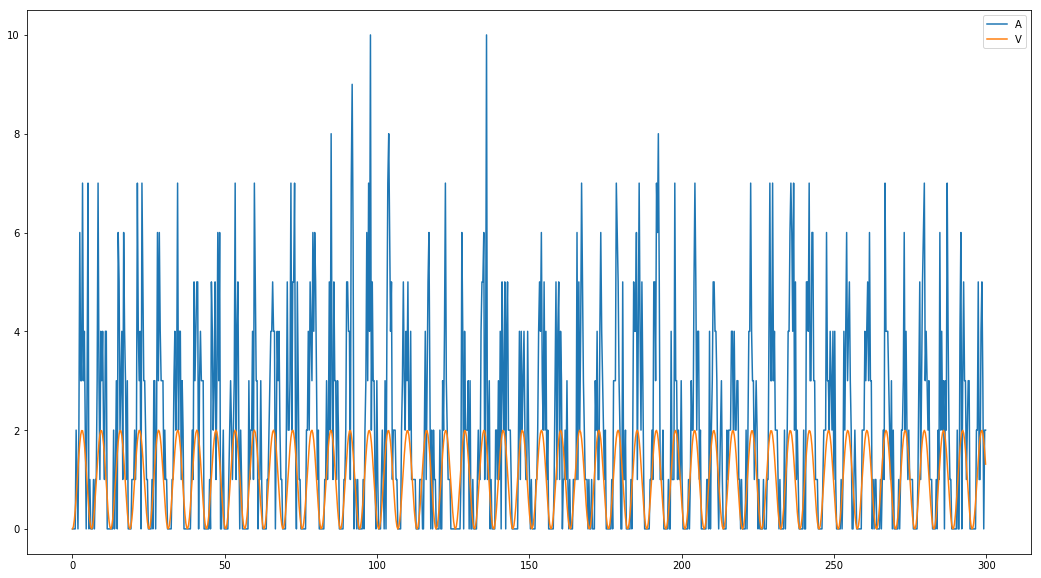

In [7]:
plt.figure(figsize=(18,10))
plt.plot(results['time'], results['A'], label='A')
plt.plot(results['time'], results['V'], label='V')
plt.legend(loc='best')


In [8]:
rxn={'r1': 0, 'r2': 2}